In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv('LikelytoChurn1.csv')
pd.set_option('display.max_columns', None)

In [3]:
# first 5 records
df.head()

,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,Factor#10,Factor#11,Factor#12,Factor#13,Factor#14,Factor#15,Factor#16,Factor#17,Factor#18,Factor#19,Factor#20,Factor#21,Factor#22,Factor#23,Factor#24,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,56302.0,No,100.0,100.0,0.000000,0.00000,0.0,NaN,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.586301,0.0,1.0,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN
1,33363.0,No,0.0,100.0,0.000000,76.82757,0.0,0.0,0.0,1.0,100.000000,0.001623,11.111111,0.0,1.0,1.0,1.0,NaN,NaN,NaN,6.0,1.0,1.0,4.0,4.186301,0.0,1.0,0.000000,11.0,NaN,0.0,4.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,54.545455
2,33365.0,No,0.0,100.0,3.000000,0.00000,0.0,0.0,0.0,1.0,0.011572,0.012218,32.000000,0.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,4.112329,0.0,2.0,51.625059,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000
3,56303.0,No,100.0,100.0,1.313472,0.00000,0.0,0.0,0.0,1.0,0.000000,96.441656,79.545455,0.0,0.0,1.0,1.0,NaN,NaN,NaN,3.0,0.0,1.0,0.0,1.449315,0.0,1.0,0.000000,1.0,NaN,0.0,2.0,0.0,0.0,0.0,1.0,2.0,NaN,0.0,0.000000
4,56304.0,No,0.0,100.0,1.000000,99.00000,1.0,0.0,0.0,1.0,0.141928,0.073721,75.000000,0.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,1.523288,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000


In [4]:
# number of rows and columns
df.shape

(5172, 40)

In [5]:
# data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         5171 non-null   float64
 1   Switched   5171 non-null   object 
 2   Factor#1   5171 non-null   float64
 3   Factor#2   5171 non-null   float64
 4   Factor#3   5171 non-null   float64
 5   Factor#4   5171 non-null   float64
 6   Factor#5   5171 non-null   float64
 7   Factor#6   4852 non-null   float64
 8   Factor#7   5171 non-null   float64
 9   Factor#8   5171 non-null   float64
 10  Factor#9   5171 non-null   float64
 11  Factor#10  5171 non-null   float64
 12  Factor#11  5153 non-null   float64
 13  Factor#12  5171 non-null   float64
 14  Factor#13  5171 non-null   float64
 15  Factor#14  5017 non-null   float64
 16  Factor#15  5171 non-null   float64
 17  Factor#16  3265 non-null   float64
 18  Factor#17  3265 non-null   float64
 19  Factor#18  3265 non-null   float64
 20  Factor#1

In [6]:
# find the null values
df.isnull().sum()

ID              1
Switched        1
Factor#1        1
Factor#2        1
Factor#3        1
Factor#4        1
Factor#5        1
Factor#6      320
Factor#7        1
Factor#8        1
Factor#9        1
Factor#10       1
Factor#11      19
Factor#12       1
Factor#13       1
Factor#14     155
Factor#15       1
Factor#16    1907
Factor#17    1907
Factor#18    1907
Factor#19       1
Factor#20       1
Factor#21       1
Factor#22       1
Factor#23       1
Factor#24       1
Factor#25       1
Factor#26       1
Factor#27       1
Factor#28    1907
Factor#29       1
Factor#30     251
Factor#31       1
Factor#32      37
Factor#33     251
Factor#34       1
Factor#35       1
Factor#36    1846
Factor#37       1
Factor#38    1072
dtype: int64

In [7]:
## find the features which are having missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),' % missing values')

Factor#6 0.0619  % missing values
Factor#11 0.0037  % missing values
Factor#14 0.03  % missing values
Factor#16 0.3687  % missing values
Factor#17 0.3687  % missing values
Factor#18 0.3687  % missing values
Factor#28 0.3687  % missing values
Factor#30 0.0485  % missing values
Factor#32 0.0072  % missing values
Factor#33 0.0485  % missing values
Factor#36 0.3569  % missing values
Factor#38 0.2073  % missing values


In [8]:
# description of features
df.describe()

,ID,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,Factor#10,Factor#11,Factor#12,Factor#13,Factor#14,Factor#15,Factor#16,Factor#17,Factor#18,Factor#19,Factor#20,Factor#21,Factor#22,Factor#23,Factor#24,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,4852.000000,5171.000000,5171.000000,5171.000000,5171.000000,5153.000000,5171.000000,5171.000000,5017.0,5171.0,3265.000000,3265.000000,3265.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,3265.000000,5171.000000,4921.000000,5171.000000,5135.000000,4921.000000,5171.000000,5171.000000,3326.000000,5171.000000,4100.000000
mean,35713.991491,33.191191,48.852713,14.626210,10.870704,0.182363,3.480008,0.814543,1.273448,6.568411,5.499507,24.202763,1.181009,0.467221,1.0,1.0,7.809188,2.244104,2.398162,3.267840,0.929221,1.080835,2.164572,7.136160,0.051634,1.395475,24.785028,5.783021,0.613170,0.337459,1.177606,0.530072,4.525661,0.718350,0.612067,1.711855,0.012026,0.401083,12.912959
std,18357.998964,45.757500,48.342866,23.190324,19.391736,1.390144,18.055282,1.445004,0.741860,21.515206,19.643628,31.406758,12.397187,0.498973,0.0,0.0,2.880809,0.701550,1.552432,6.128477,0.947163,0.532178,2.592168,8.495197,0.274378,0.714082,37.277641,15.805898,4.211054,3.805375,5.496281,3.490581,16.237218,1.132272,2.063583,4.282903,0.111745,2.115804,26.983033
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-2.695890,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,27843.500000,0.000000,0.000000,1.199991,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.006709,0.000000,0.000000,0.000000,1.0,1.0,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.030137,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,32258.000000,0.000000,29.522479,4.812883,0.000000,0.000000,0.000000,0.000000,1.000000,0.048156,0.041499,7.655502,0.000000,0.000000,1.0,1.0,8.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,5.079452,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,34287.000000,100.000000,100.000000,15.814382,14.005664,0.000000,0.000000,1.000000,1.000000,0.813340,0.368534,42.424242,0.000000,1.000000,1.0,1.0,10.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,8.721918,0.000000,2.000000,48.872297,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,7.142857
max,277119.000000,100.000000,100.000000,100.000000,100.000000,47.000000,100.000000,18.000000,9.000000,100.000000,100.000000,100.000000,565.000000,1.000000,1.0,1.0,17.000000,6.000000,10.000000,91.000000,16.000000,10.000000,49.000000,76.545205,5.000000,5.000000,99.999969,214.000000,82.000000,236.000000,185.000000,88.000000,100.000000,12.000000,78.000000,289.000000,2.000000,42.000000,100.000000


In [9]:
# count the number of 1's and 0's in dataset for checking Imbalancing
df['Switched'].value_counts()

No     4468
Yes     703
Name: Switched, dtype: int64

In [10]:
# counting of dependent features
df['Switched'].value_counts(normalize=True)

No     0.86405
Yes    0.13595
Name: Switched, dtype: float64

- From the above Information 1's are 86% and 0's are 14% so the dataset is Imbalance

In [11]:
# finding the discrete_features
discrete_features = discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25]
discrete_features

['Switched',
 'Factor#5',
 'Factor#7',
 'Factor#8',
 'Factor#13',
 'Factor#14',
 'Factor#15',
 'Factor#16',
 'Factor#17',
 'Factor#18',
 'Factor#20',
 'Factor#21',
 'Factor#24',
 'Factor#25',
 'Factor#33',
 'Factor#35',
 'Factor#36',
 'Factor#37']

In [12]:
# number of discrete features
len(discrete_features)

18

In [13]:
# let's explore the content of these discrete_features
for feature in discrete_features:
    print(feature, df[feature].unique())

Switched ['No' 'Yes' nan]
Factor#5 [ 0.  1.  3.  2.  4.  8. 16.  6.  7. 10. 31. 11. 21. 14. 42. 15.  9.  5.
 13. 12. 47. 20. nan]
Factor#7 [ 0.  1.  2.  3.  5.  4.  7.  8.  6.  9. 10. 13. 15. 14. 11. 12. 18. nan]
Factor#8 [ 1.  5.  2.  3.  4.  6.  7.  9.  8. nan]
Factor#13 [ 0.  1. nan]
Factor#14 [ 1. nan]
Factor#15 [ 1. nan]
Factor#16 [nan  6.  4. 15. 12.  5.  8.  7. 10.  9. 11.  1.  2.  3. 16. 13.  0. 14.
 17.]
Factor#17 [nan  2.  1.  3.  4.  5.  6.]
Factor#18 [nan  2.  1.  3.  4.  5.  6.  7.  9.  8. 10.]
Factor#20 [ 0.  1.  2.  4.  3.  7.  5.  6.  9.  8. 10. 15. 16. nan]
Factor#21 [ 0.  1.  3.  2.  4.  5.  7. 10.  6. nan]
Factor#24 [ 0.  1.  3.  2.  5. nan]
Factor#25 [ 1.  2.  3.  4.  5. nan]
Factor#33 [ 0.  2.  1.  4.  6. nan  3.  5.  7. 12.  9.]
Factor#35 [  1.   2.   3.   4.   5.   6.   9.   8.  14.   7.  15.  25.  21.  11.
  18.  10.  13.  12. 289.  nan  16.  20.]
Factor#36 [nan  0.  1.  2.]
Factor#37 [ 0.  1.  2.  3.  5.  9.  4. 24.  7.  6. 11. 25. 10. 39.  8. 16. 36. 27.
 15. 

In [14]:
# Count the number
for feature in discrete_features:
    print(feature, df[feature].value_counts())

Switched No     4468
Yes     703
Name: Switched, dtype: int64
Factor#5 0.0     4833
1.0      183
2.0       77
3.0       26
4.0       14
7.0        6
5.0        5
6.0        4
11.0       3
8.0        3
10.0       2
16.0       2
15.0       2
13.0       2
20.0       2
31.0       1
21.0       1
14.0       1
42.0       1
9.0        1
12.0       1
47.0       1
Name: Factor#5, dtype: int64
Factor#7 0.0     3146
1.0      992
2.0      510
3.0      272
4.0      110
5.0       54
6.0       30
7.0       20
8.0       17
9.0        7
10.0       5
11.0       3
13.0       1
15.0       1
14.0       1
12.0       1
18.0       1
Name: Factor#7, dtype: int64
Factor#8 1.0    4269
2.0     613
3.0     167
4.0      69
5.0      23
6.0      18
7.0       7
8.0       4
9.0       1
Name: Factor#8, dtype: int64
Factor#13 0.0    2755
1.0    2416
Name: Factor#13, dtype: int64
Factor#14 1.0    5017
Name: Factor#14, dtype: int64
Factor#15 1.0    5171
Name: Factor#15, dtype: int64
Factor#16 8.0     498
7.0     493
6.0    

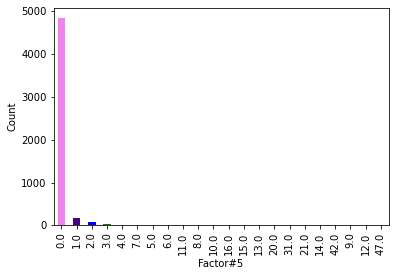

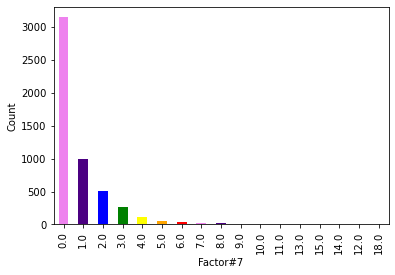

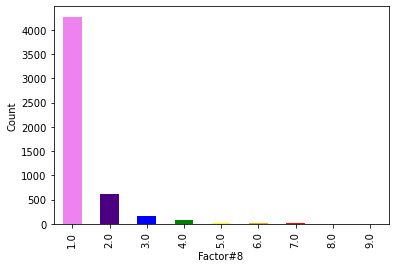

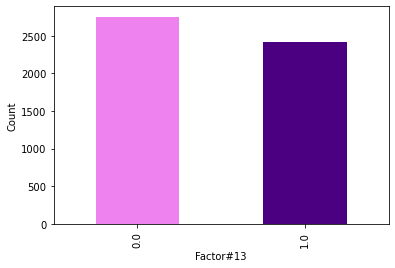

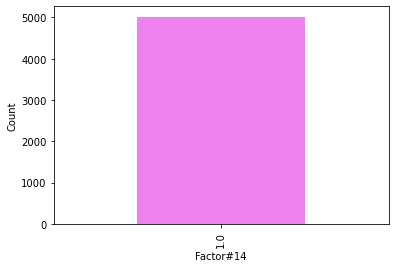

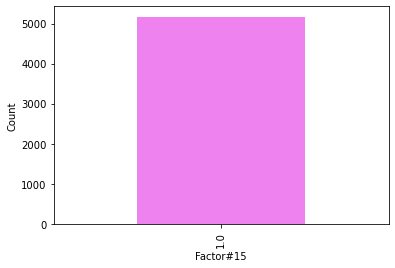

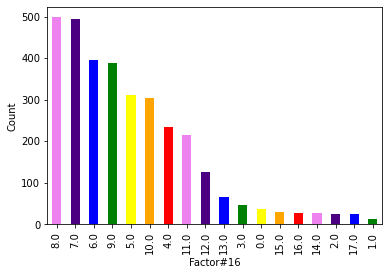

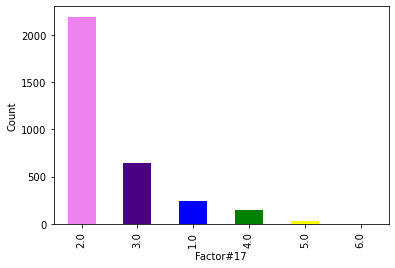

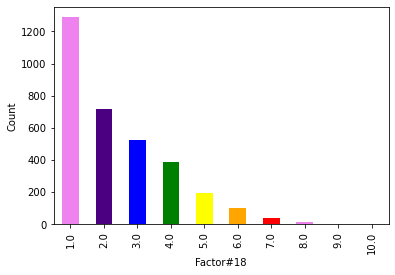

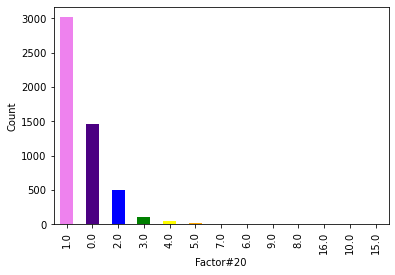

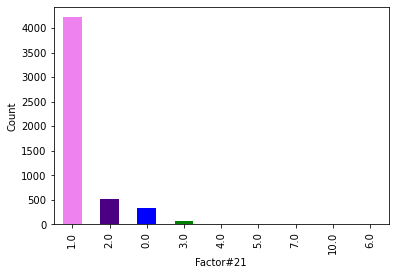

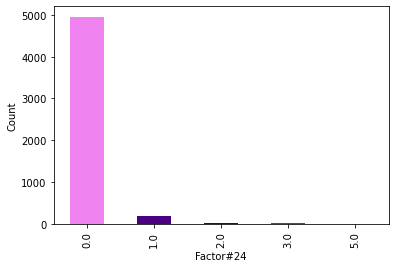

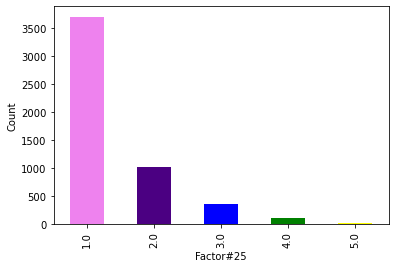

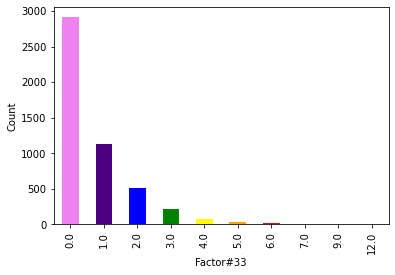

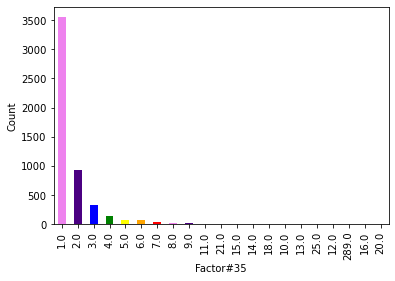

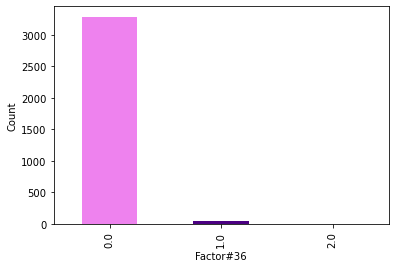

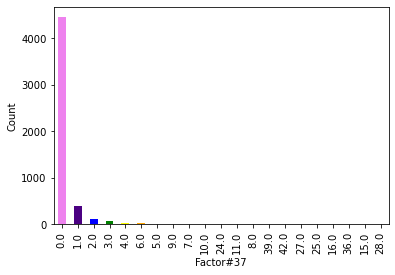

In [15]:
# Visualizing the discrete_features
for feature in discrete_features:
    data = df.copy()
    if feature!='Switched':
        data[feature].value_counts().plot(kind='bar',color=['violet','indigo','blue',
                                                       'green','yellow','orange',
                                                       'red'])
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

In [16]:
# finding the continuous_features
continuous_feature = [feature for feature in df.columns if feature not in discrete_features+['ID']]
continuous_feature

['Factor#1',
 'Factor#2',
 'Factor#3',
 'Factor#4',
 'Factor#6',
 'Factor#9',
 'Factor#10',
 'Factor#11',
 'Factor#12',
 'Factor#19',
 'Factor#22',
 'Factor#23',
 'Factor#26',
 'Factor#27',
 'Factor#28',
 'Factor#29',
 'Factor#30',
 'Factor#31',
 'Factor#32',
 'Factor#34',
 'Factor#38']

In [17]:
# number of continuous features
len(continuous_feature)

21

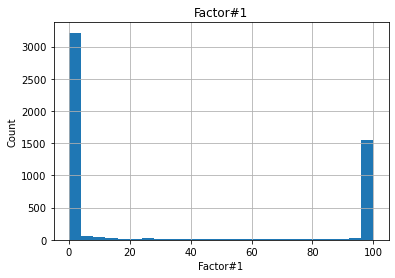

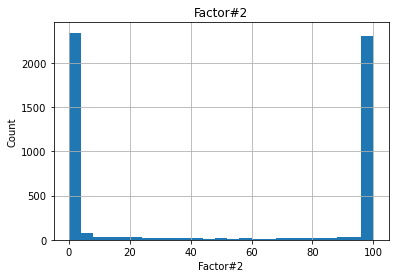

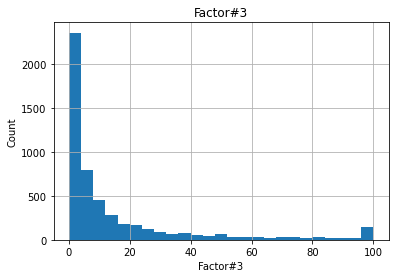

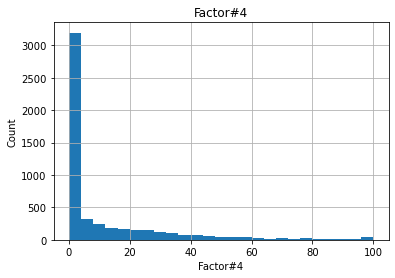

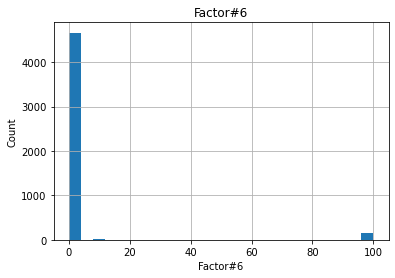

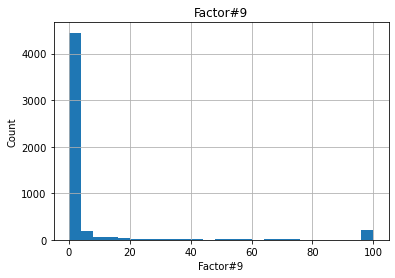

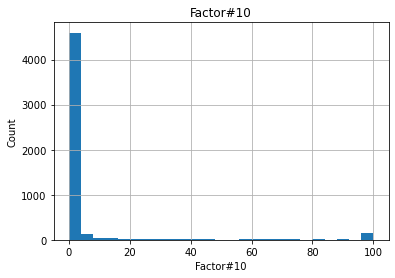

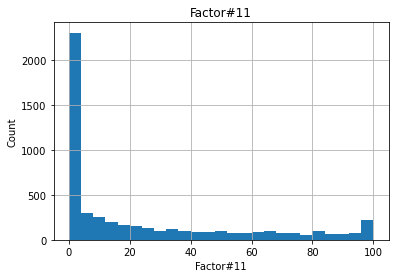

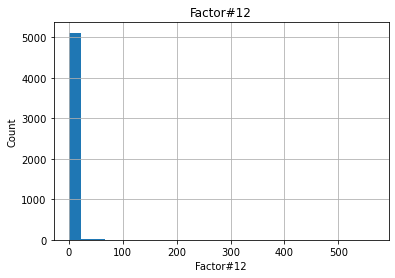

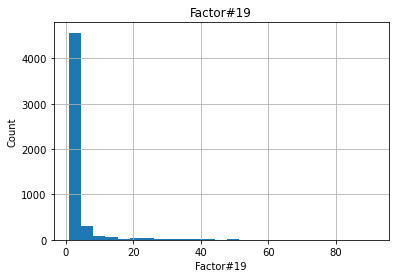

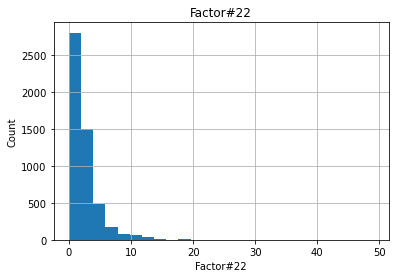

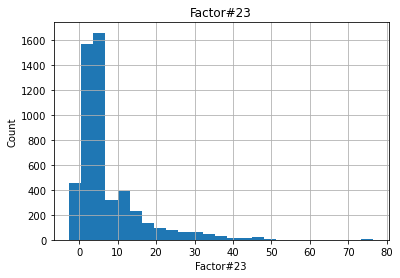

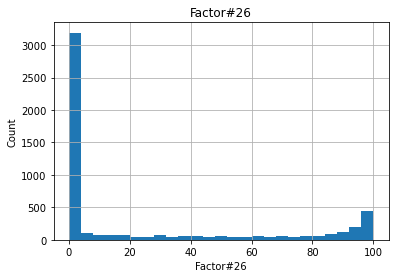

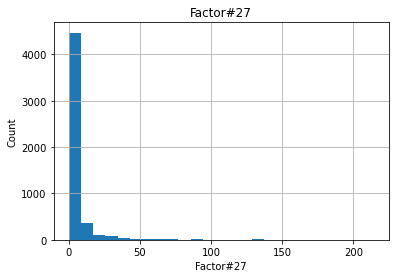

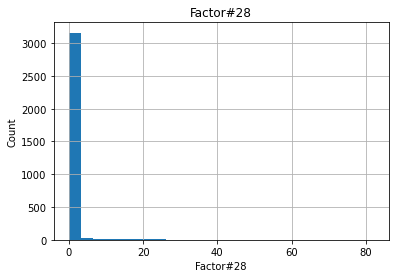

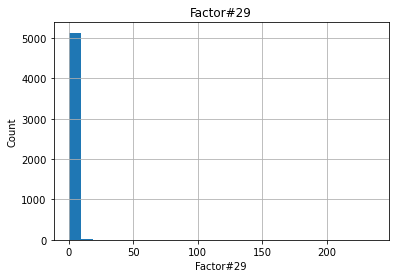

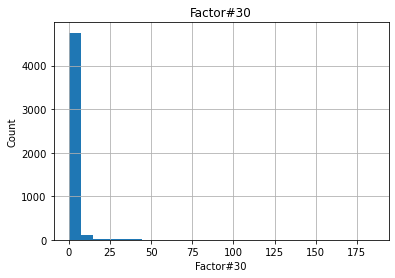

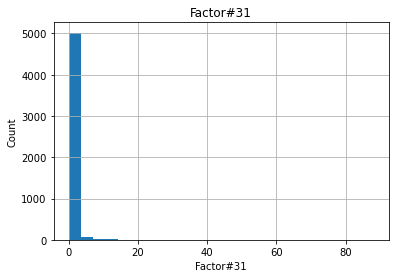

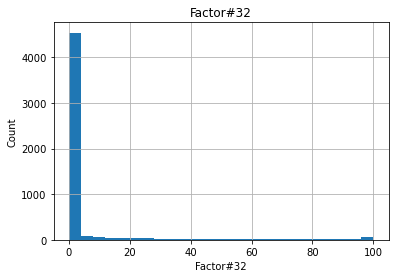

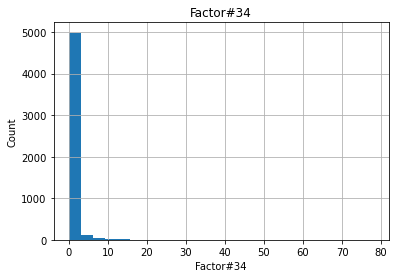

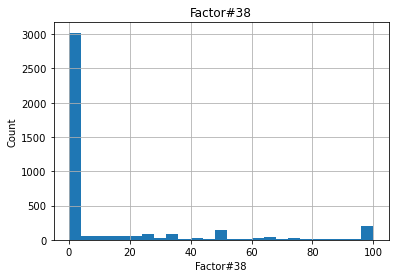

In [18]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers of Continuous_features

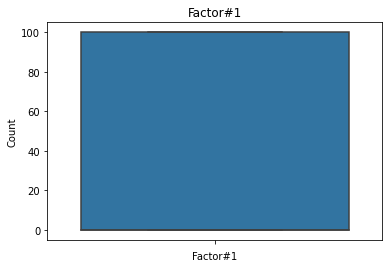

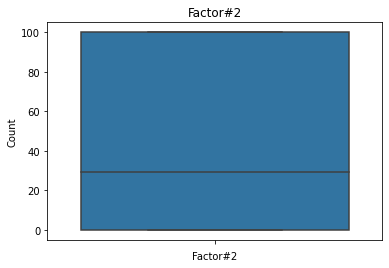

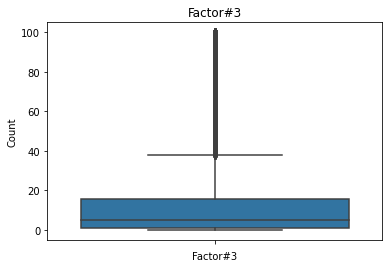

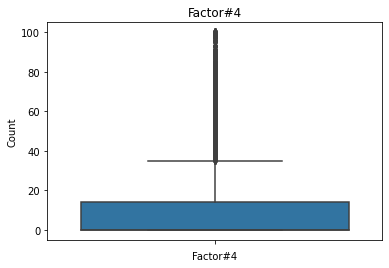

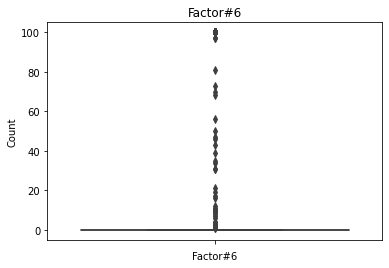

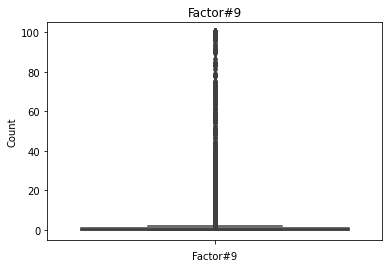

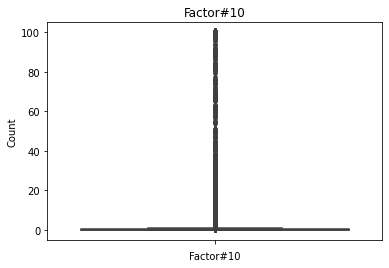

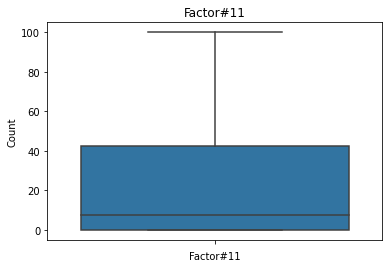

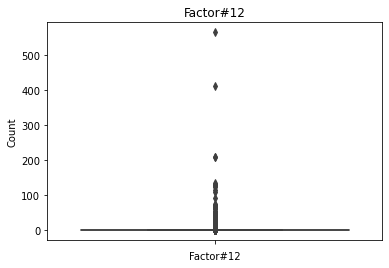

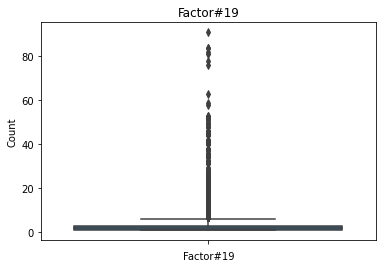

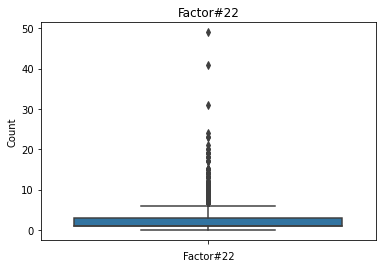

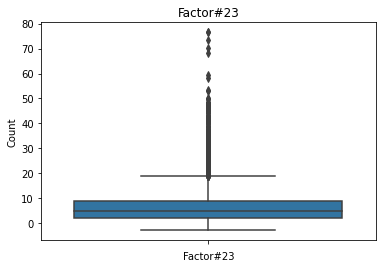

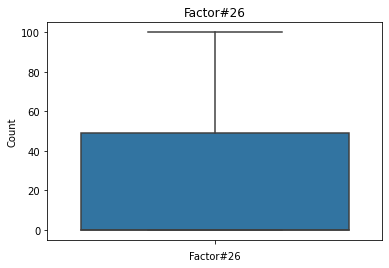

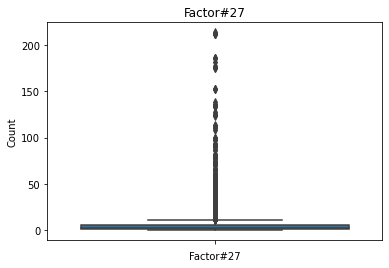

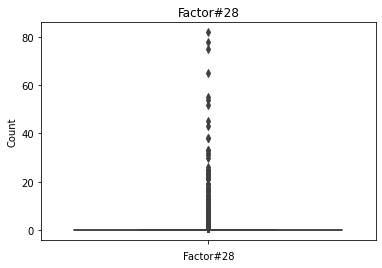

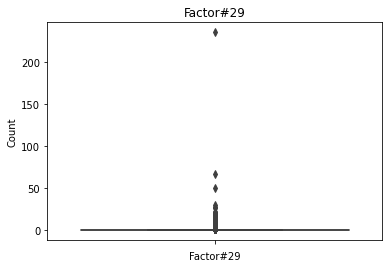

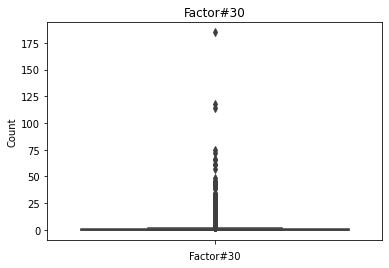

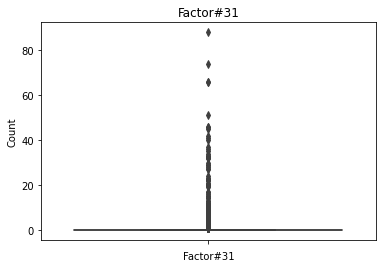

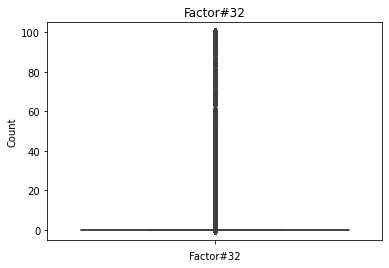

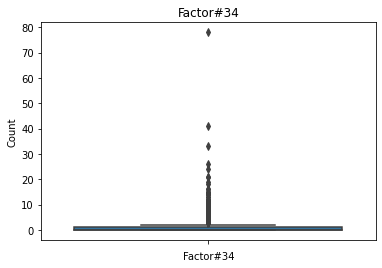

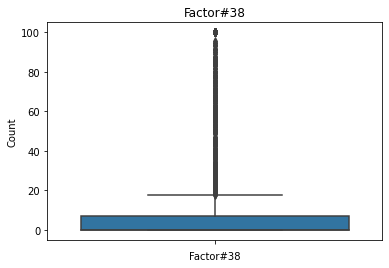

In [19]:
# box plot of continuous features

for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(y=data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show() 

### BIVARIATE ANALYSIS

In [20]:
# total columns
df.columns

Index(['ID', 'Switched', 'Factor#1', 'Factor#2', 'Factor#3', 'Factor#4',
       'Factor#5', 'Factor#6', 'Factor#7', 'Factor#8', 'Factor#9', 'Factor#10',
       'Factor#11', 'Factor#12', 'Factor#13', 'Factor#14', 'Factor#15',
       'Factor#16', 'Factor#17', 'Factor#18', 'Factor#19', 'Factor#20',
       'Factor#21', 'Factor#22', 'Factor#23', 'Factor#24', 'Factor#25',
       'Factor#26', 'Factor#27', 'Factor#28', 'Factor#29', 'Factor#30',
       'Factor#31', 'Factor#32', 'Factor#33', 'Factor#34', 'Factor#35',
       'Factor#36', 'Factor#37', 'Factor#38'],
      dtype='object')

In [21]:
# find the numerical_features
numerical_features=[feature for feature in df.columns if feature not in ['ID','Switched']]

In [22]:
# numerical features
numerical_features

['Factor#1',
 'Factor#2',
 'Factor#3',
 'Factor#4',
 'Factor#5',
 'Factor#6',
 'Factor#7',
 'Factor#8',
 'Factor#9',
 'Factor#10',
 'Factor#11',
 'Factor#12',
 'Factor#13',
 'Factor#14',
 'Factor#15',
 'Factor#16',
 'Factor#17',
 'Factor#18',
 'Factor#19',
 'Factor#20',
 'Factor#21',
 'Factor#22',
 'Factor#23',
 'Factor#24',
 'Factor#25',
 'Factor#26',
 'Factor#27',
 'Factor#28',
 'Factor#29',
 'Factor#30',
 'Factor#31',
 'Factor#32',
 'Factor#33',
 'Factor#34',
 'Factor#35',
 'Factor#36',
 'Factor#37',
 'Factor#38']

In [23]:
### CORRELATION MATRIX
# calculating correlation
correlation = df[numerical_features].dropna().corr()
correlation

,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,Factor#10,Factor#11,Factor#12,Factor#13,Factor#14,Factor#15,Factor#16,Factor#17,Factor#18,Factor#19,Factor#20,Factor#21,Factor#22,Factor#23,Factor#24,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
Factor#1,1.000000,0.515122,-0.017049,-0.052228,0.020608,0.008324,-0.295369,0.003489,-0.152362,0.133258,-0.176363,-0.015791,-0.027664,NaN,NaN,-0.131396,0.067843,-0.051842,-0.118530,-0.466106,-0.007414,-0.096108,0.048144,0.052132,-0.106678,-0.063612,0.065288,-0.028165,0.019023,-0.004061,-0.053416,0.081726,-0.051989,-0.059353,0.012311,-0.031880,-0.043864,-0.160856
Factor#2,0.515122,1.000000,-0.052544,0.025830,0.020300,-0.015065,-0.289521,-0.028829,-0.023195,0.023557,-0.113469,0.002860,0.004925,NaN,NaN,-0.170508,0.035681,-0.202765,-0.079931,-0.244291,0.027301,-0.044755,-0.109765,0.015229,-0.061889,-0.194941,0.140122,-0.073754,0.032082,0.040387,-0.079819,-0.005857,-0.017654,-0.056433,0.008807,-0.021246,-0.016668,-0.169695
Factor#3,-0.017049,-0.052544,1.000000,-0.050346,-0.022527,0.007549,0.052193,-0.024899,-0.041289,0.026963,-0.066458,-0.000394,0.016480,NaN,NaN,0.104168,-0.074444,0.037547,0.004348,-0.032268,-0.049528,-0.015544,0.071488,-0.015099,-0.015350,0.074314,0.025860,0.006151,0.004266,0.009045,0.033053,-0.054591,0.053098,-0.032736,-0.021390,-0.001978,0.008630,-0.007760
Factor#4,-0.052228,0.025830,-0.050346,1.000000,-0.019452,-0.011026,0.176010,-0.082090,-0.077060,-0.101875,0.170635,-0.036331,0.126637,NaN,NaN,-0.131839,-0.058275,-0.248037,-0.043965,-0.025763,-0.015839,0.116385,-0.193333,-0.071606,0.042771,-0.267716,-0.032003,-0.057031,-0.002551,-0.017260,-0.053907,-0.110246,-0.014548,-0.004846,-0.028023,-0.008048,-0.063316,-0.034681
Factor#5,0.020608,0.020300,-0.022527,-0.019452,1.000000,0.008922,0.014838,0.164257,0.068628,0.036972,0.057063,0.063335,-0.046100,NaN,NaN,0.072135,0.068628,0.089978,0.133124,0.122854,0.075378,0.031885,0.067446,0.039663,0.120123,0.061172,0.054390,0.056582,0.012154,0.047970,0.103752,0.004252,0.017999,0.070789,0.069876,-0.012319,0.029398,0.044022
Factor#6,0.008324,-0.015065,0.007549,-0.011026,0.008922,1.000000,-0.017971,0.009336,0.019104,0.073472,0.123764,-0.008304,-0.026311,NaN,NaN,-0.005161,-0.008888,-0.023868,0.054938,-0.019574,-0.008291,-0.018532,0.004536,-0.003029,-0.021289,-0.019732,0.027196,-0.012622,-0.005867,-0.016295,-0.008706,-0.028510,-0.022451,0.176354,0.007268,-0.010008,-0.003878,0.055302
Factor#7,-0.295369,-0.289521,0.052193,0.176010,0.014838,-0.017971,1.000000,0.102700,0.011694,-0.062098,0.186596,-0.018580,0.077601,NaN,NaN,0.167055,-0.008413,-0.044438,0.073595,0.302819,0.065820,0.599205,-0.025139,-0.064968,0.307681,-0.128995,0.003121,-0.023896,0.004786,0.075188,0.022634,-0.144778,0.070824,0.089964,0.015375,0.014342,0.039348,0.107903
Factor#8,0.003489,-0.028829,-0.024899,-0.082090,0.164257,0.009336,0.102700,1.000000,0.182265,0.125459,-0.021848,0.111246,-0.120549,NaN,NaN,0.310987,0.206113,0.346299,0.295648,0.482043,0.343067,0.252086,0.271888,0.086718,0.417887,0.138180,0.257497,0.157659,0.069407,0.247332,0.260200,0.065124,0.130076,0.133321,0.206272,0.030976,0.219747,0.114193
Factor#9,-0.152362,-0.023195,-0.041289,-0.077060,0.068628,0.019104,0.011694,0.182265,1.000000,0.117838,-0.015440,0.072849,-0.063577,NaN,NaN,0.098205,0.098547,0.150779,0.109271,0.318463,0.183726,0.067088,0.089603,0.084711,0.133260,0.068343,0.070153,0.046691,0.000494,0.098239,0.057022,0.046544,-0.012187,0.029898,0.108562,-0.012657,0.086666,0.039998
Factor#10,0.133258,0.023557,0.026963,-0.101875,0.036972,0.073472,-0.062098,0.125459,0.117838,1.000000,-0.105658,-0.018870,-0.025629,NaN,NaN,0.006167,0.138173,0.177670,-0.063406,-0.038946,0.191097,0.000685,0.119225,0.099288,-0.032329,0.102023,-0.020745,0.026521,-0.016144,0.031407,0.005262,0.128216,-0.043369,-0.047824,0.021248,-0.016934,-0.022701,-0.066883


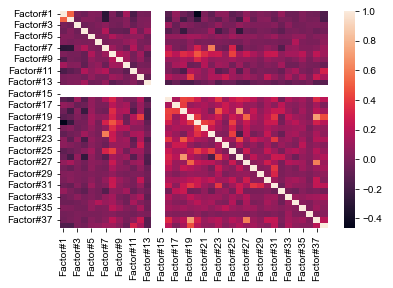

In [24]:
# heatmap
sns.heatmap(correlation)
sns.set(rc = {'figure.figsize':(15,18)})
plt.show()

### Hypothesis testing

In [25]:
# Find the Z-test and P value for finding the relation between dependent and indepent features
from numpy import sqrt, abs, round
from scipy.stats import norm
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval    

In [26]:
# Find the T-test and P value for finding the relation between dependent and independent features
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    return pval

In [27]:
# Find the chi-square test for categorical feature for statistical dependents
def Bivariate_cont_cat(df, cont, cat, category):
    x1 = df[cont][df[cat]==category][:]
    x2 = df[cont][~(df[cat]==category)][:]
    #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.mean()
    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
    #table
    table = pd.pivot_table(data=df, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
    plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=df)
    plt.title('categorical boxplot')

In [28]:
# first 5 records
df.head()

,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,Factor#10,Factor#11,Factor#12,Factor#13,Factor#14,Factor#15,Factor#16,Factor#17,Factor#18,Factor#19,Factor#20,Factor#21,Factor#22,Factor#23,Factor#24,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,56302.0,No,100.0,100.0,0.000000,0.00000,0.0,NaN,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.586301,0.0,1.0,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN
1,33363.0,No,0.0,100.0,0.000000,76.82757,0.0,0.0,0.0,1.0,100.000000,0.001623,11.111111,0.0,1.0,1.0,1.0,NaN,NaN,NaN,6.0,1.0,1.0,4.0,4.186301,0.0,1.0,0.000000,11.0,NaN,0.0,4.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,54.545455
2,33365.0,No,0.0,100.0,3.000000,0.00000,0.0,0.0,0.0,1.0,0.011572,0.012218,32.000000,0.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,4.112329,0.0,2.0,51.625059,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000
3,56303.0,No,100.0,100.0,1.313472,0.00000,0.0,0.0,0.0,1.0,0.000000,96.441656,79.545455,0.0,0.0,1.0,1.0,NaN,NaN,NaN,3.0,0.0,1.0,0.0,1.449315,0.0,1.0,0.000000,1.0,NaN,0.0,2.0,0.0,0.0,0.0,1.0,2.0,NaN,0.0,0.000000
4,56304.0,No,0.0,100.0,1.000000,99.00000,1.0,0.0,0.0,1.0,0.141928,0.073721,75.000000,0.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,1.523288,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000


In [29]:
import warnings
warnings.filterwarnings('ignore')

## Continuous Features P Values

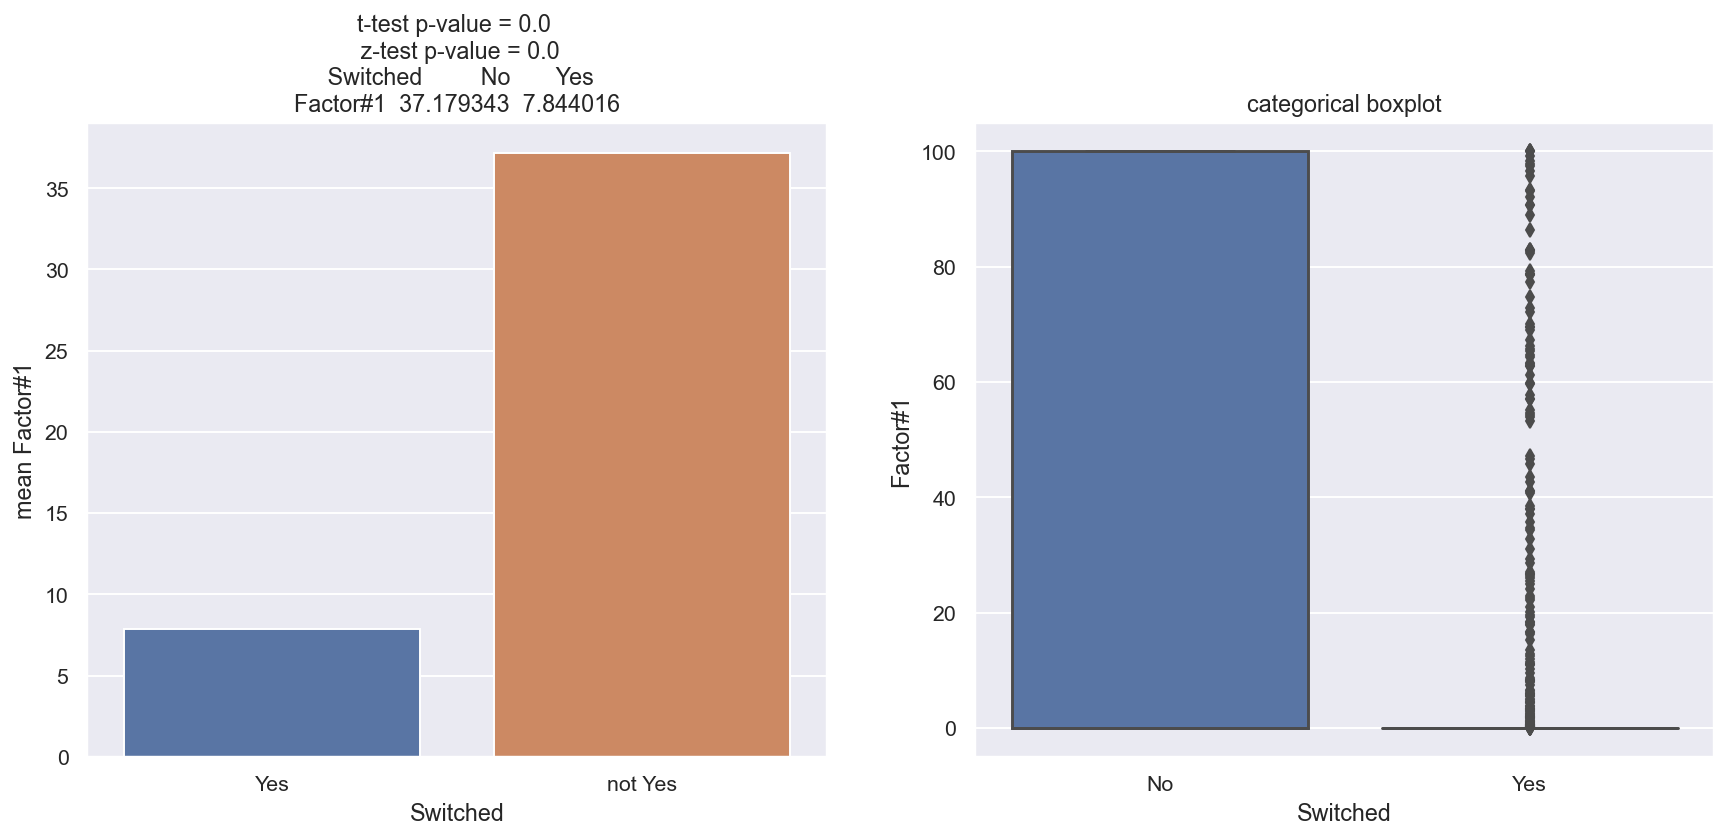

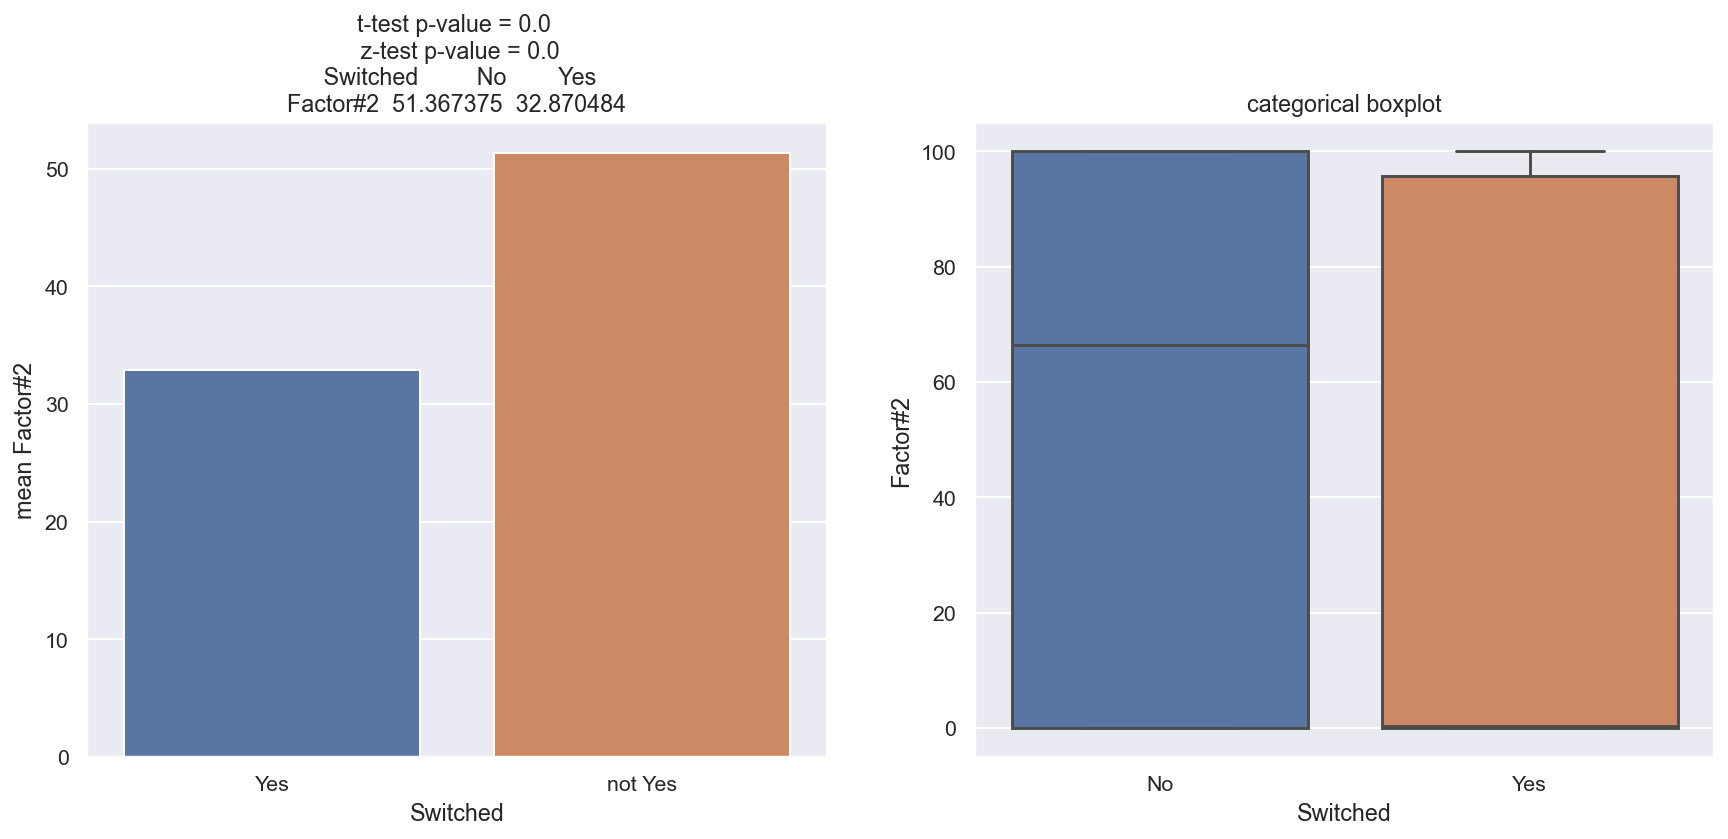

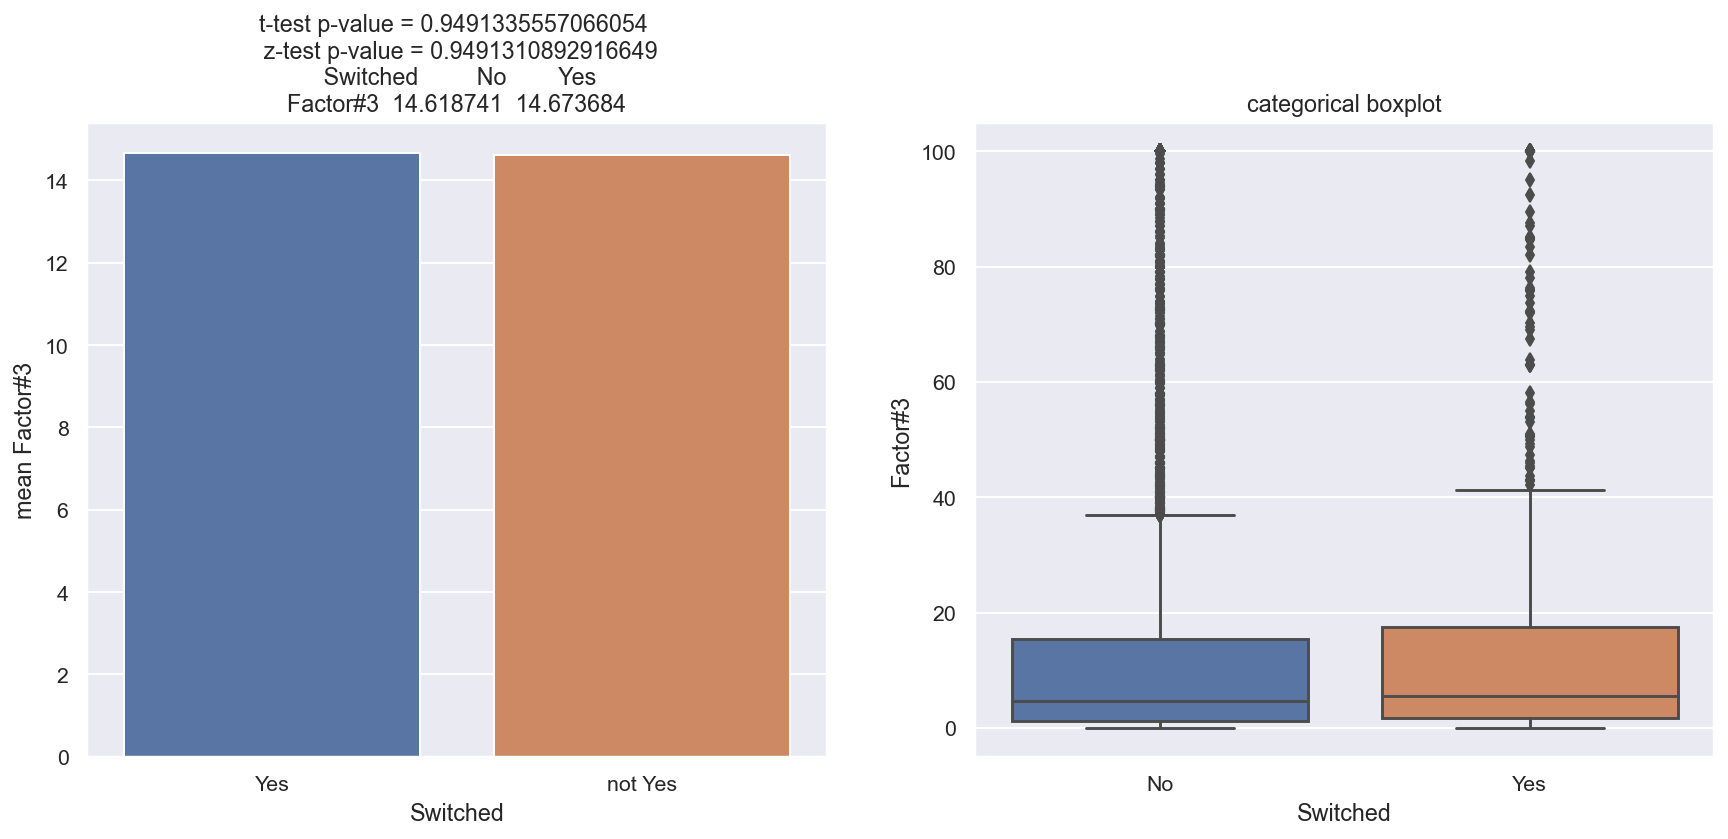

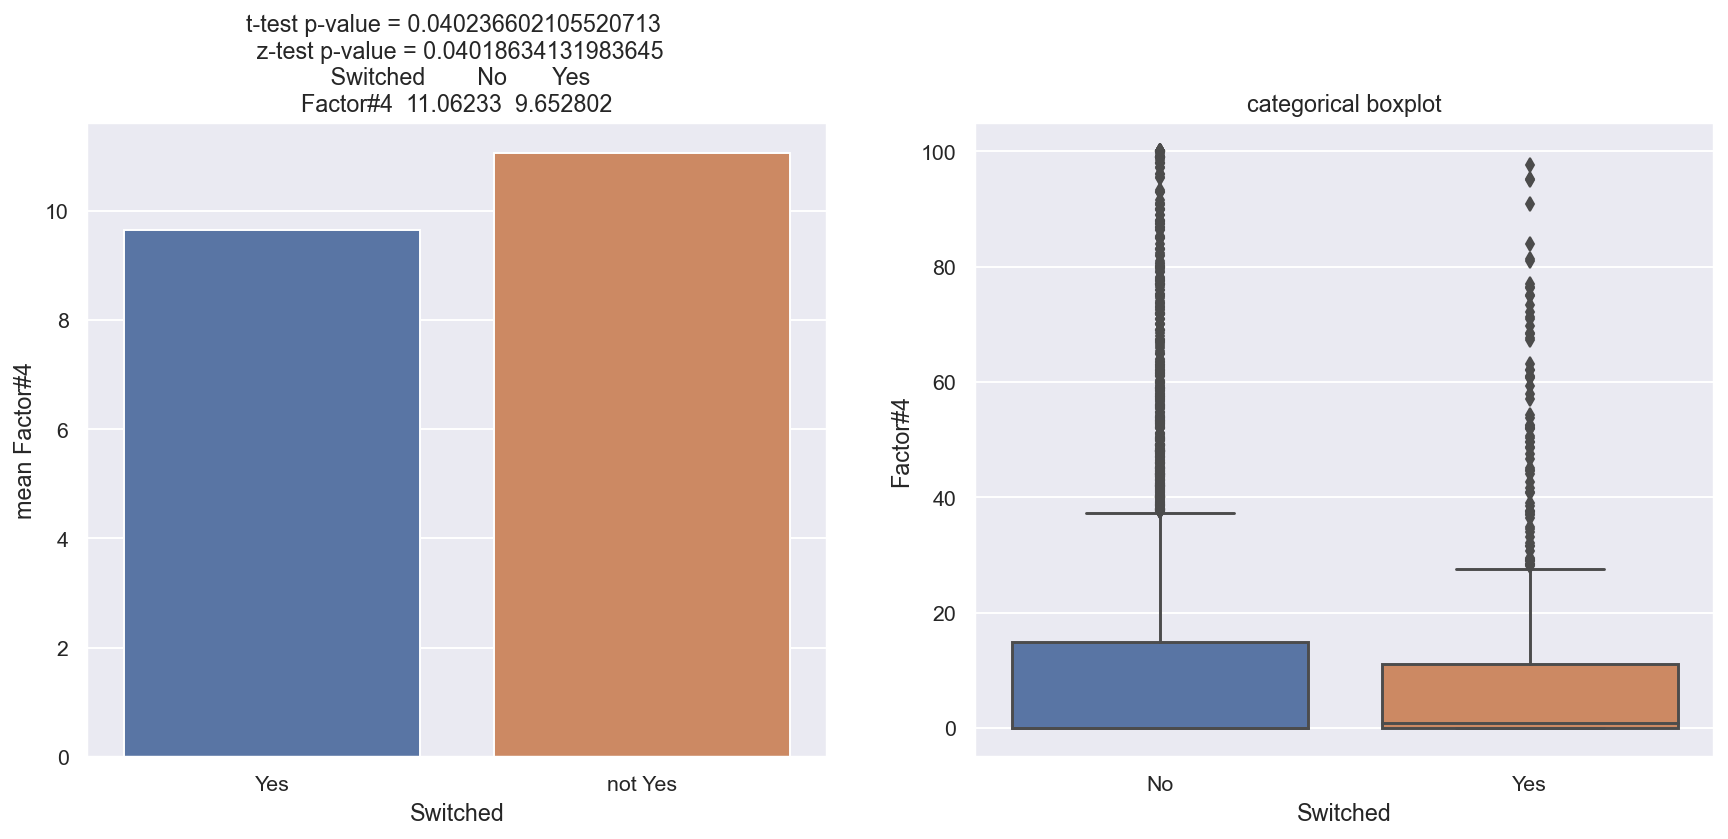

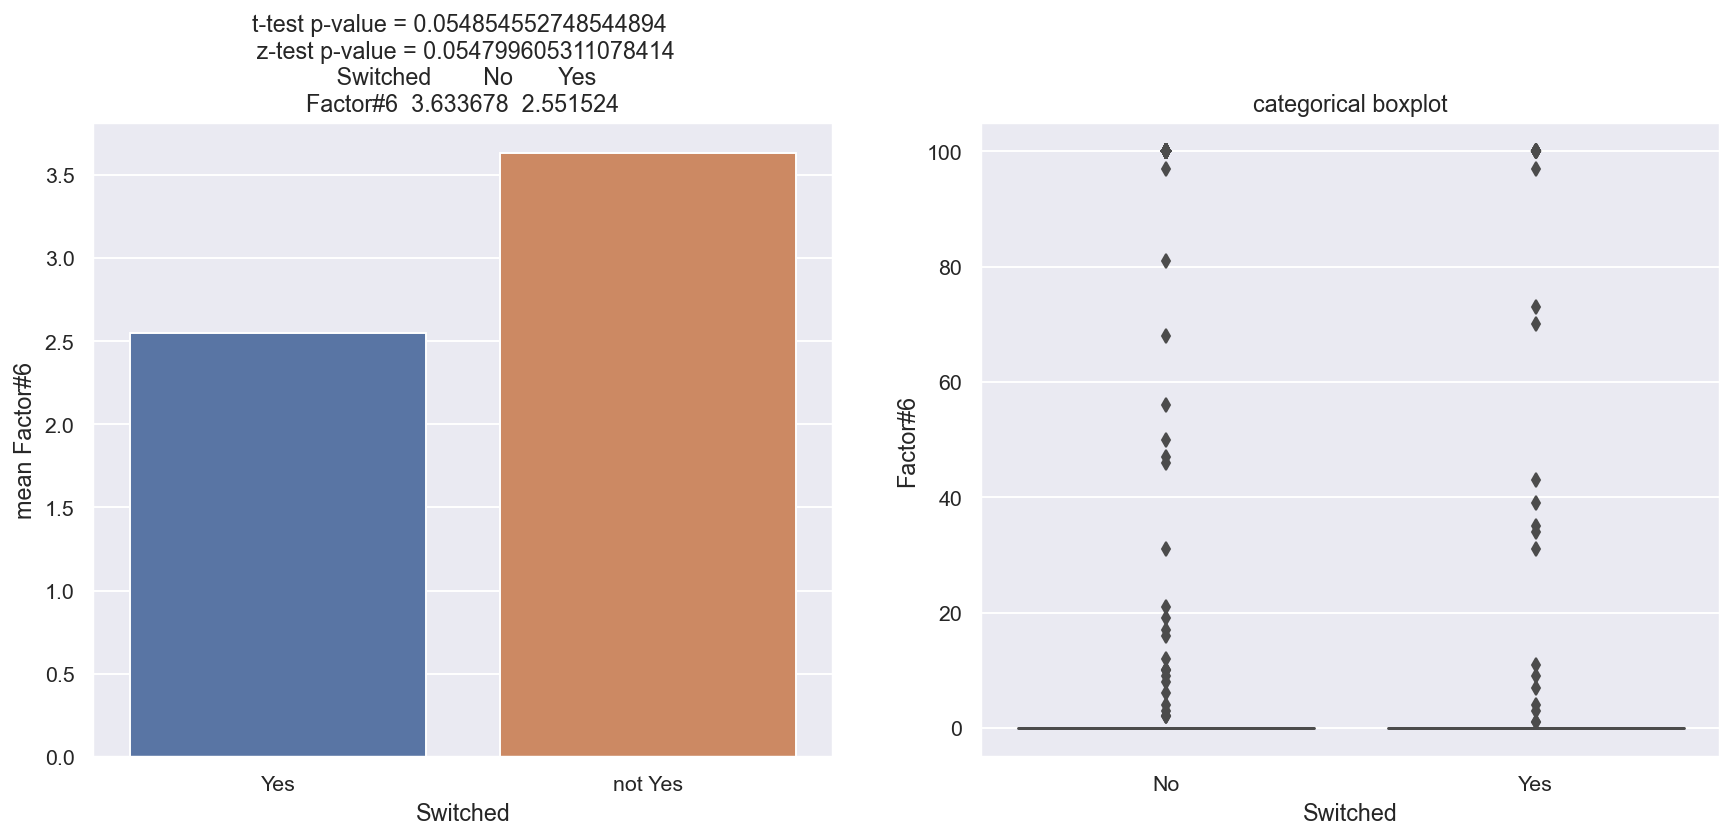

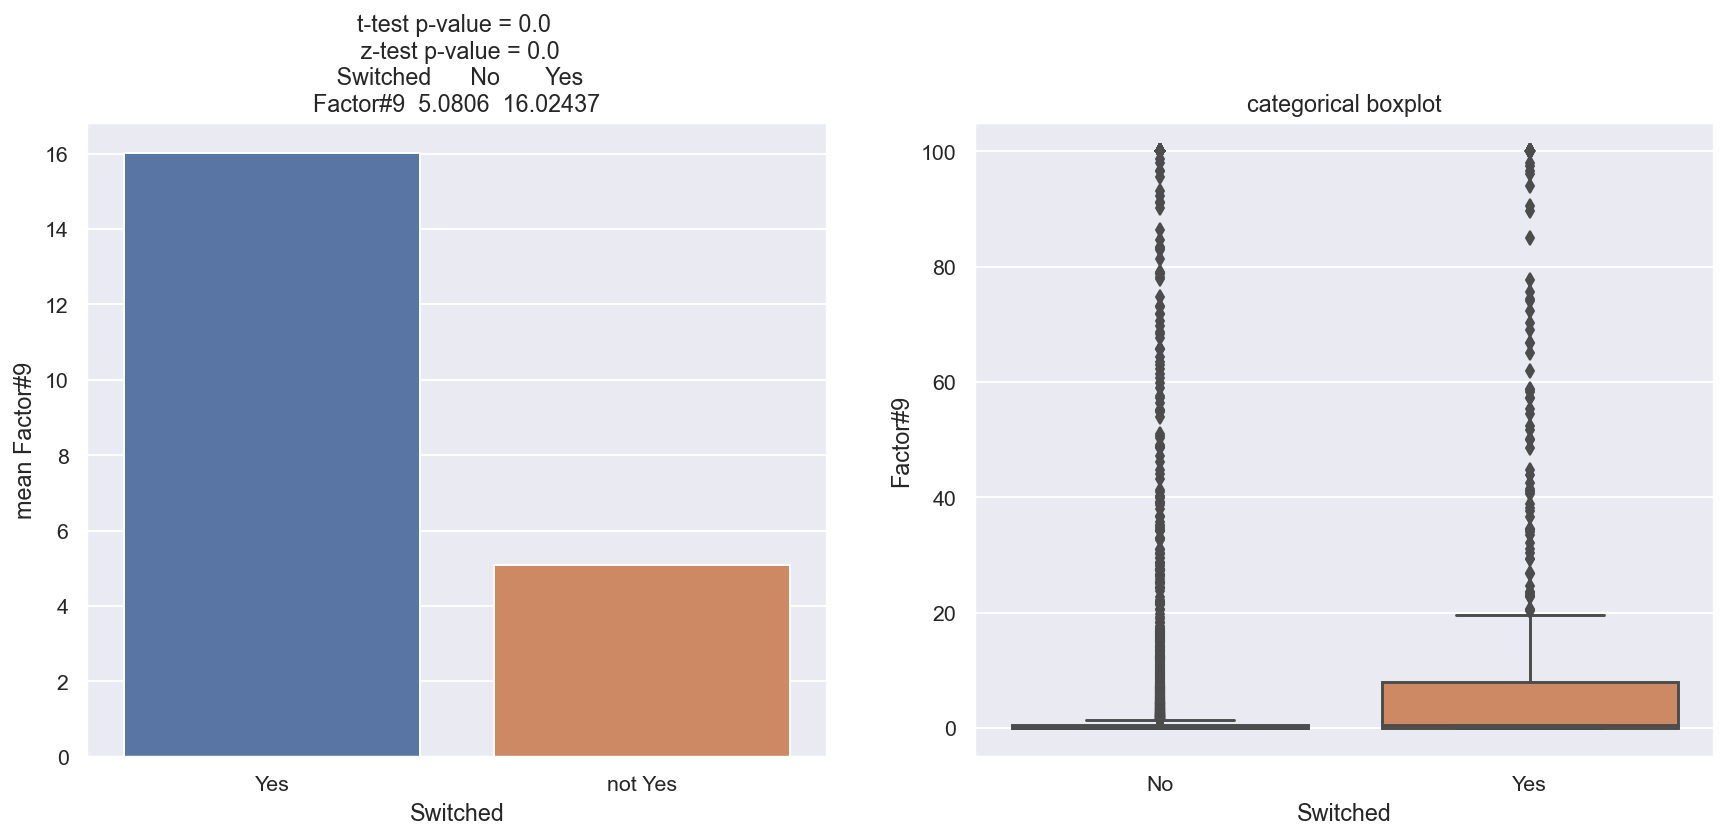

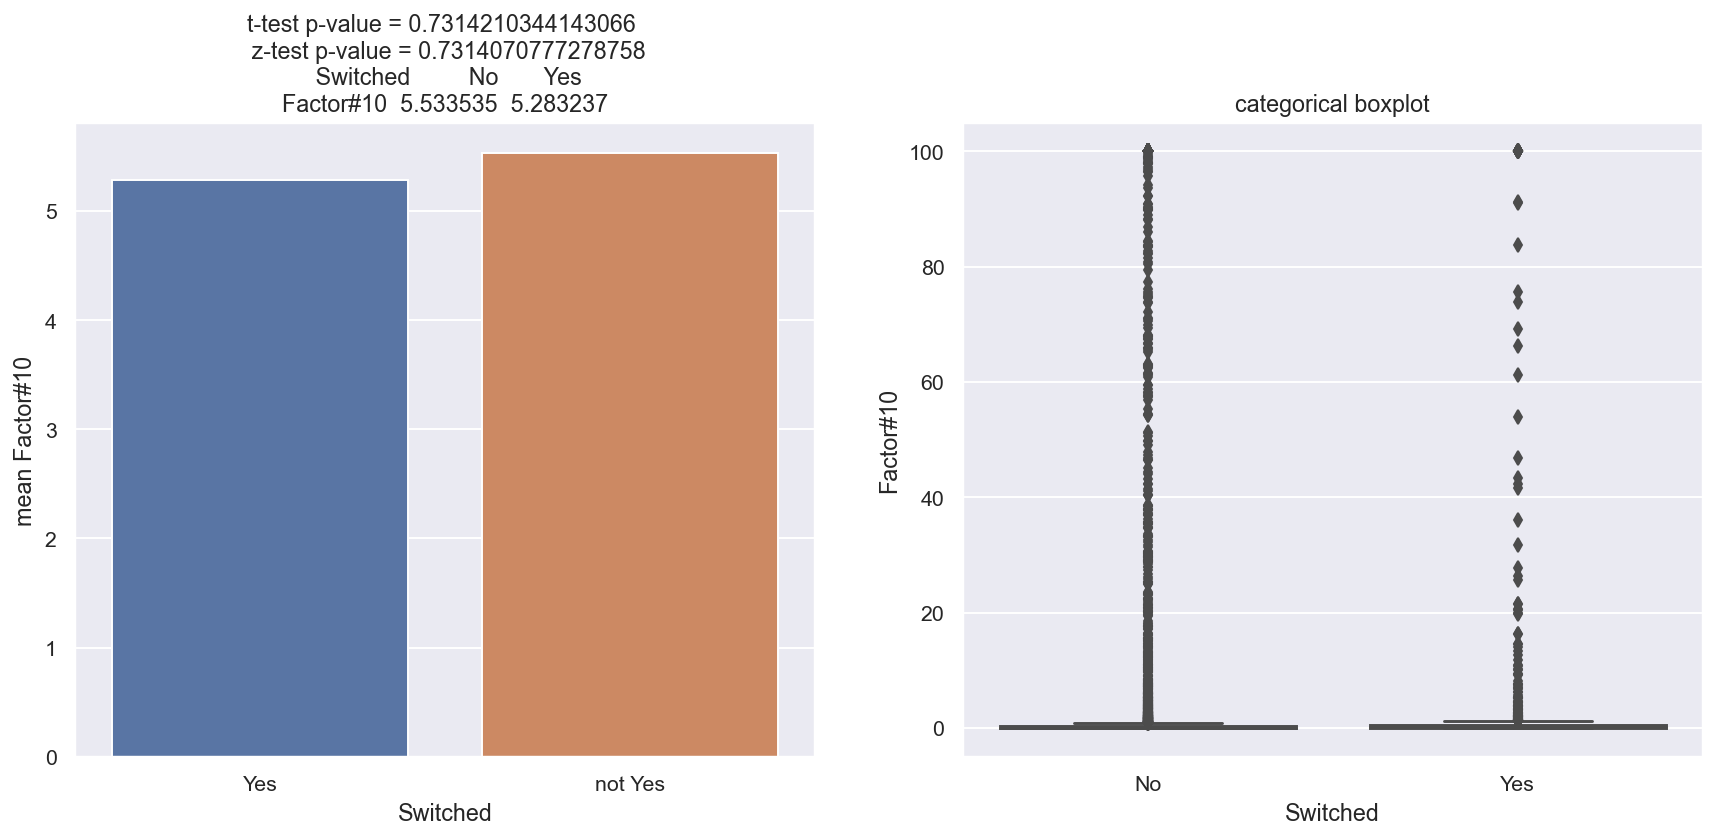

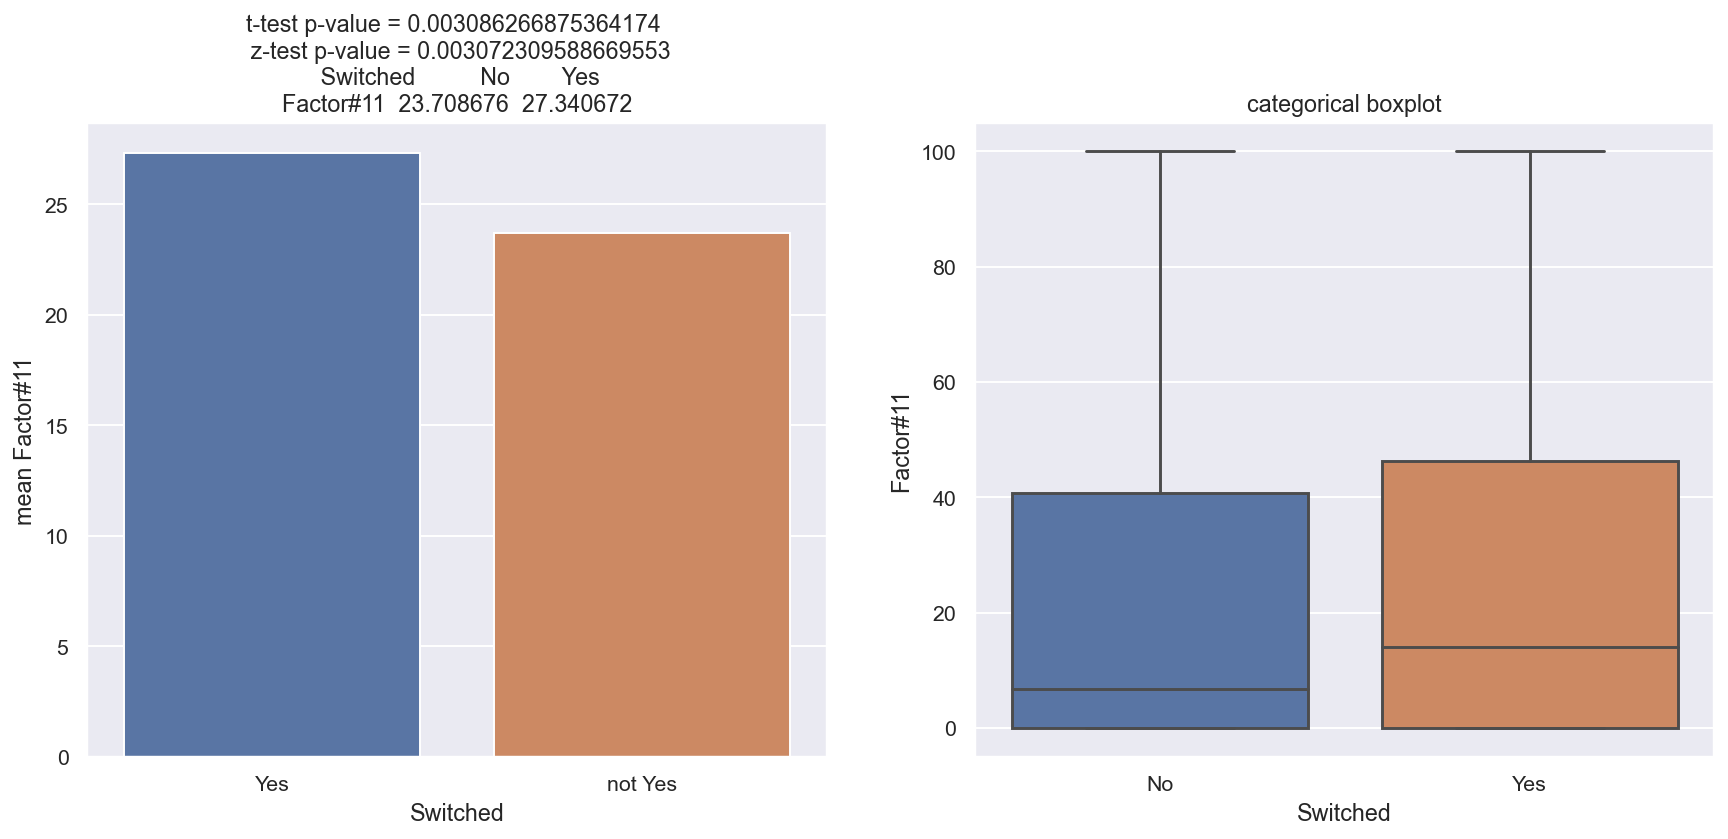

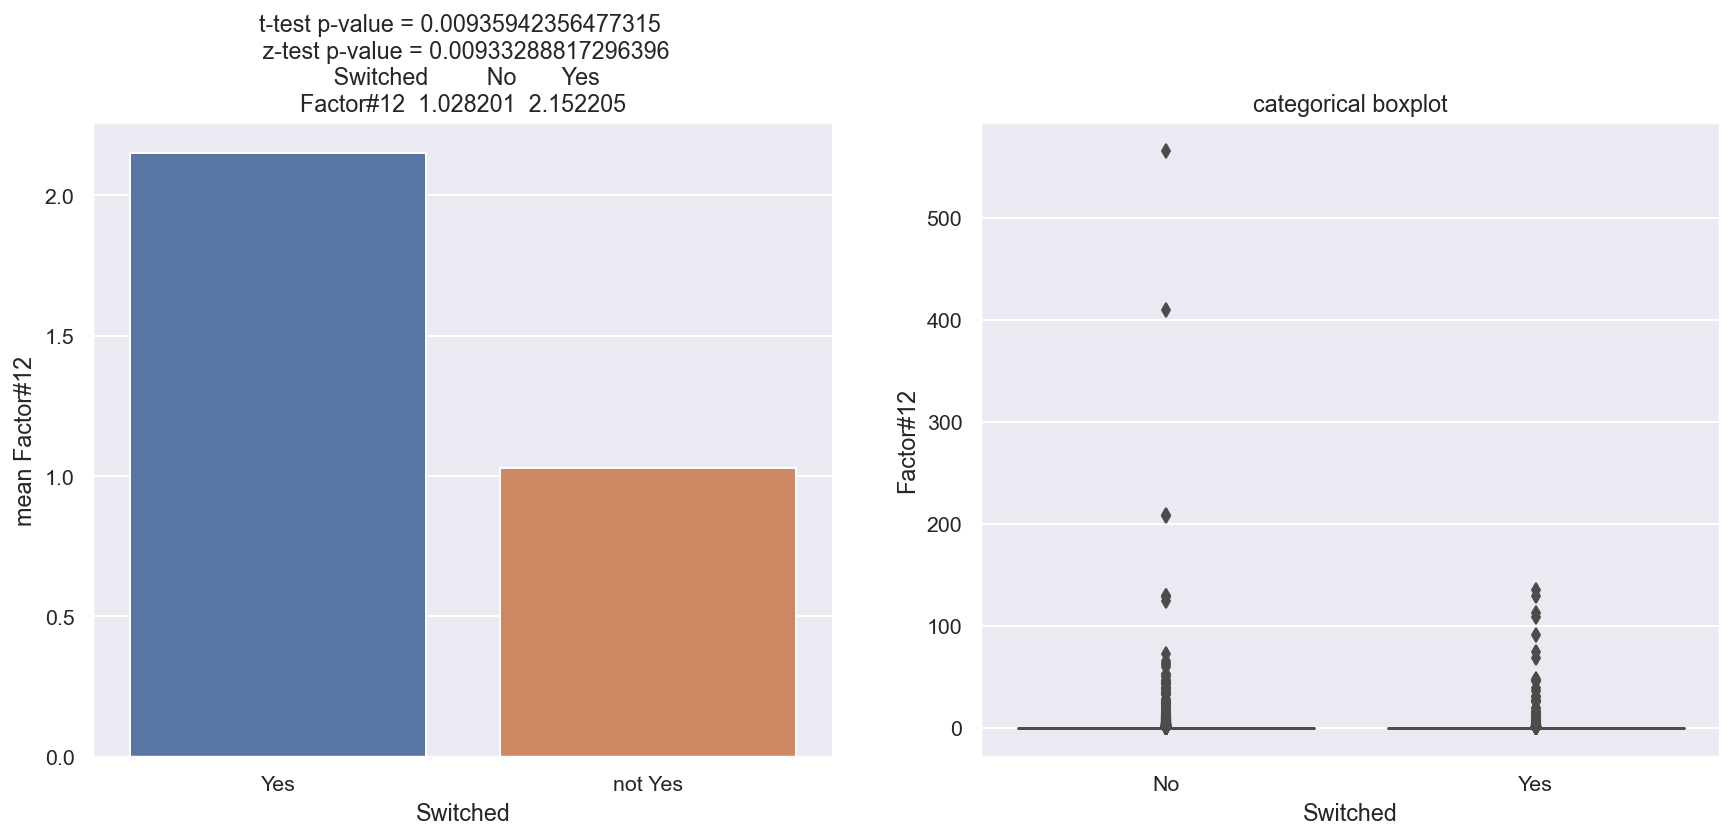

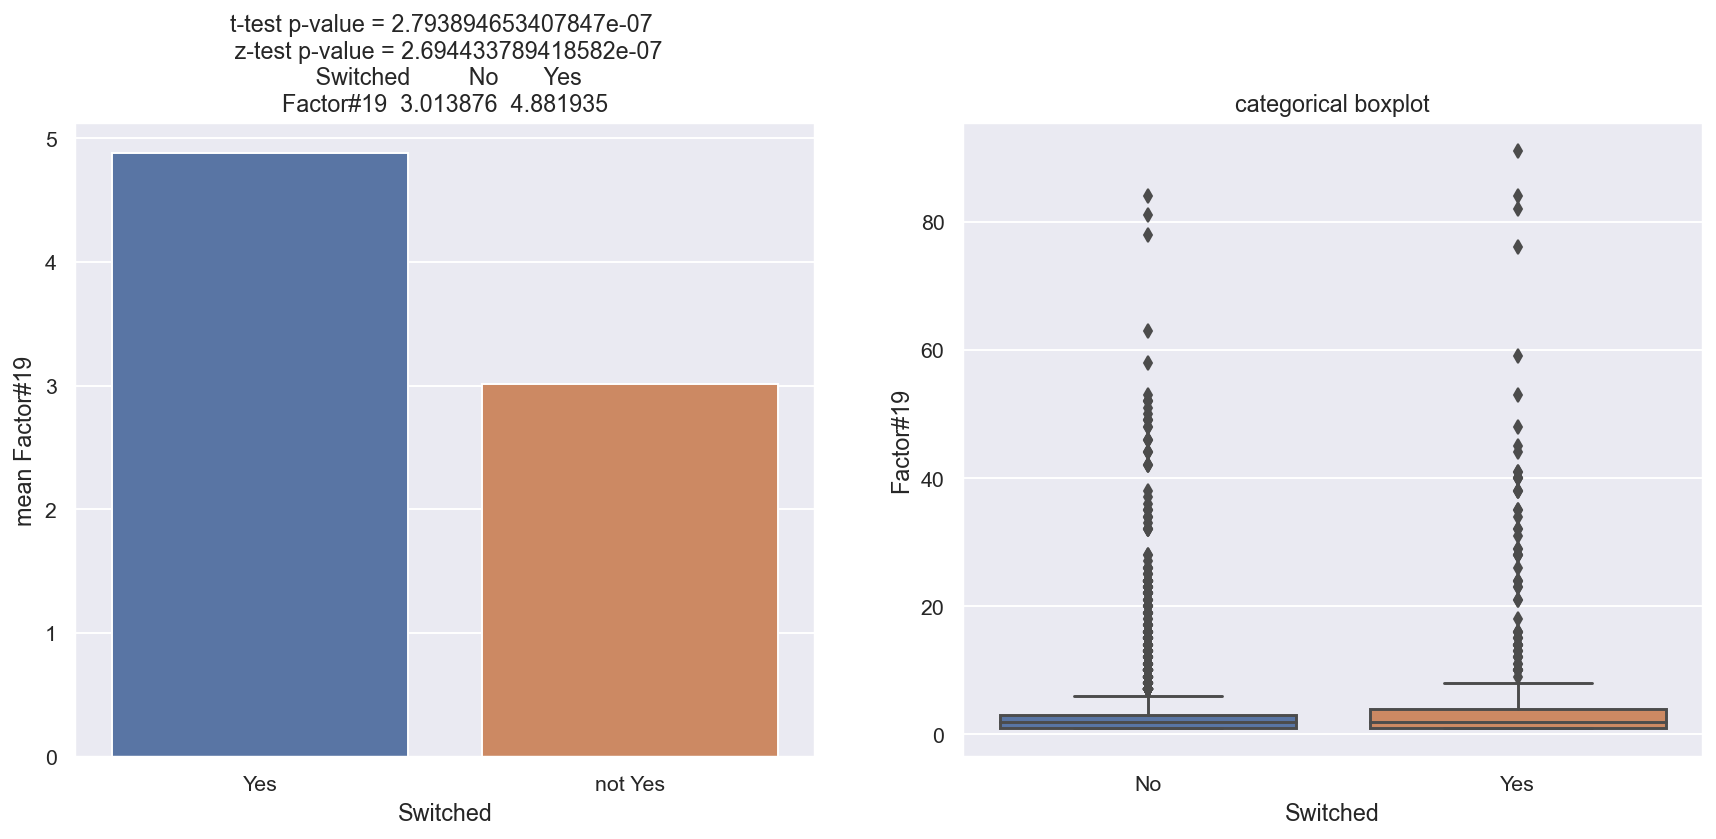

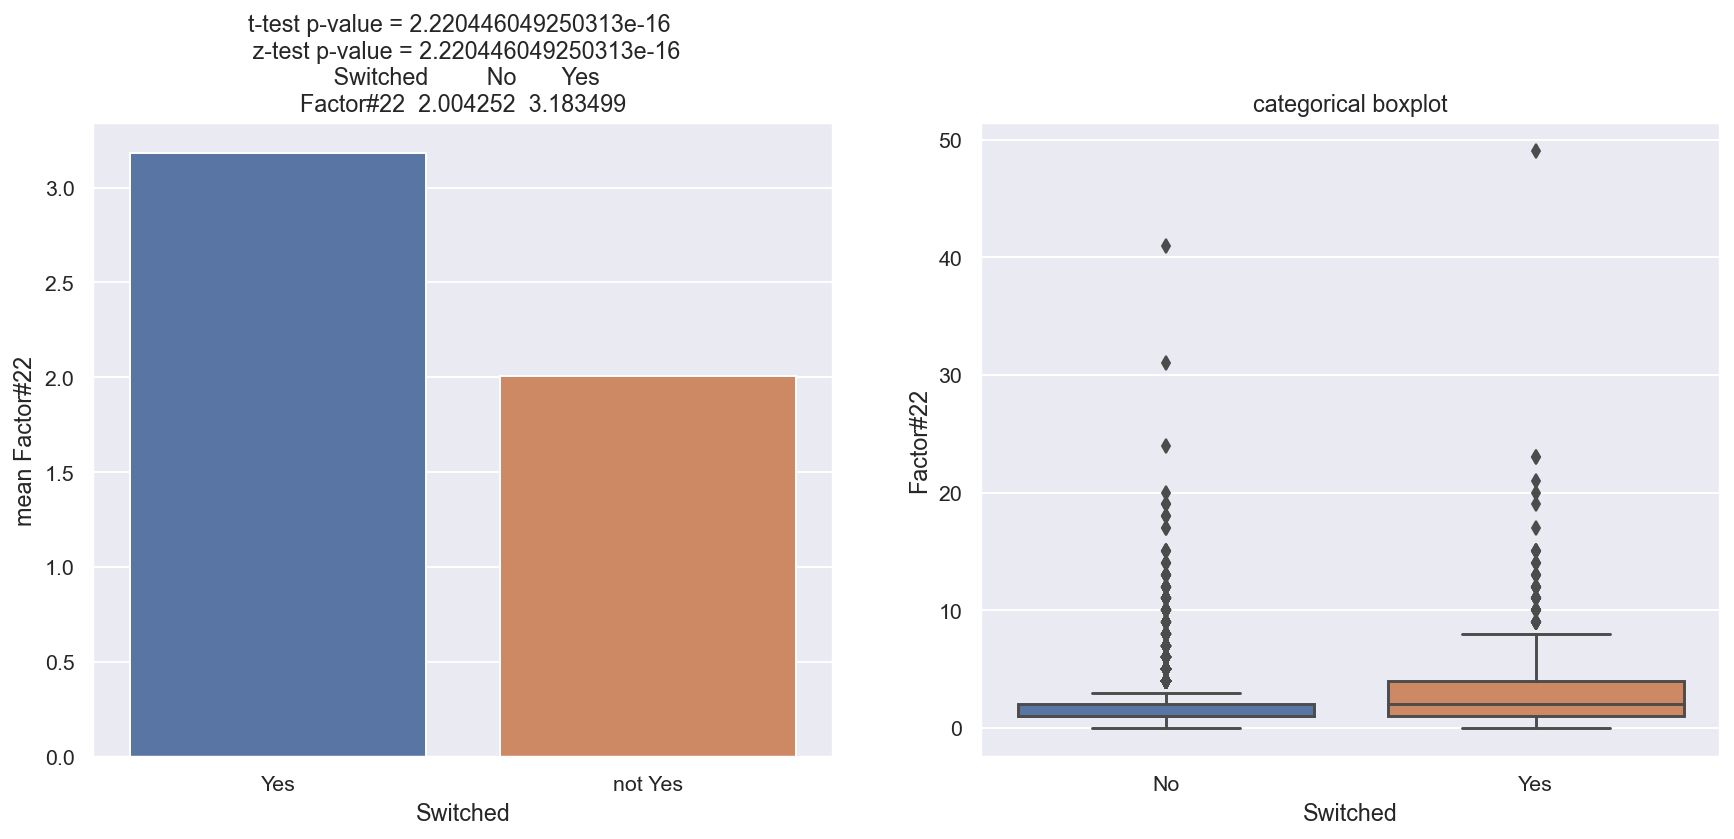

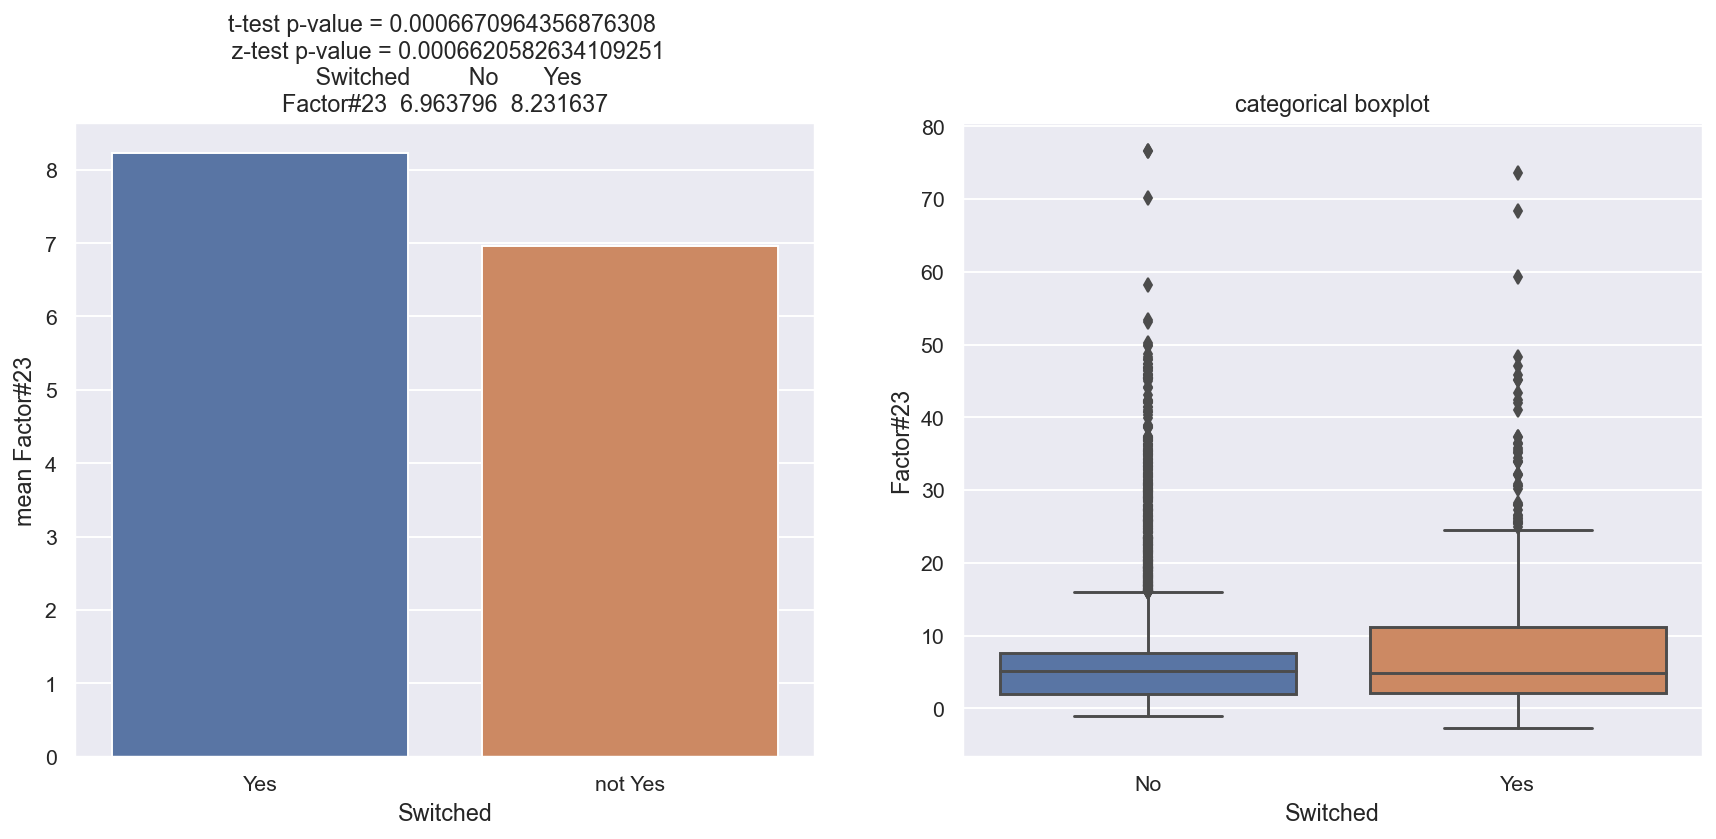

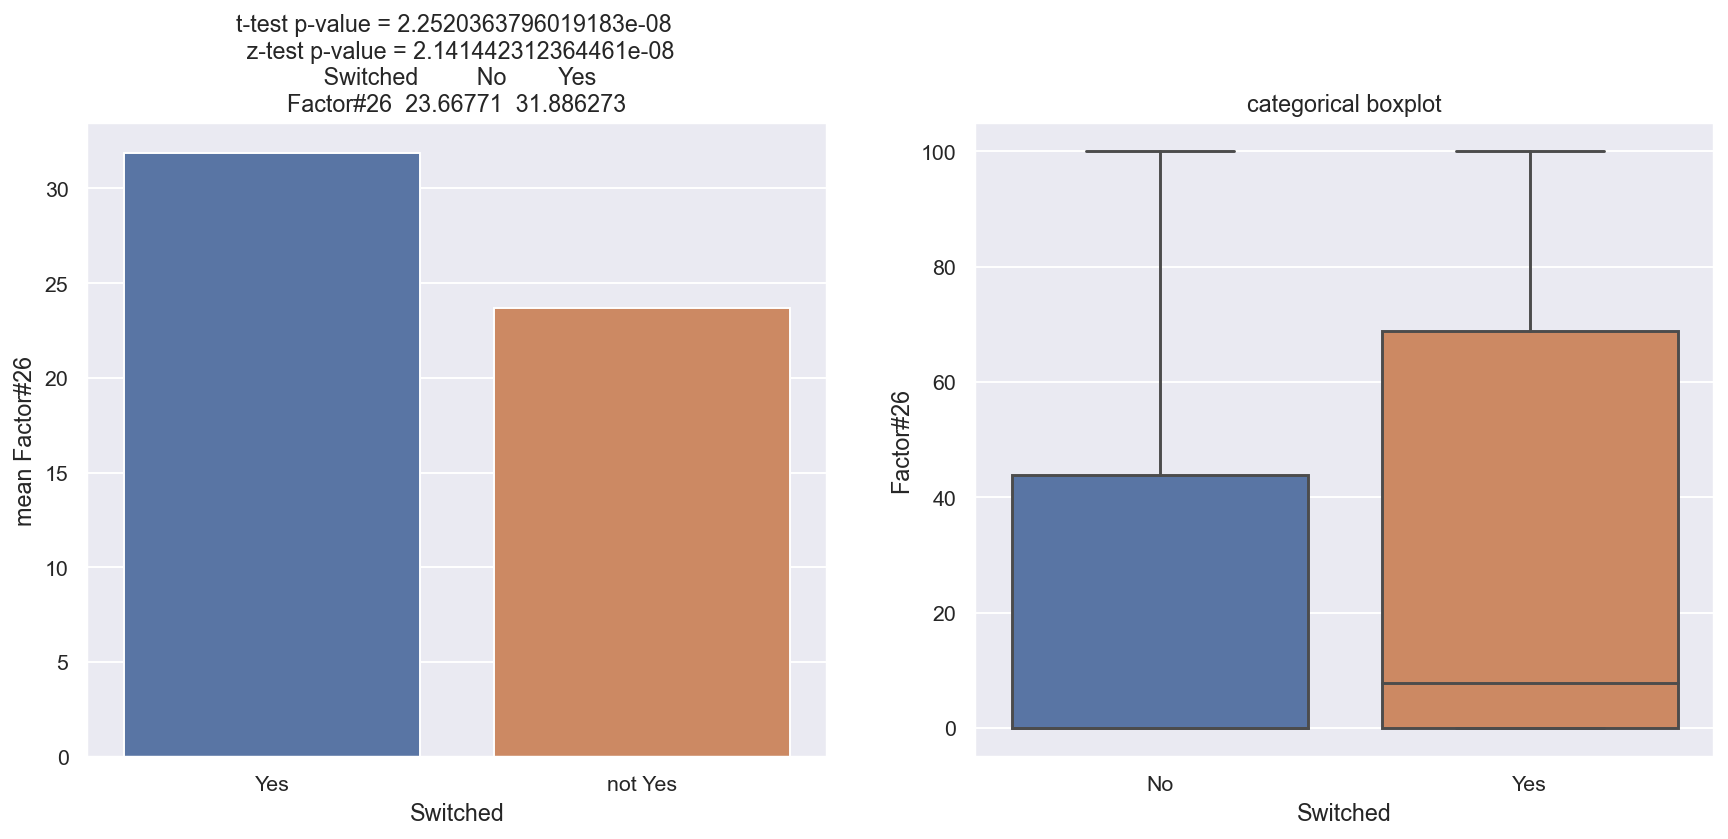

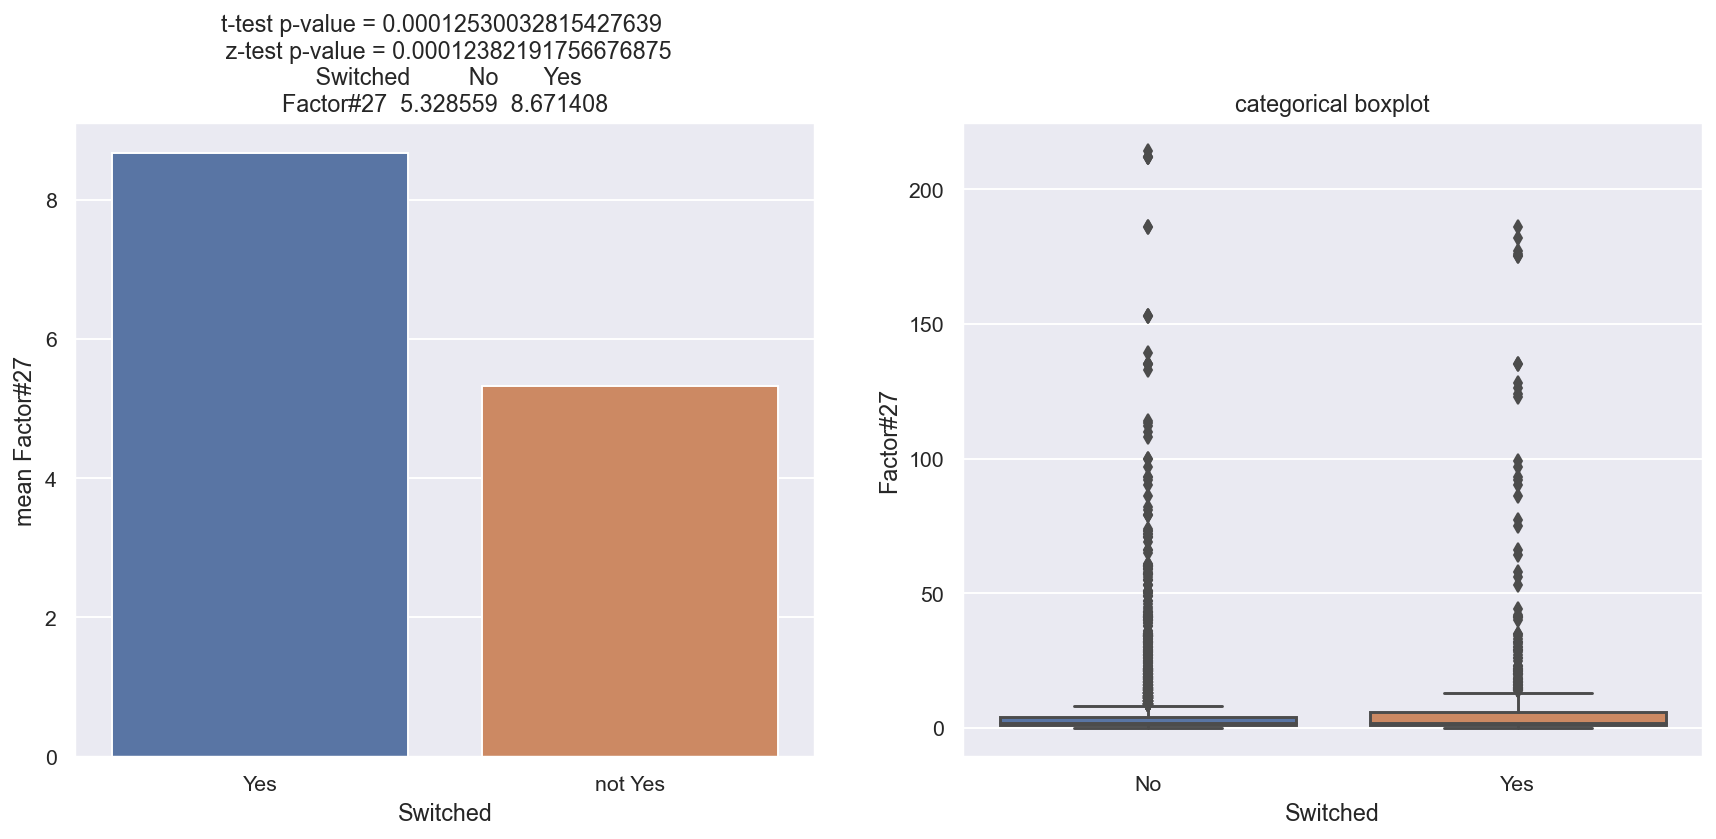

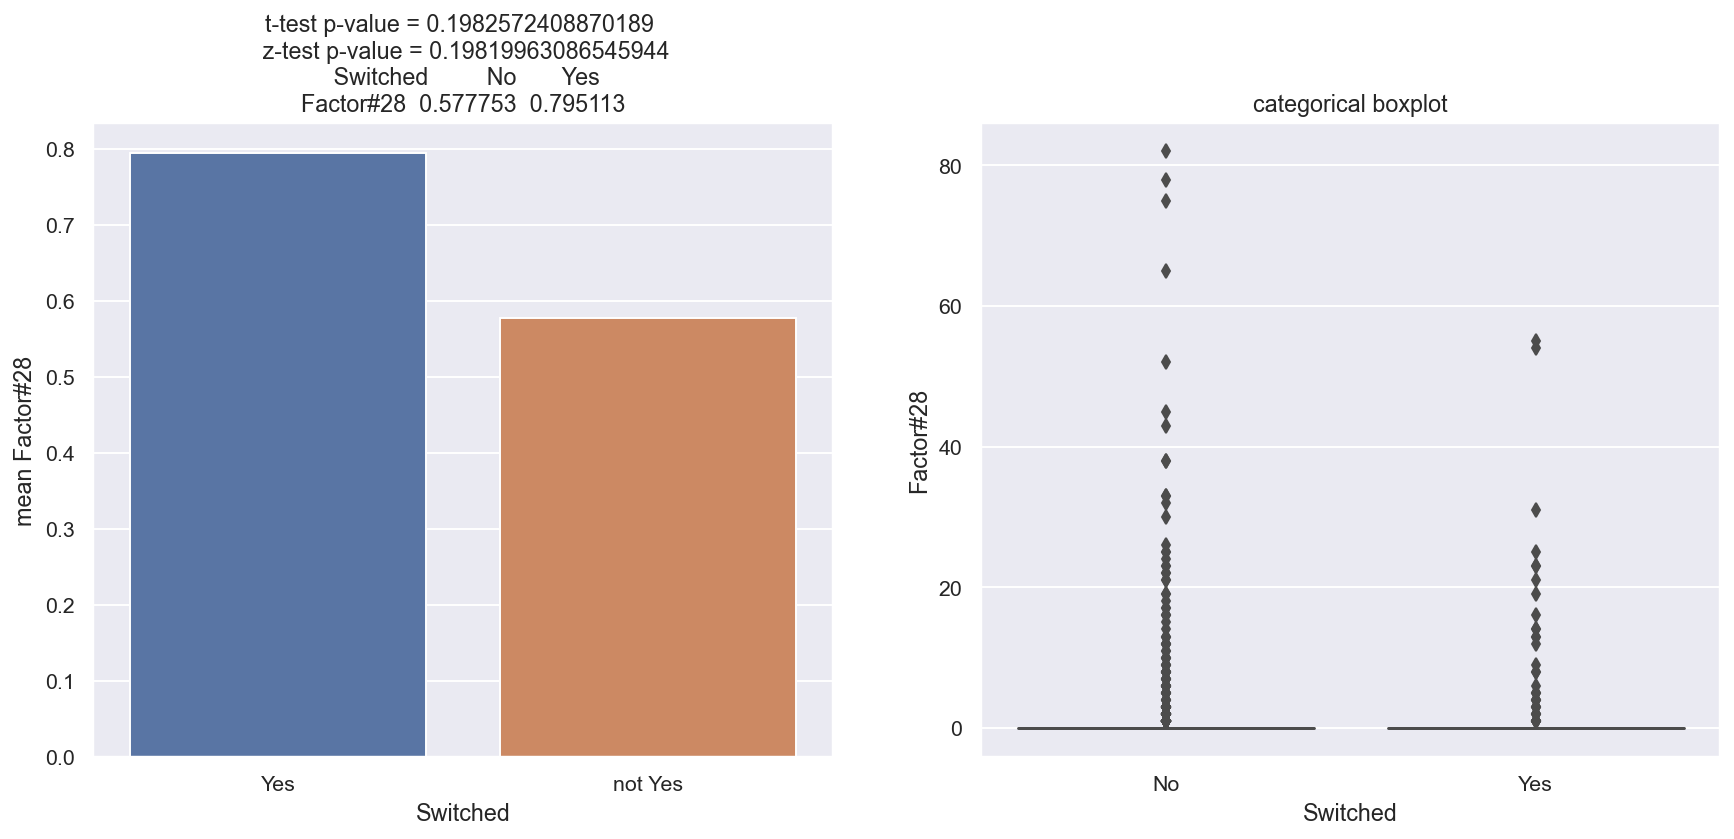

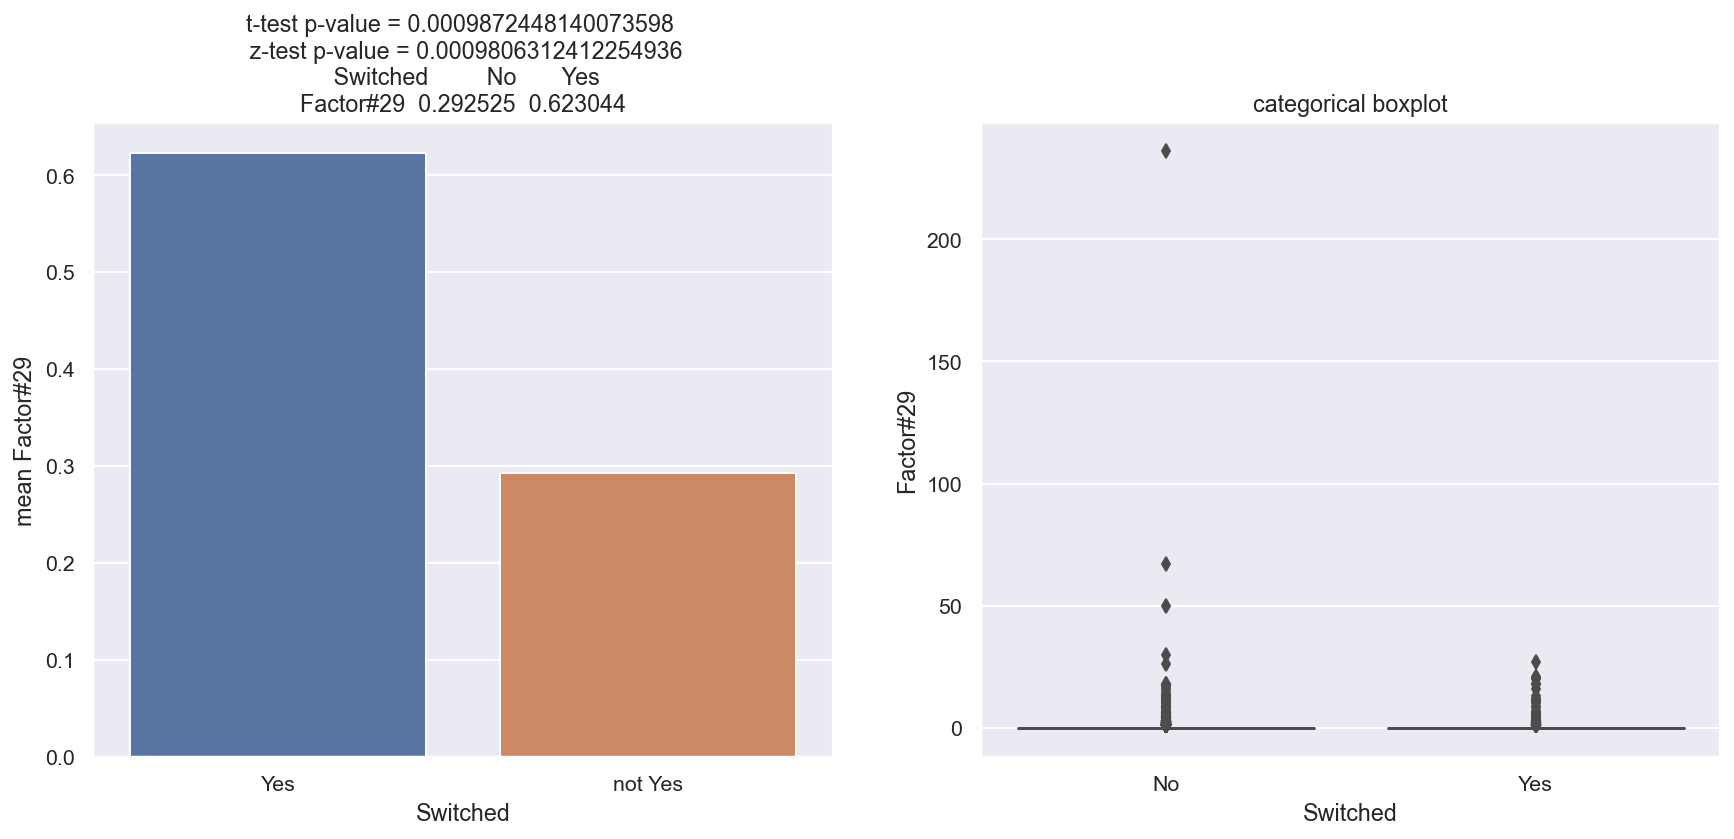

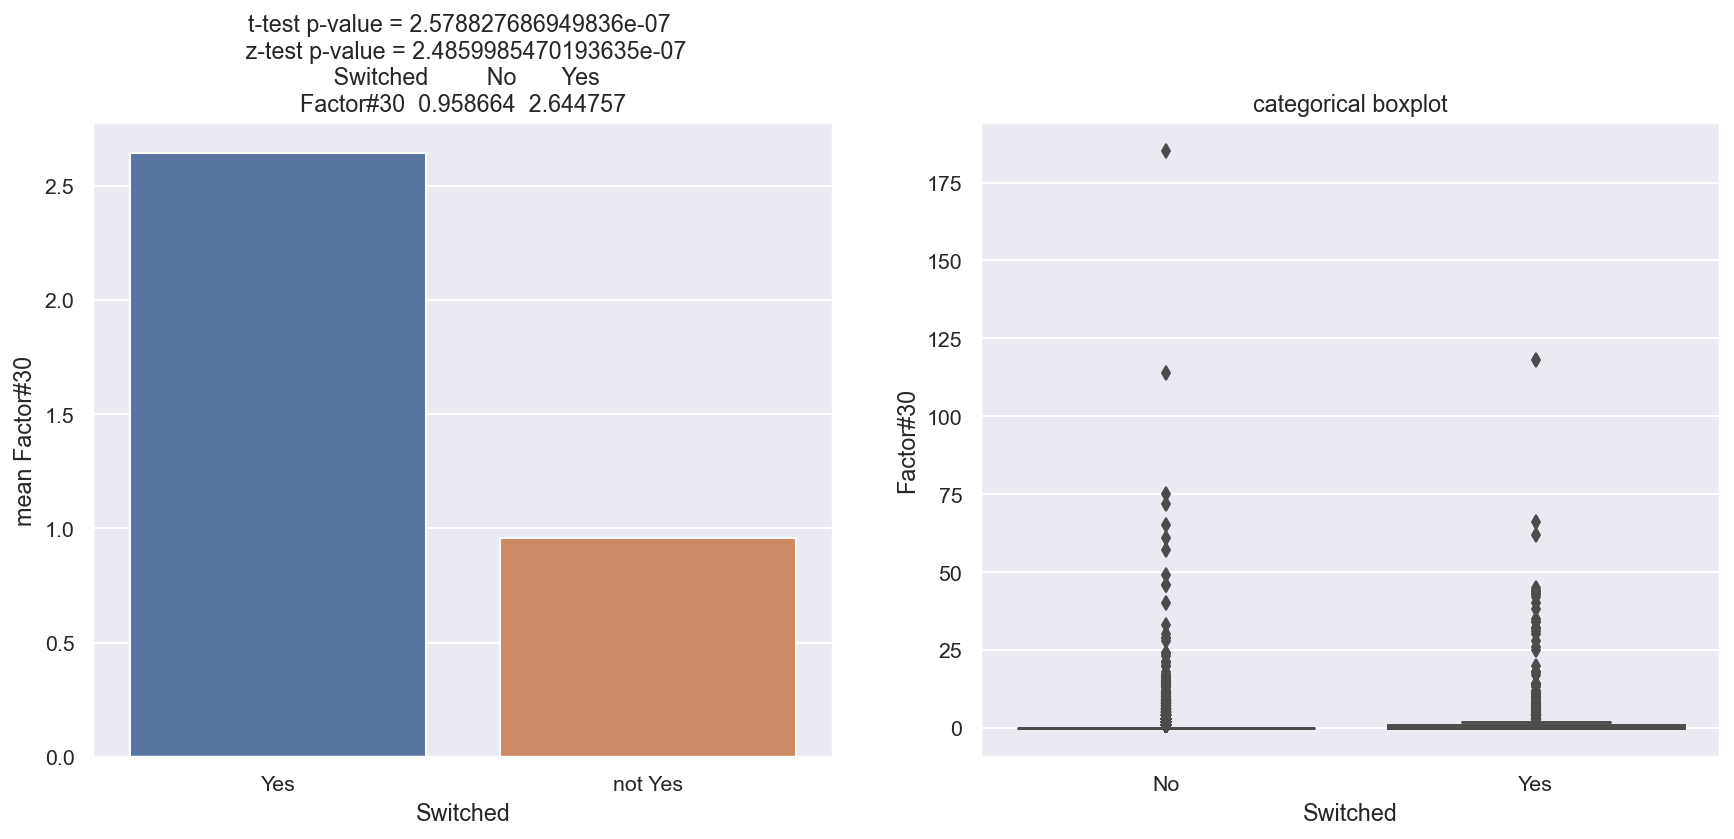

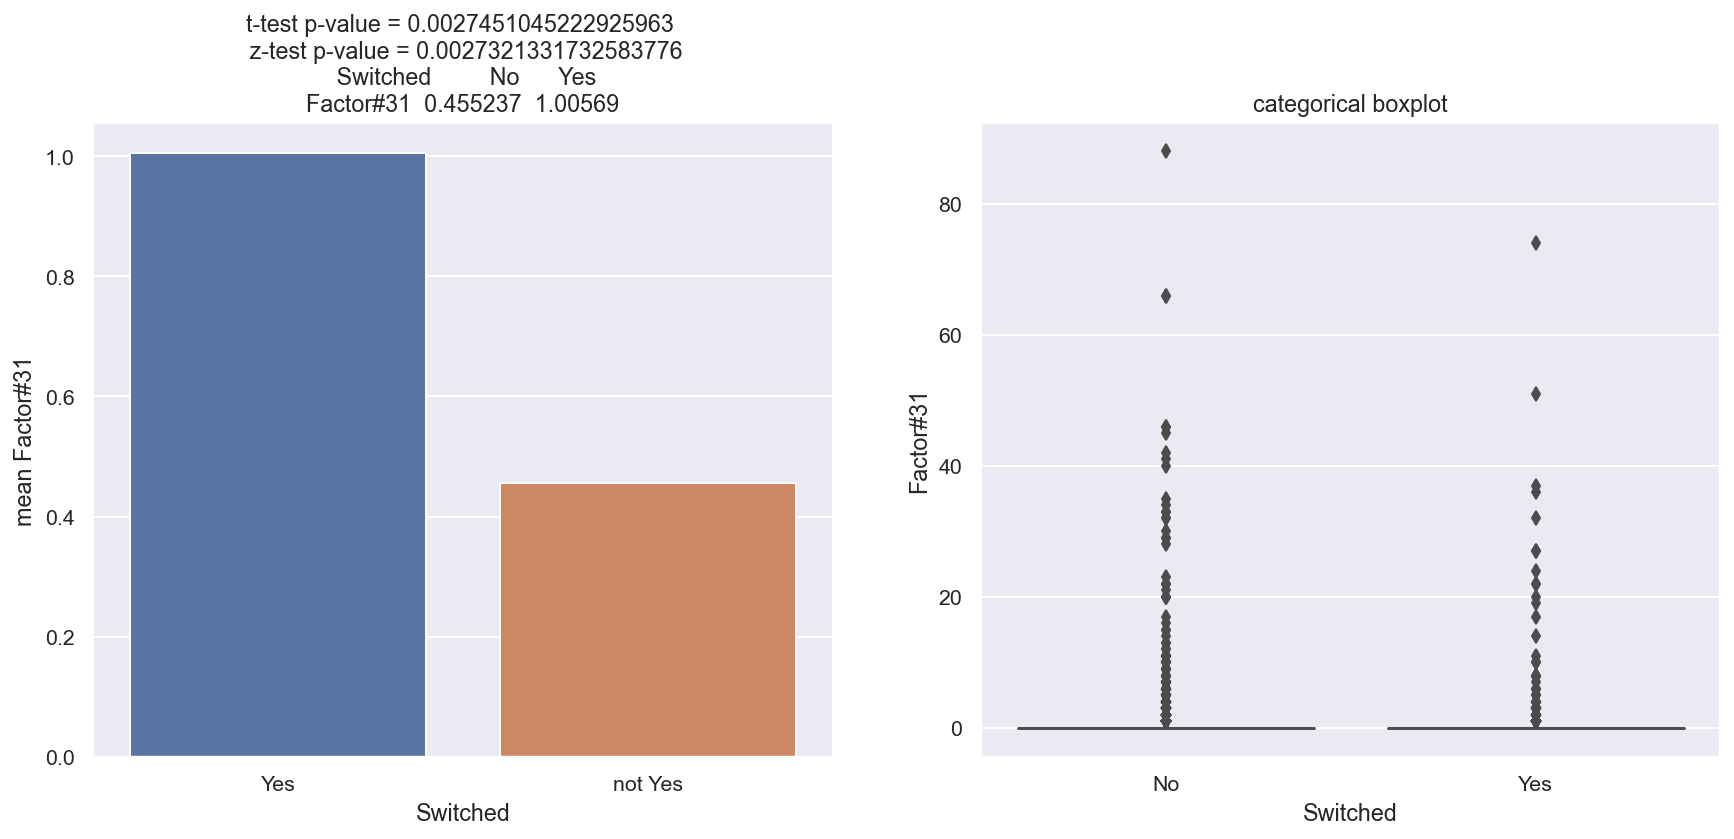

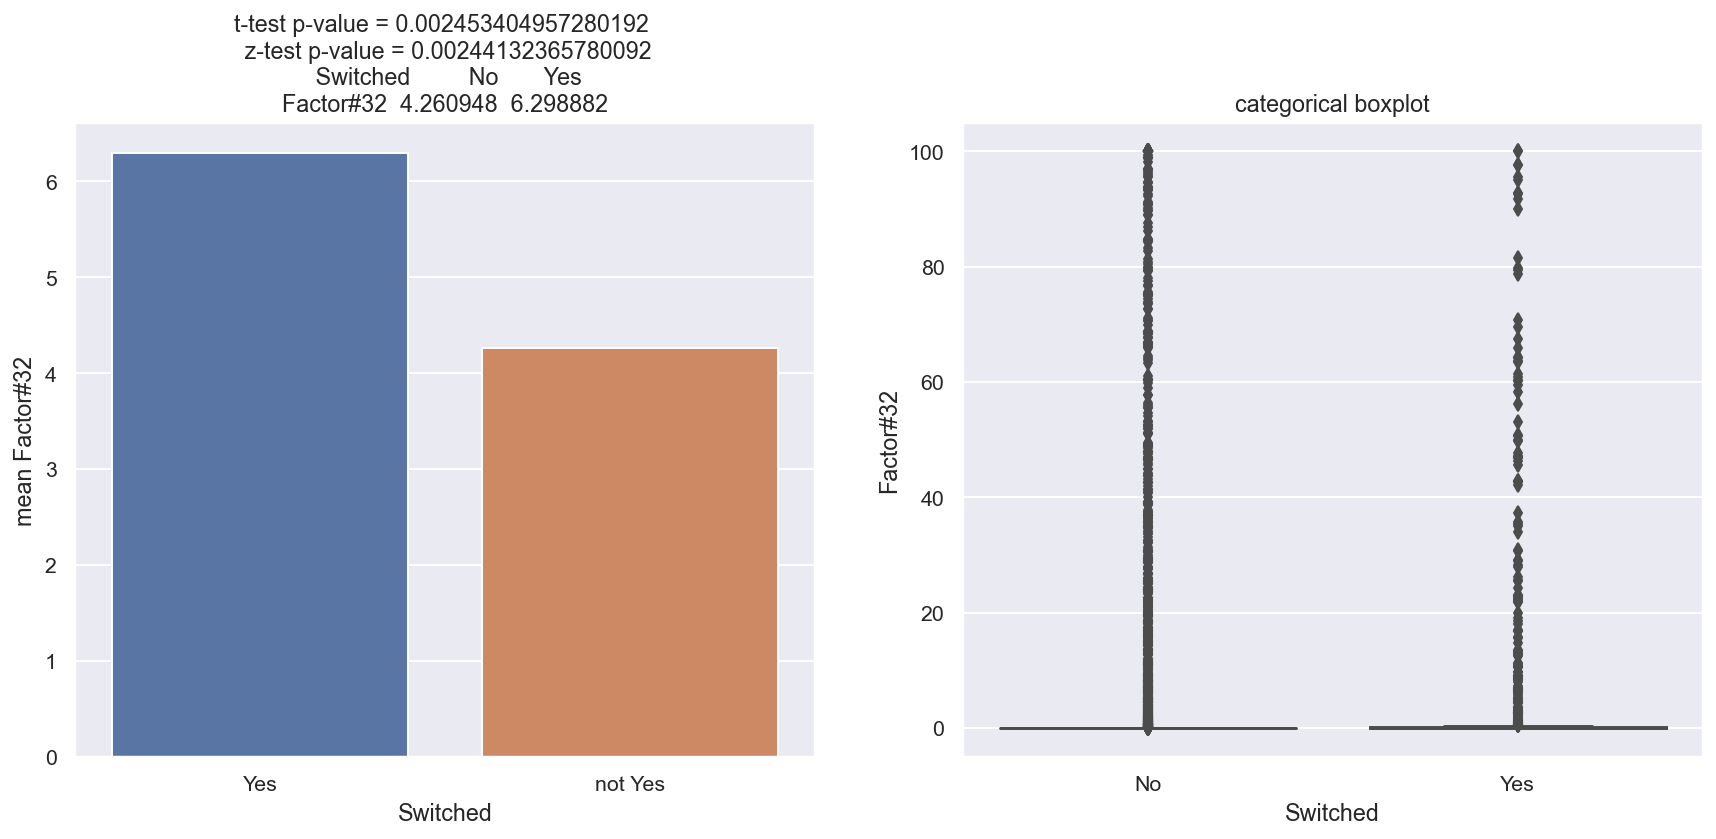

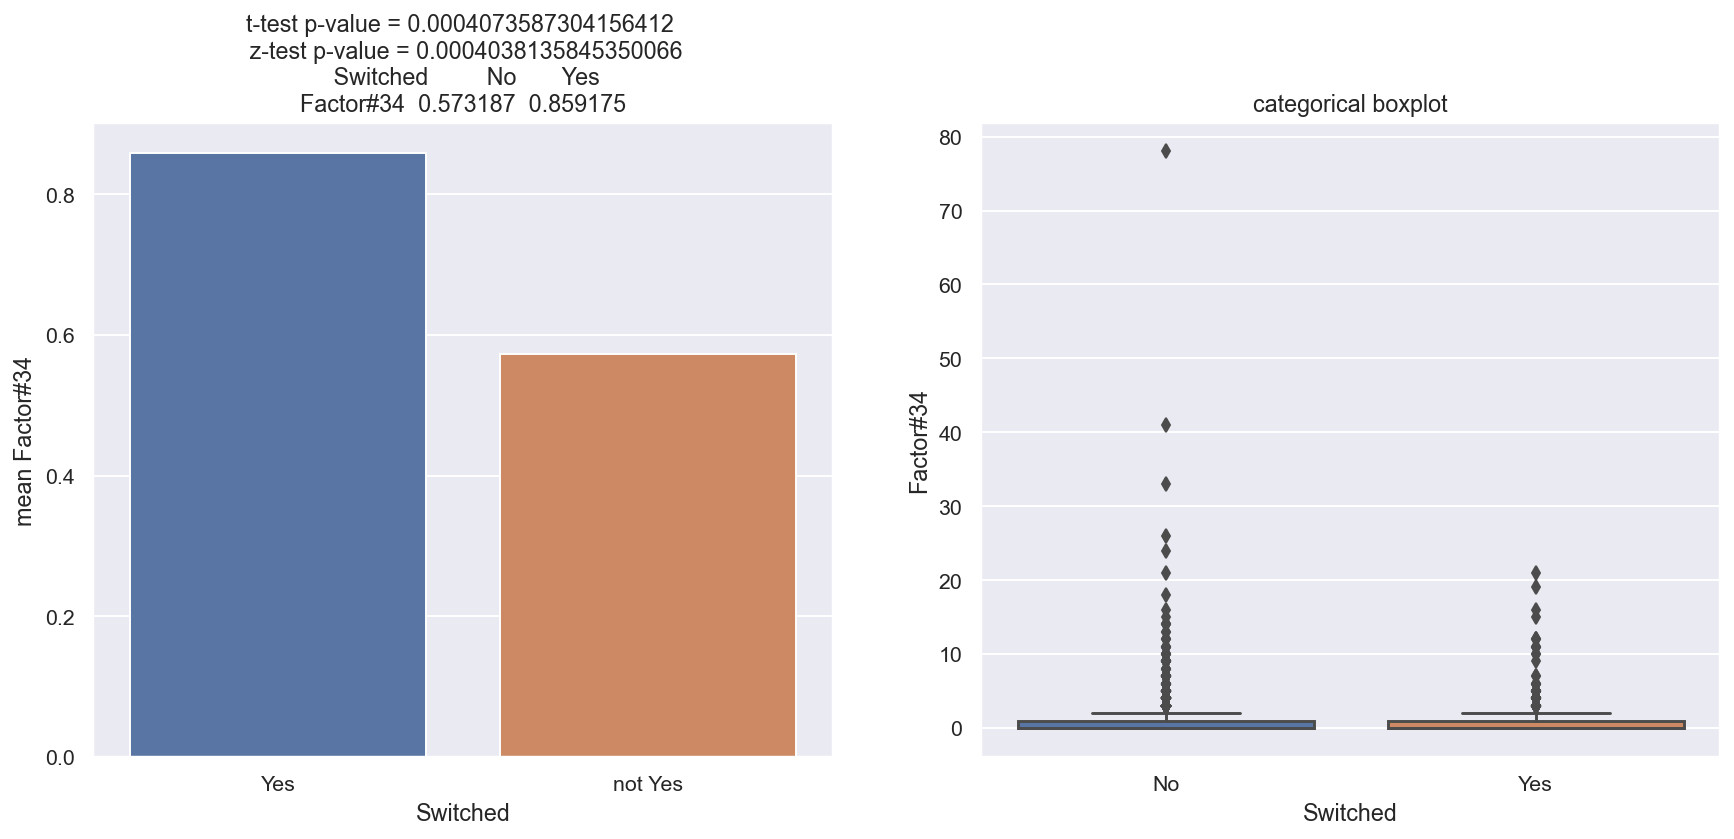

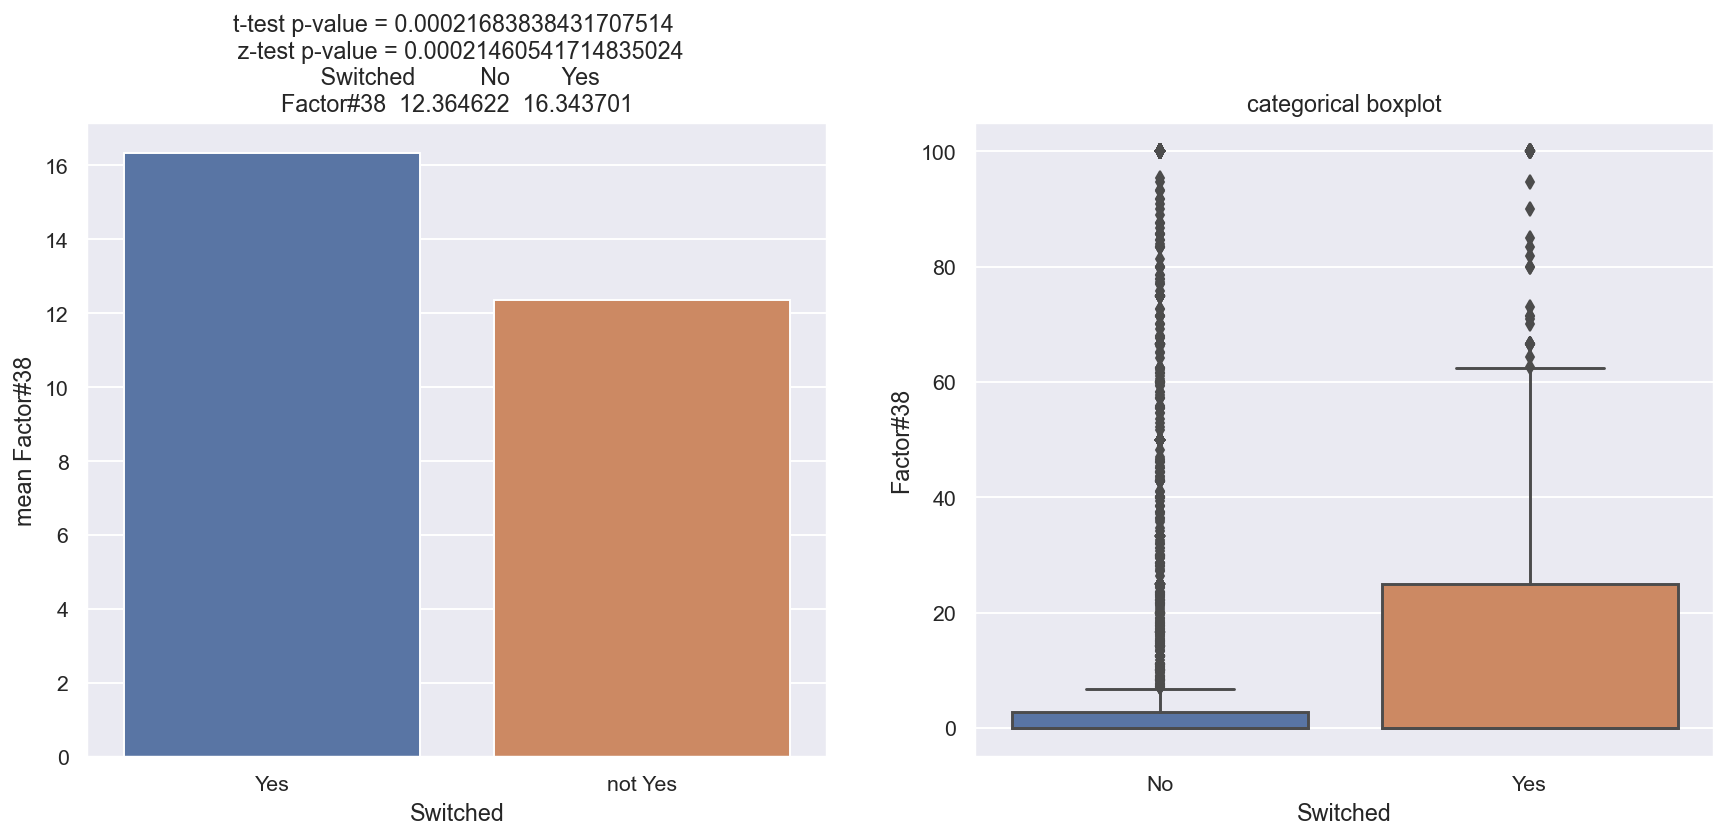

In [30]:
#Finding the features which are significant for dependent feature
for feature in continuous_feature:
    Bivariate_cont_cat(df,feature, 'Switched','Yes')

#### The following continuous features are more significant for churn prediction
- Factor#1 is a significant feature,'0' means not churn is more dependent comparing churn
- Factor#2 is a significant feature,'0' means not churn is more dependent comparing churn
- Factor#4 is a significant feature,'0' means not churn is more dependent comparing churn
- Factor#9 is a significant feature,'1' means churn is more dependent comparing not churn
- Factor#11 is a significant feature,'1' churn is more dependent comparing '0' not churn
- Factor#12 is a significant feature,'1' churn is more dependent comparing '0' not churn
- Factor#19 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#22 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#23 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#26 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#27 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#29 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#30 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#31 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#32 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#34 is a significant feature,'1' means churn is more dependent comparing '0' not churn
- Factor#38 is a significant feature,'1' means churn is more dependent comparing '0' not churn

### The following continuous features are not significant for churn prediction
- Factor#03 is not a significant feature.
- Factor#06 is not a significant feature.
- Factor#10 is not a significant feature.

In [31]:
#finding the significance of categorical features
from scipy.stats import chi2_contingency
#defining function for categorical-categorical bivariate analysis
def BVA_categorical_plot(data, tar, cat):
    data = df[[cat,tar]][:]
    table = pd.crosstab(df[tar],df[cat],)
    obser = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])
    #performing chi2 test
    chi, p, dof, expected = chi2_contingency(obser)
    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

  #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
    ax1 = df.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    int_level = df[cat].value_counts()

In [32]:
# discrete features
discrete_features

['Switched',
 'Factor#5',
 'Factor#7',
 'Factor#8',
 'Factor#13',
 'Factor#14',
 'Factor#15',
 'Factor#16',
 'Factor#17',
 'Factor#18',
 'Factor#20',
 'Factor#21',
 'Factor#24',
 'Factor#25',
 'Factor#33',
 'Factor#35',
 'Factor#36',
 'Factor#37']

## Discrete Feature P values

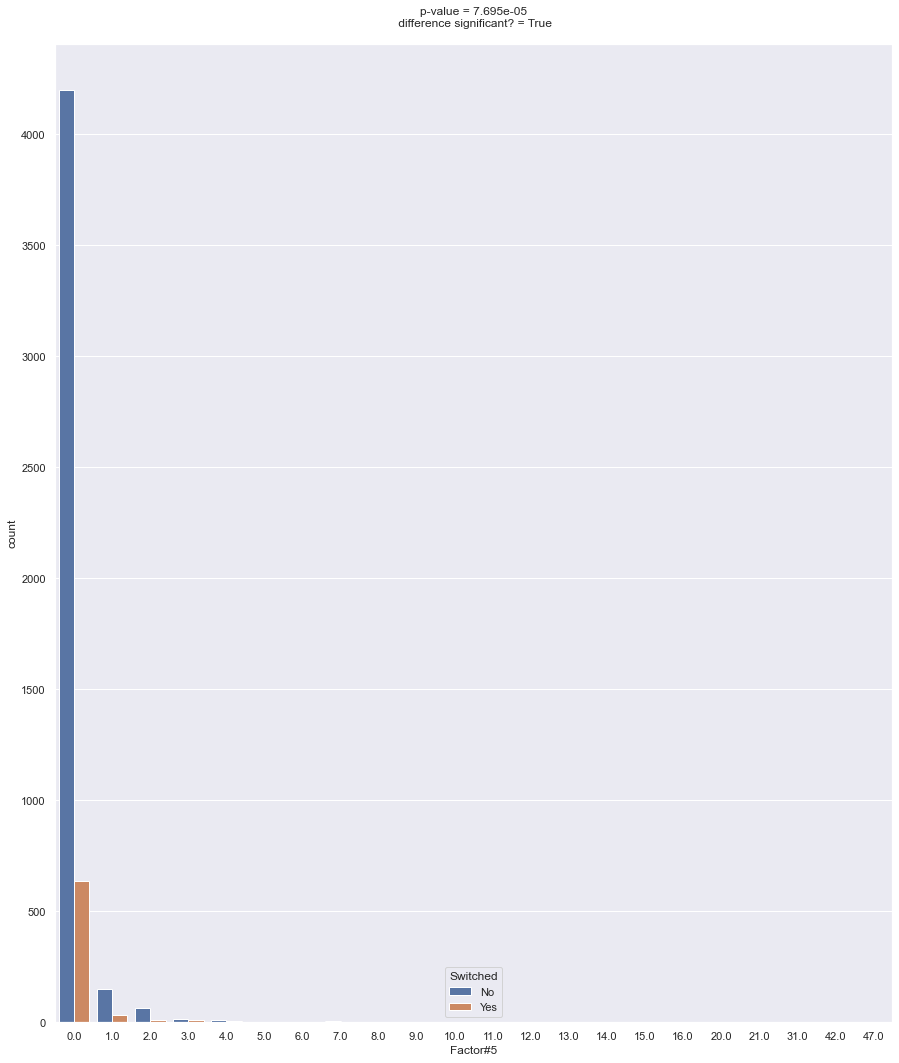

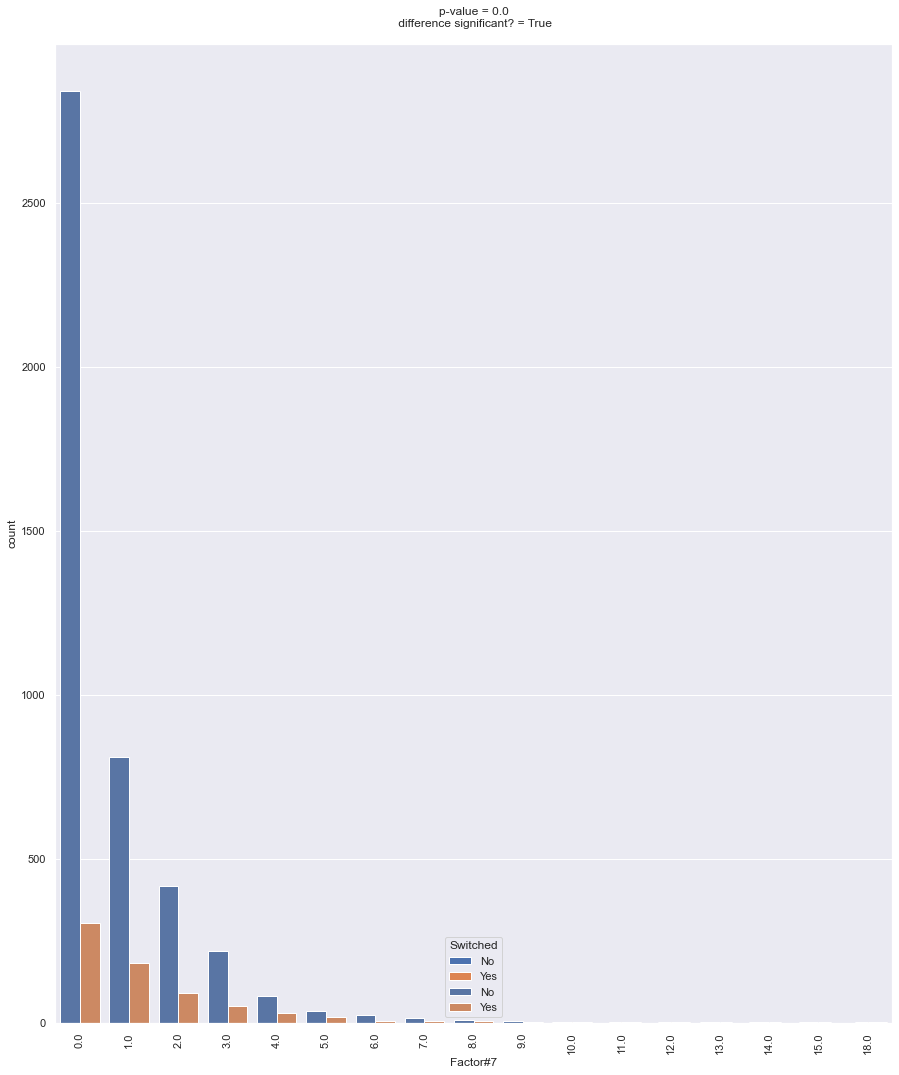

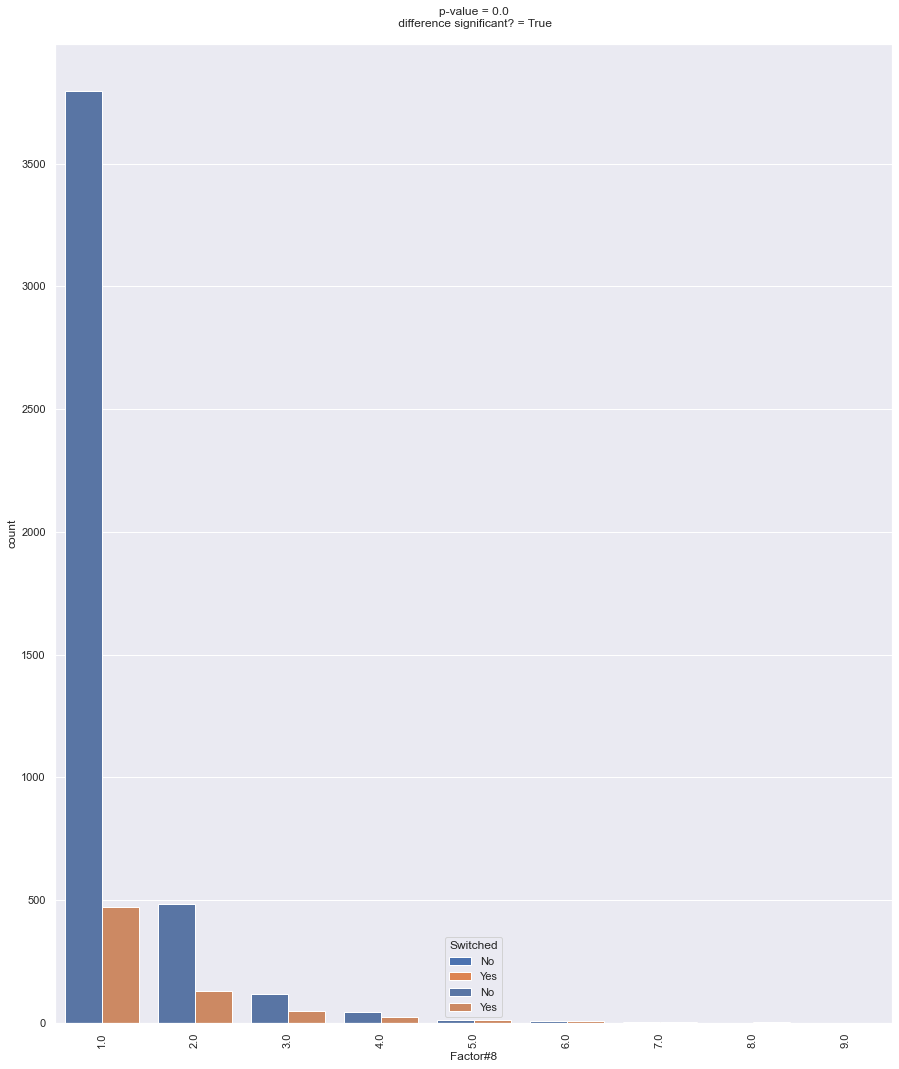

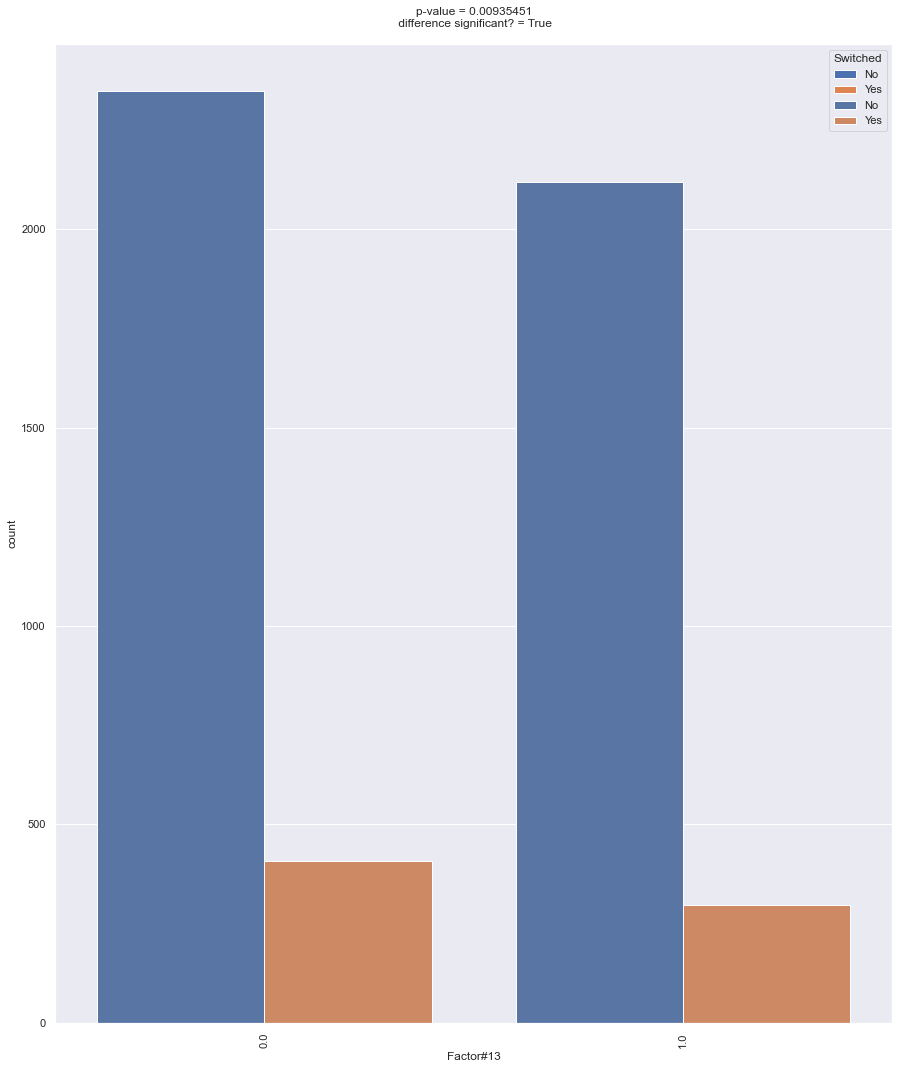

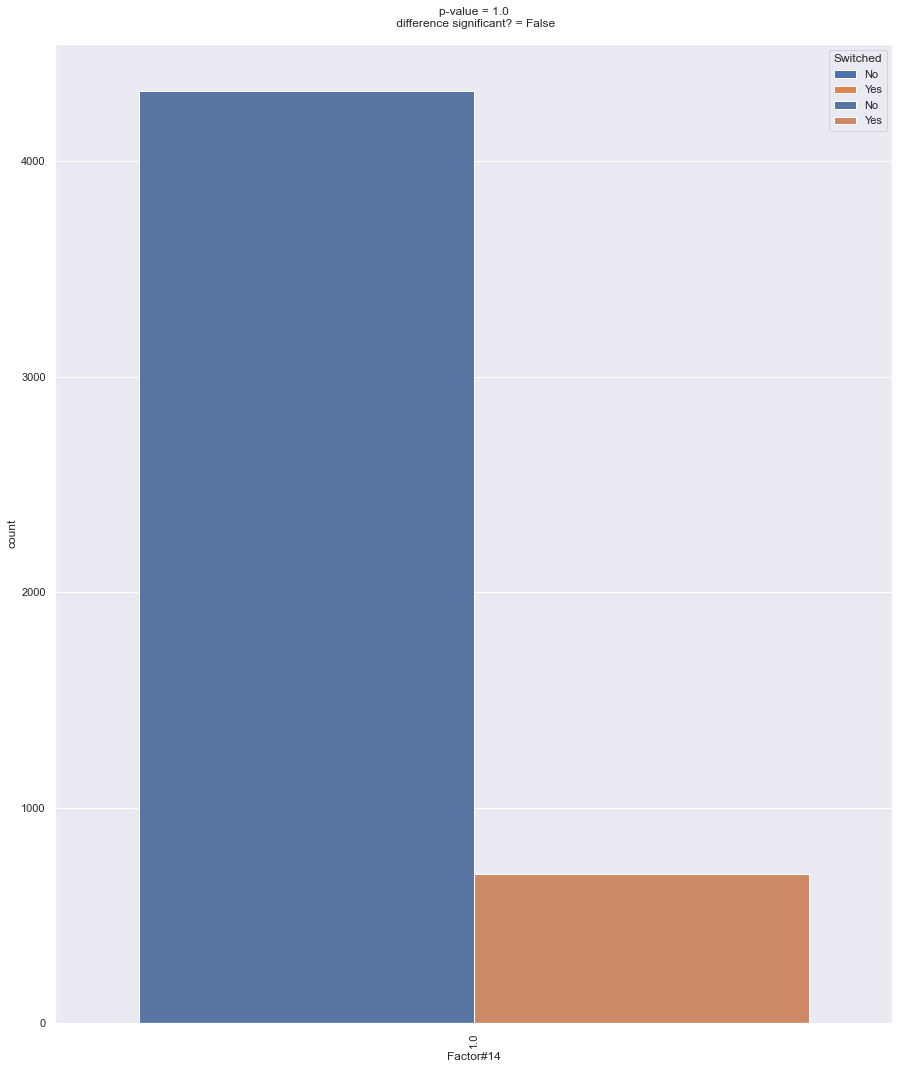

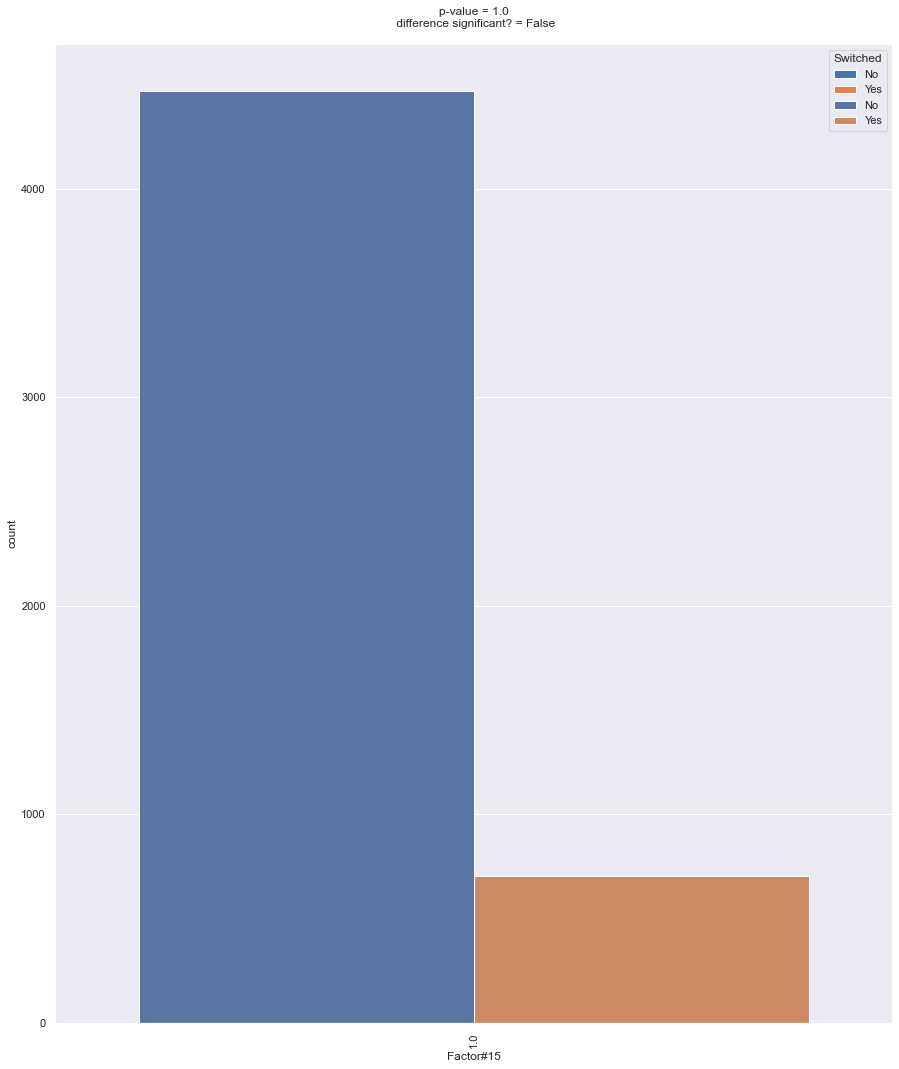

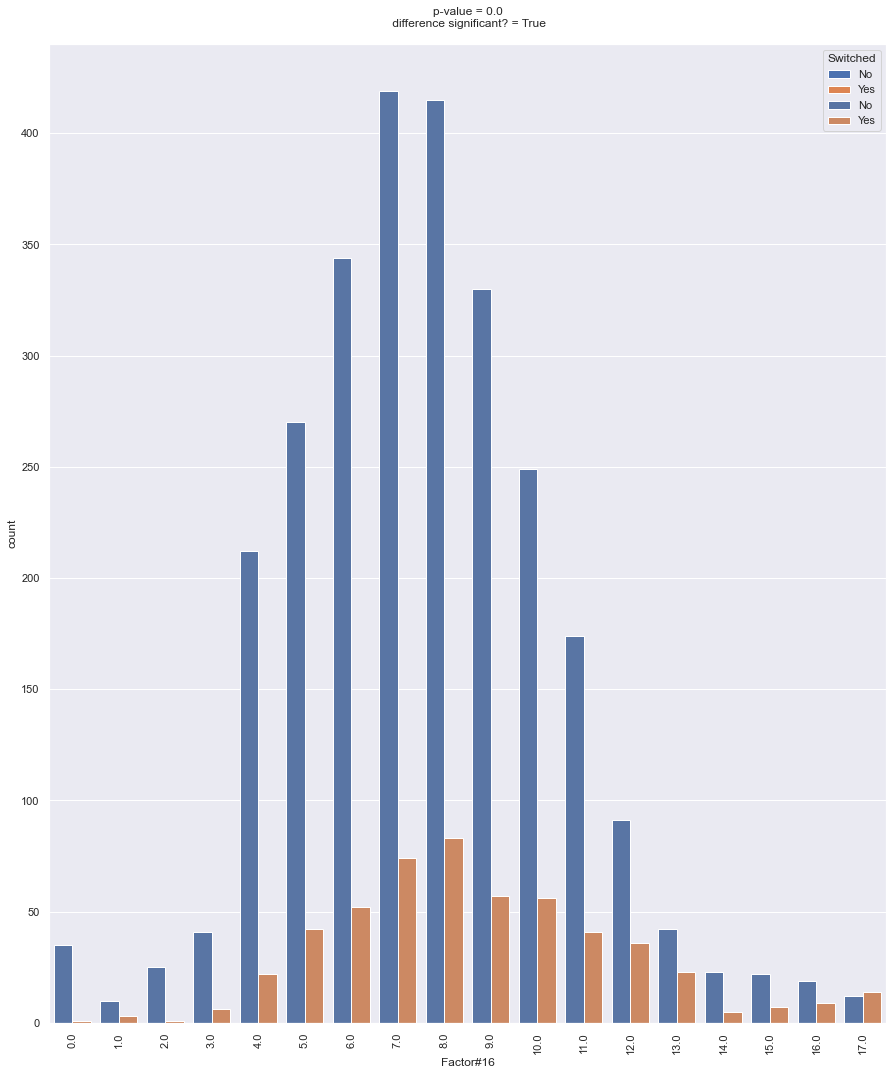

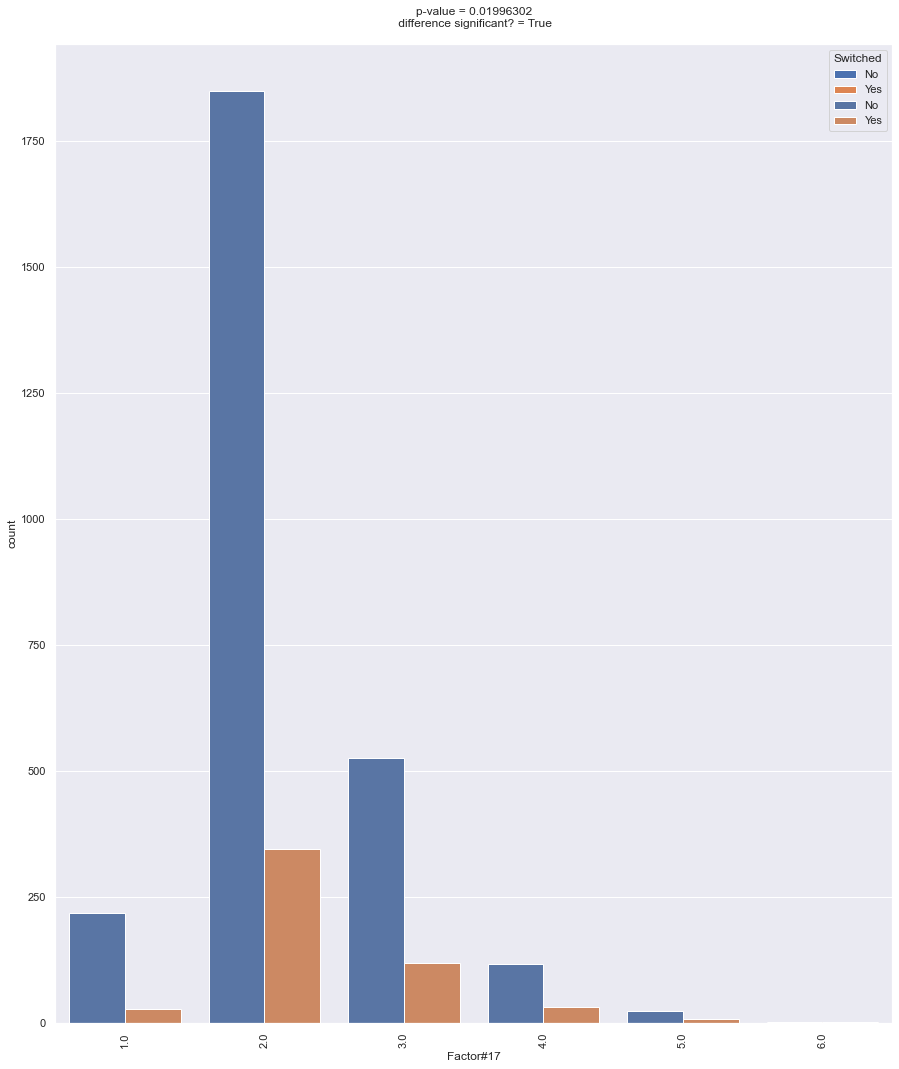

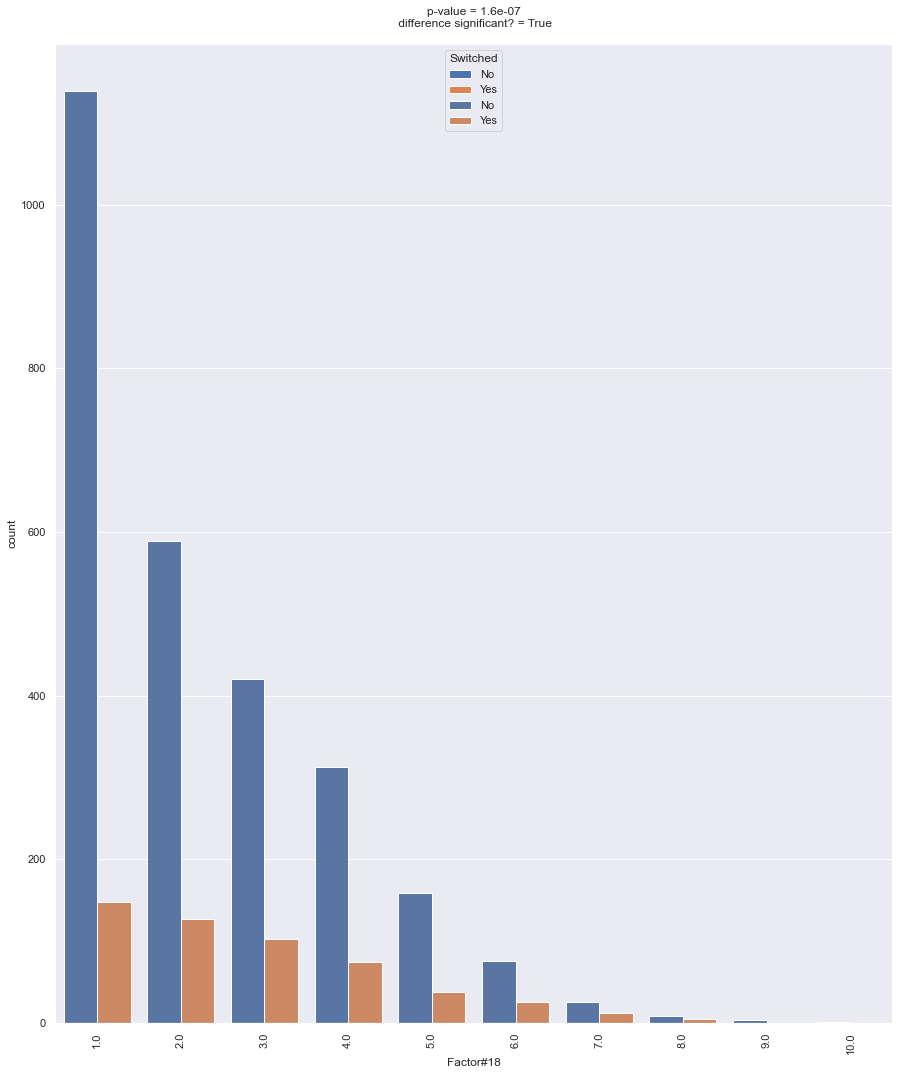

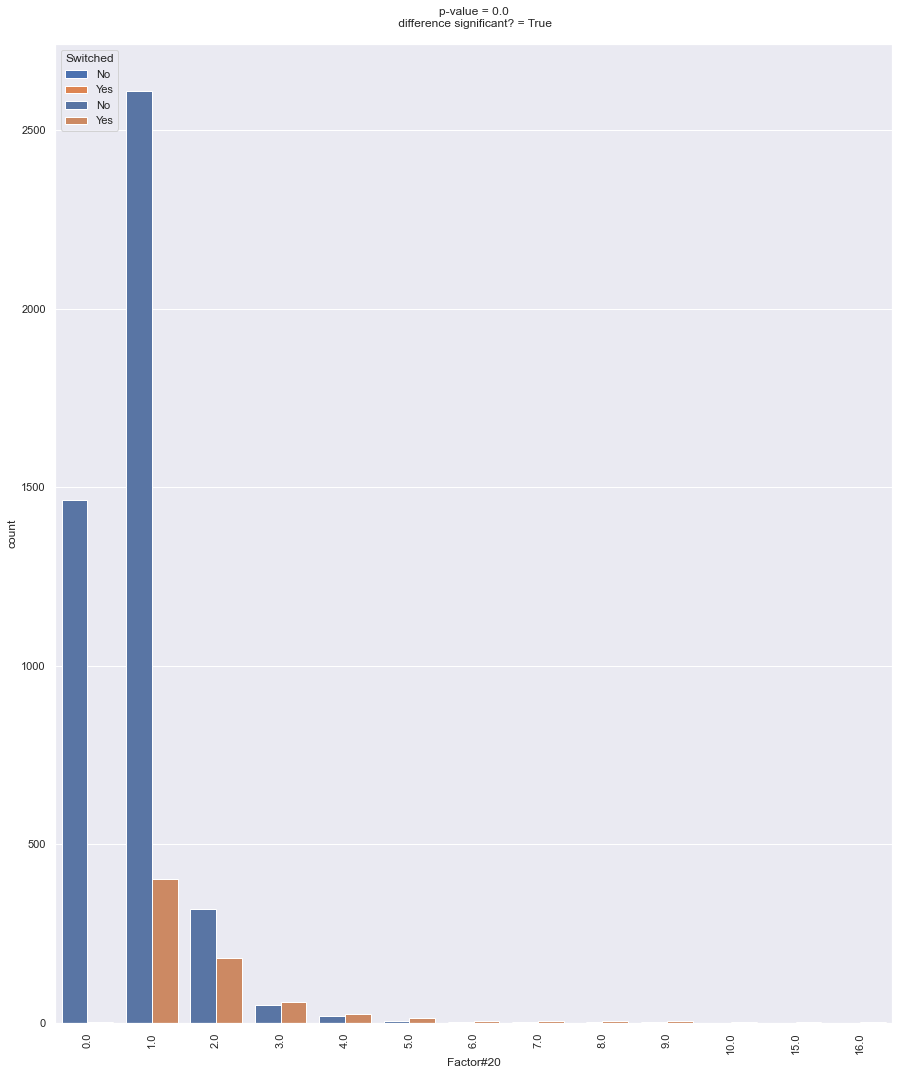

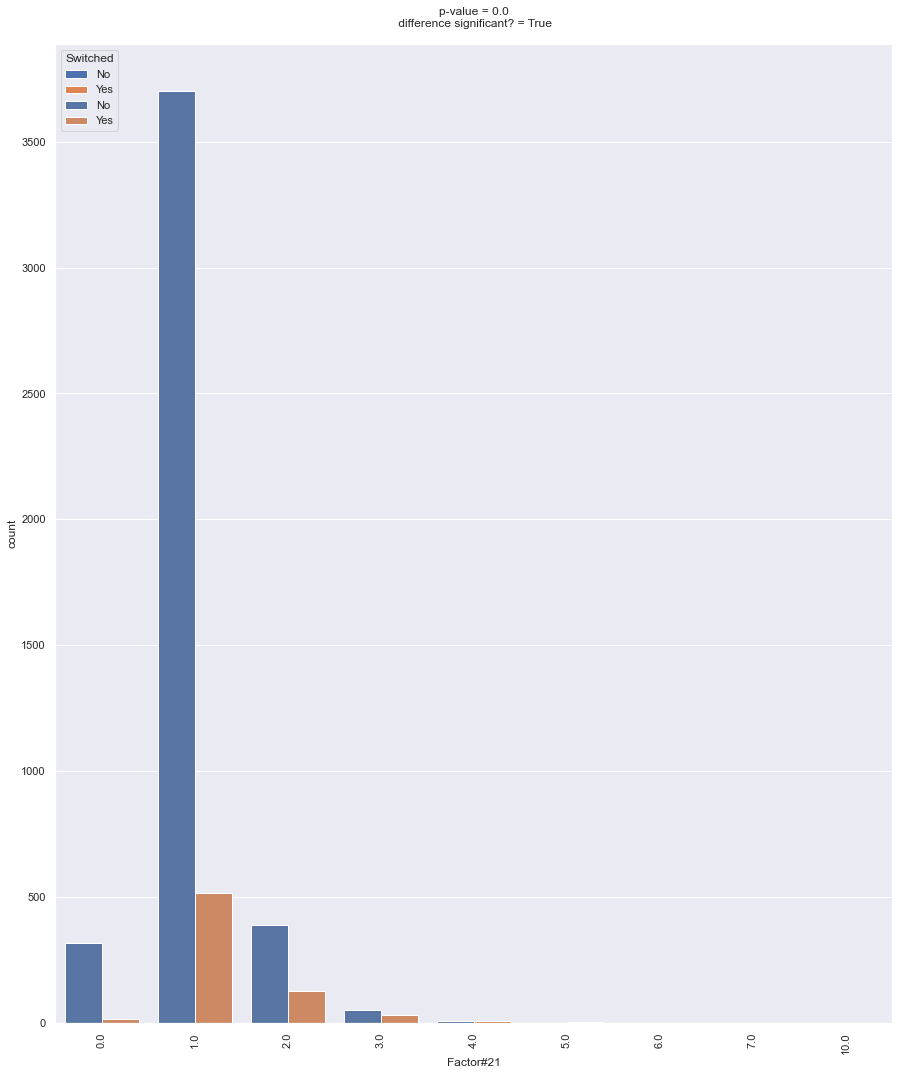

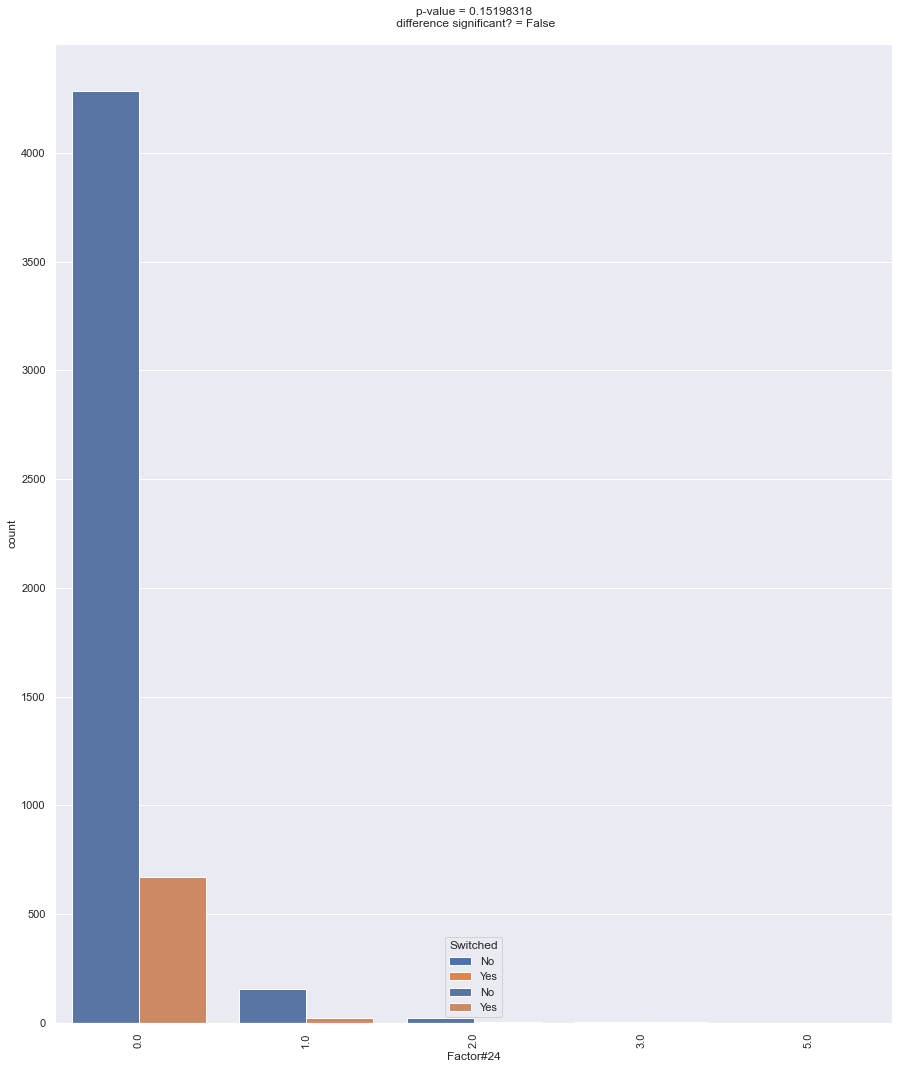

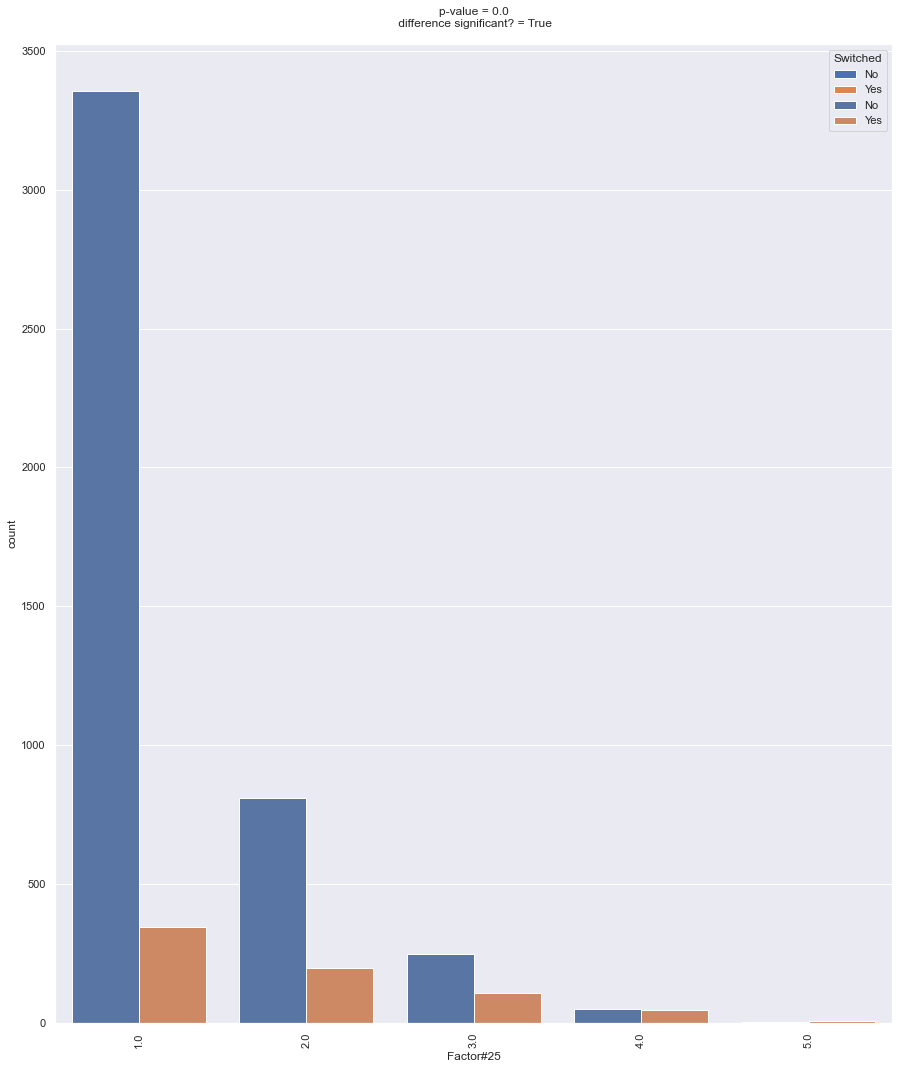

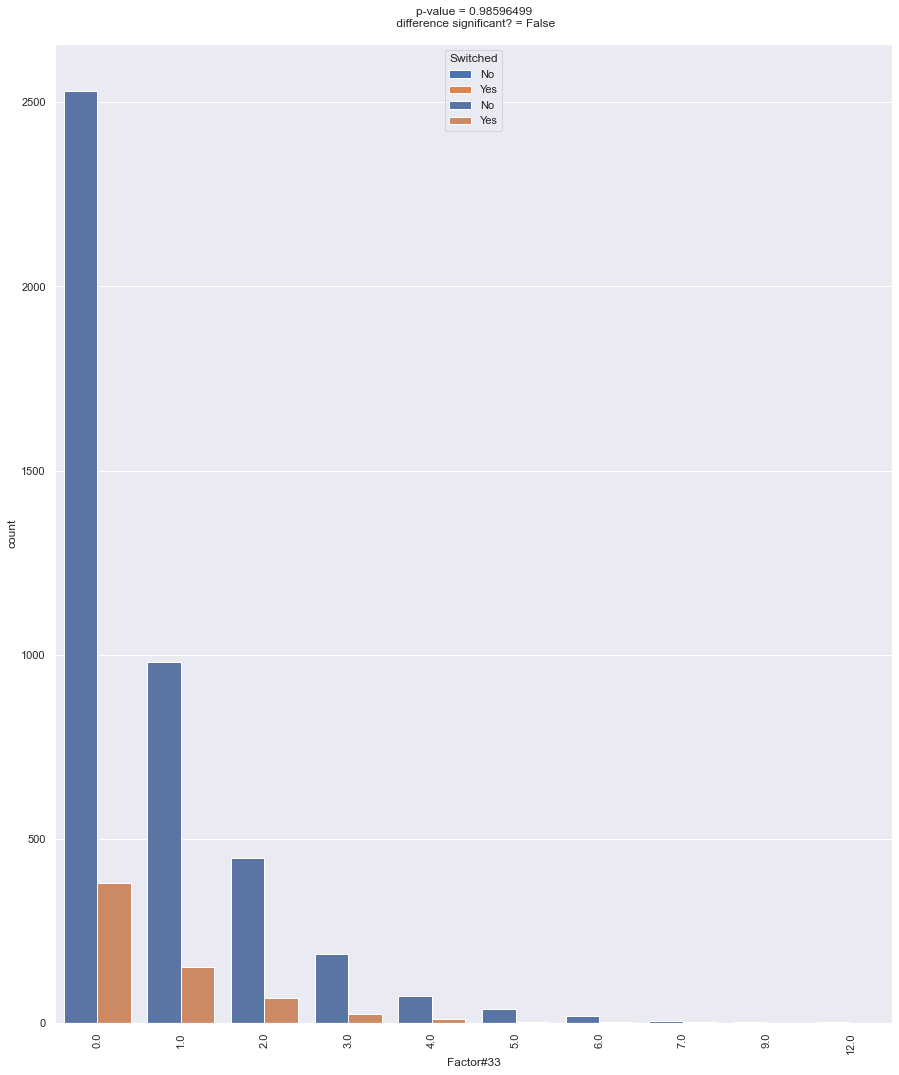

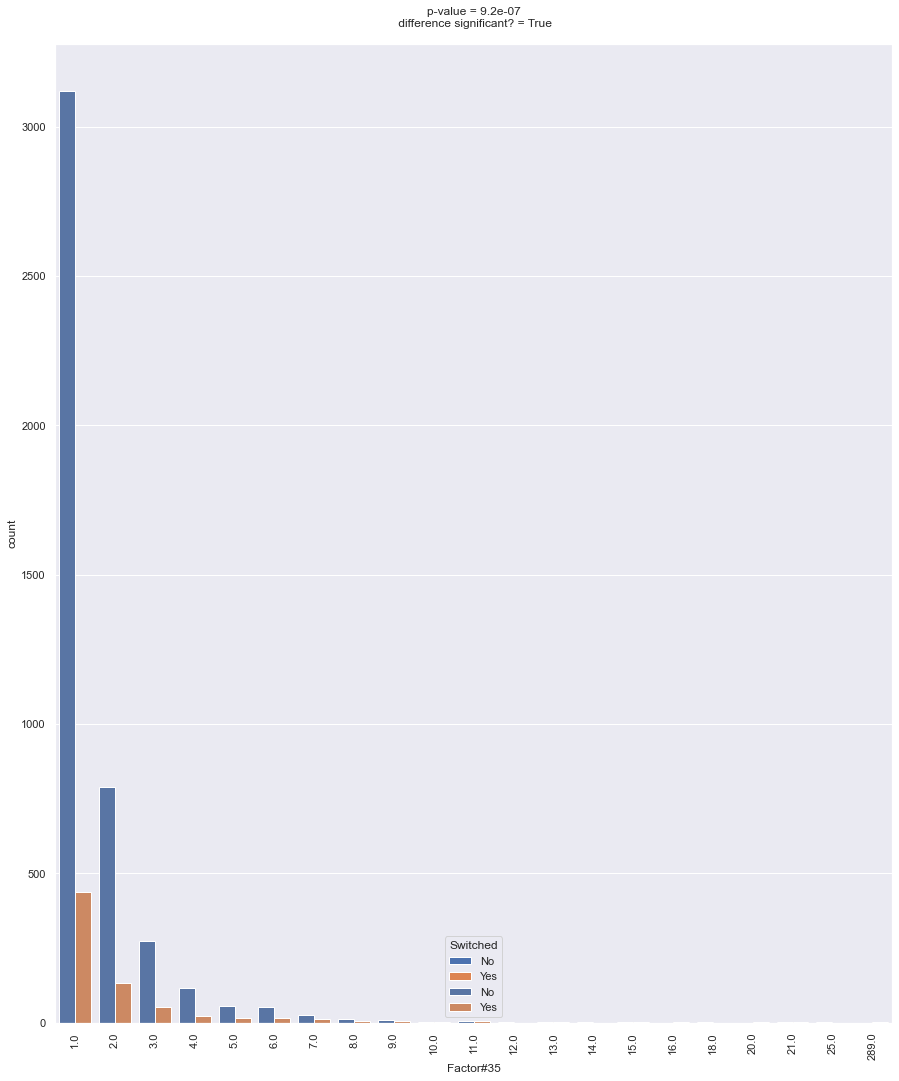

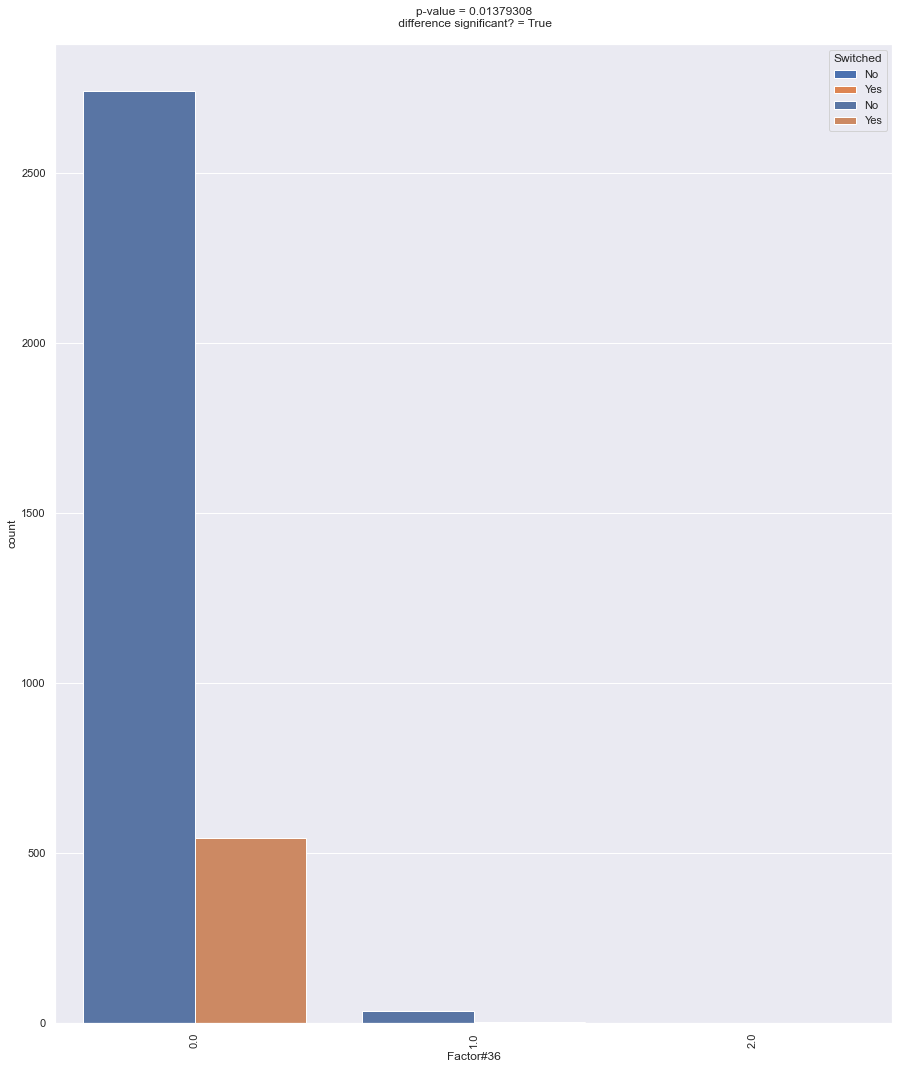

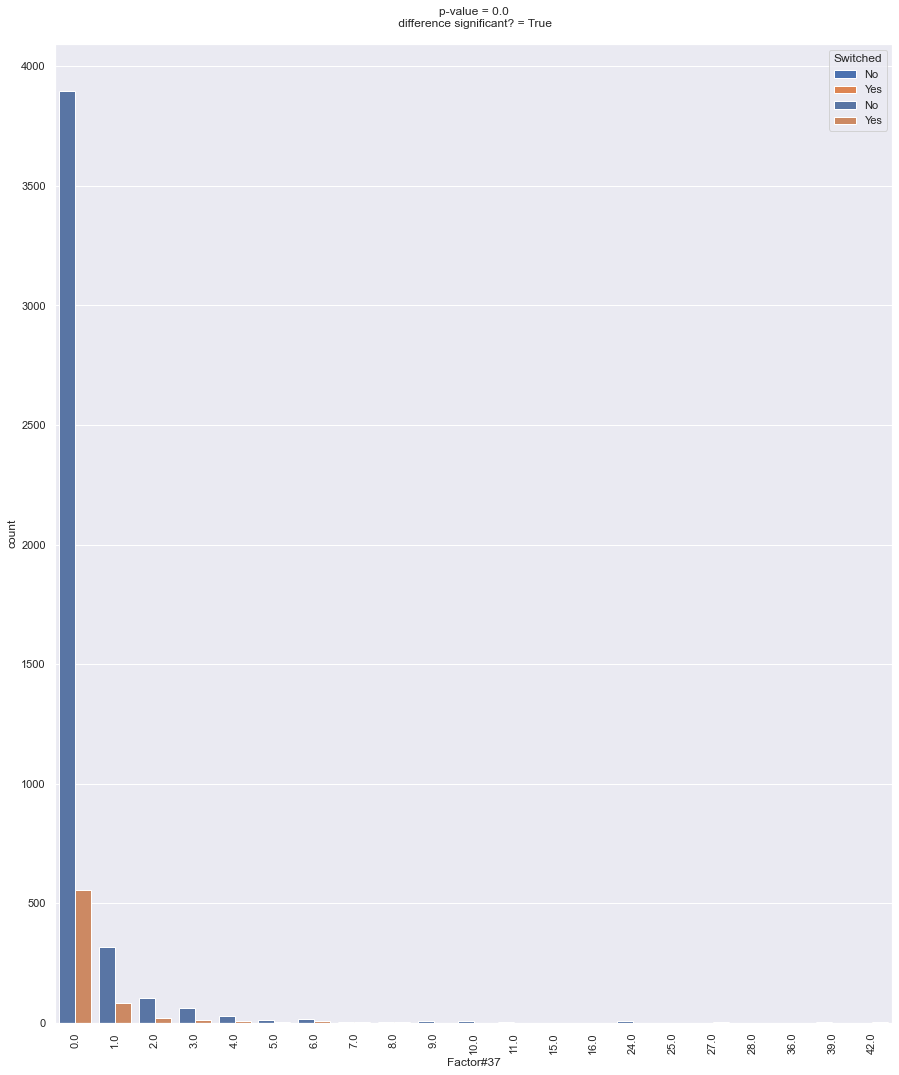

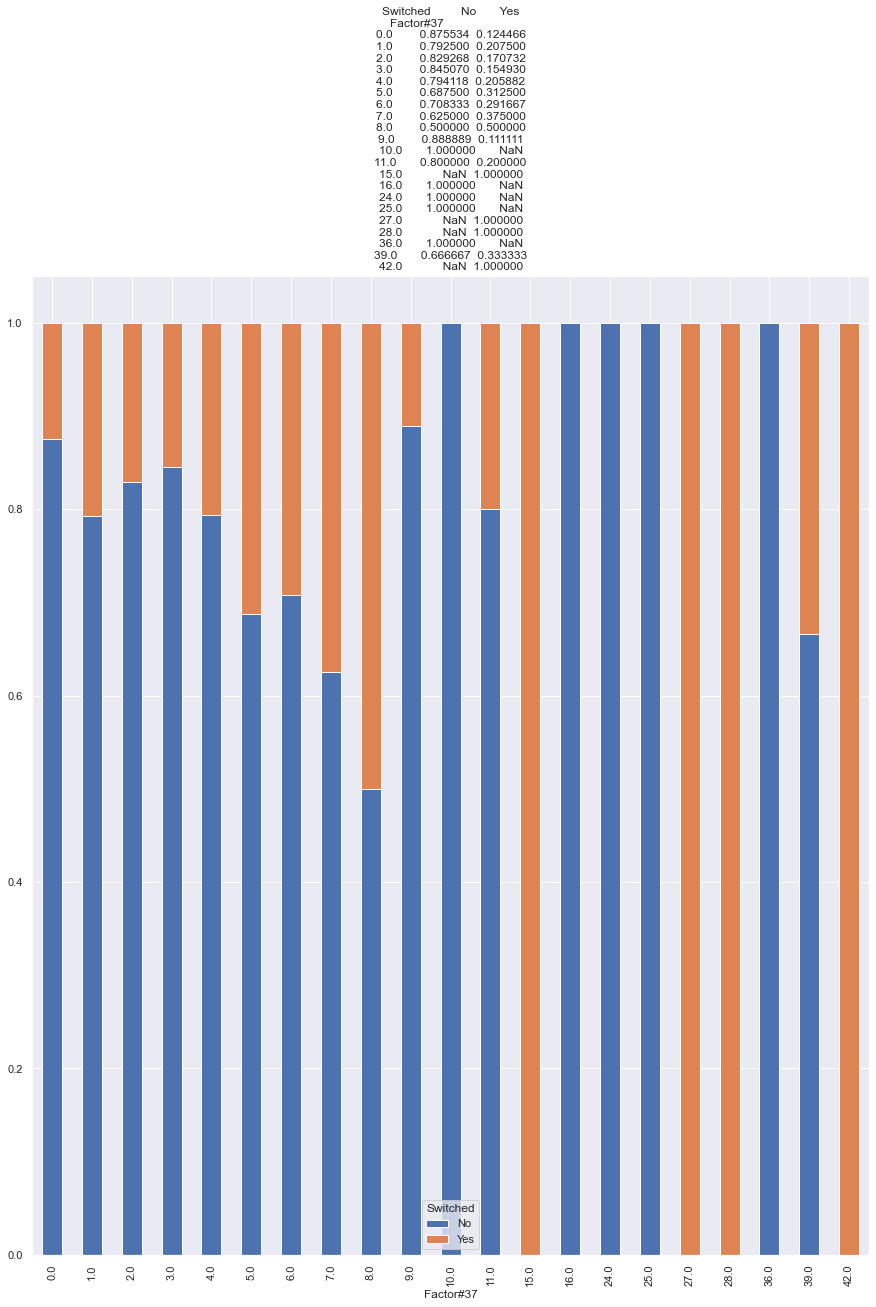

In [33]:
# finding the p value for each categorical feature with dependent feature
for feature in discrete_features:
    if feature != 'Switched':
        BVA_categorical_plot(df, 'Switched', feature)

### The following discrete features are significant for predicting churn
- Factor#5 is a significant feature,'0' value is more significant for not churn
- Factor#7 is a significant feature,'0' value is more significant for not churn
- Factor#8 is a significant feature,'1' value is more significant for not churn
- Factor#13 is a significant feature,'0' value is more significant for not churn
- Factor#16 is a significant feature,'7'value is more significant for not churn
- Factor#17 is a significant feature,'2'vlue is more significant for not churn
- Factor#18 is a significant feature,'1'value is more significant for not churn
- Factor#20 is a significant feature,'1'value is more significant for not churn
- Factor#21 is a significant feature,'1'value is more significant for not churn
- Factor#25 is a significant feature,'1'value is more significant for not churn
- Factor#35 is a significant feature,'1'value is more significant for not churn
- Factor#36 is a significant feature,'0'value is more significant for not churn
- Factor#37 is a significant feature,'0'value is more significant for not churn

### The following discrete features are not significant for predicting churn
- Factor#14 is not a significant feature.
- Factor#15 is not a significant feature.
- Factor#24 is not a significant feature.
- Factor#33 is not a significant feature.

### Feature Engineering

In [34]:
# missing features
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),' % missing values')

Factor#6 0.0619  % missing values
Factor#11 0.0037  % missing values
Factor#14 0.03  % missing values
Factor#16 0.3687  % missing values
Factor#17 0.3687  % missing values
Factor#18 0.3687  % missing values
Factor#28 0.3687  % missing values
Factor#30 0.0485  % missing values
Factor#32 0.0072  % missing values
Factor#33 0.0485  % missing values
Factor#36 0.3569  % missing values
Factor#38 0.2073  % missing values


- Factor#6 having 0.0619% missing values.it is a continuous feature having more'0' values so we can replace missing values with '0' and it has p=0.548 which means it is marginally significant with dependent feature

- Factor#11 having 0.0037% missing values.It is a continuous feature having more '0' values in distribution plot so missing values are replace with '0' and it has p=0.00307 which is less than 0.05 means more significant with dependent feature.

- Factor#14 having 0.03% missing values.It has only single value that is '1'
value so we can replace the missing values with '1' and it's p=1 which is 
greater than 0.05 means that it is less significant with dependent feature
- Factor#15 it is having single value i.e. '1' and it's p=1 which is greater 
than 0.05 means that it is less significant with dependent feature

- Factor#16 0.3687  % missing values.It is a discountinuous feature having '8'value is more compare to remaing numbers so missing values are replacing with value '8'.It's p='0' which means more significant than remaing features
- Factor#17 0.3687  % missing values.It is a discontinuous feature having '2'value is more compare to remaing numbers so missing values are replacing with value '2'.It's p='0.0199' which is less than 0.05, which means that it is asignificant feature.
- Factor#18 0.3687  % missing values.It is a discontinuous feature having '1'value is more compare to remaing numbers so missing values are replacing with value '1'.It's p='1.6e-7' which is less than 0.05, which means that it is a significant feature.
- Factor#28 0.3687  % missing values.It is a continuous feature having more '0'values.We can replace missing values with '0' and the p=0.1982 which is more than 0.05 means not a significant value
- Factor#30 0.0485  % missing values.It is a continuous feature having more '0'values.We can replace missing values with '0' and the p=2.57882e-7 which is more than 0.05 means a significant value
- Factor#32 0.0072  % missing values.It is a discontinuous feature having '0'value is more compare to remaing numbers so missing values are replacing with value '0'.It's p='0.985' which is greater than 0.05, which means that it is not significant feature.
- Factor#36 0.3569  % missing values.It is a discontinuous feature having '0'value is more compare to remaing numbers so missing values are replacing with value '0'.It's p='0.0137' which is less than 0.05, which means that it is asignificant feature.
- Factor#38 0.2073  % missing values.It is a continuous feature having more '0'values.We can replace missing values with '0' and the p=0.00021 which is less than 0.05 means a significant value

In [35]:
# total columns
df.columns

Index(['ID', 'Switched', 'Factor#1', 'Factor#2', 'Factor#3', 'Factor#4',
       'Factor#5', 'Factor#6', 'Factor#7', 'Factor#8', 'Factor#9', 'Factor#10',
       'Factor#11', 'Factor#12', 'Factor#13', 'Factor#14', 'Factor#15',
       'Factor#16', 'Factor#17', 'Factor#18', 'Factor#19', 'Factor#20',
       'Factor#21', 'Factor#22', 'Factor#23', 'Factor#24', 'Factor#25',
       'Factor#26', 'Factor#27', 'Factor#28', 'Factor#29', 'Factor#30',
       'Factor#31', 'Factor#32', 'Factor#33', 'Factor#34', 'Factor#35',
       'Factor#36', 'Factor#37', 'Factor#38'],
      dtype='object')

In [36]:
# replacing 'no' and 'yes' with 0's and 1's
df['Switched']=df['Switched'].replace(['No','Yes'],[0,1])

In [37]:
# features not including 'Id'
feature_all=[feature for feature in df.columns if feature not in ['ID']]
feature_all

['Switched',
 'Factor#1',
 'Factor#2',
 'Factor#3',
 'Factor#4',
 'Factor#5',
 'Factor#6',
 'Factor#7',
 'Factor#8',
 'Factor#9',
 'Factor#10',
 'Factor#11',
 'Factor#12',
 'Factor#13',
 'Factor#14',
 'Factor#15',
 'Factor#16',
 'Factor#17',
 'Factor#18',
 'Factor#19',
 'Factor#20',
 'Factor#21',
 'Factor#22',
 'Factor#23',
 'Factor#24',
 'Factor#25',
 'Factor#26',
 'Factor#27',
 'Factor#28',
 'Factor#29',
 'Factor#30',
 'Factor#31',
 'Factor#32',
 'Factor#33',
 'Factor#34',
 'Factor#35',
 'Factor#36',
 'Factor#37',
 'Factor#38']

In [38]:
## Replacing the numerical Missing Values

for feature in feature_all:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
    

In [39]:
# checking the missing values
df[feature_all].isnull().sum()

Switched     0
Factor#1     0
Factor#2     0
Factor#3     0
Factor#4     0
Factor#5     0
Factor#6     0
Factor#7     0
Factor#8     0
Factor#9     0
Factor#10    0
Factor#11    0
Factor#12    0
Factor#13    0
Factor#14    0
Factor#15    0
Factor#16    0
Factor#17    0
Factor#18    0
Factor#19    0
Factor#20    0
Factor#21    0
Factor#22    0
Factor#23    0
Factor#24    0
Factor#25    0
Factor#26    0
Factor#27    0
Factor#28    0
Factor#29    0
Factor#30    0
Factor#31    0
Factor#32    0
Factor#33    0
Factor#34    0
Factor#35    0
Factor#36    0
Factor#37    0
Factor#38    0
dtype: int64

- #### Outliers are not much affecting classification problems

In [40]:
# first 5 records
df.head()

,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,Factor#10,Factor#11,Factor#12,Factor#13,Factor#14,Factor#15,Factor#16,Factor#17,Factor#18,Factor#19,Factor#20,Factor#21,Factor#22,Factor#23,Factor#24,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,56302.0,0.0,100.0,100.0,0.000000,0.00000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,8.0,2.0,2.0,1.0,0.0,0.0,0.0,1.586301,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
1,33363.0,0.0,0.0,100.0,0.000000,76.82757,0.0,0.0,0.0,1.0,100.000000,0.001623,11.111111,0.0,1.0,1.0,1.0,8.0,2.0,2.0,6.0,1.0,1.0,4.0,4.186301,0.0,1.0,0.000000,11.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,54.545455
2,33365.0,0.0,0.0,100.0,3.000000,0.00000,0.0,0.0,0.0,1.0,0.011572,0.012218,32.000000,0.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,4.112329,0.0,2.0,51.625059,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000
3,56303.0,0.0,100.0,100.0,1.313472,0.00000,0.0,0.0,0.0,1.0,0.000000,96.441656,79.545455,0.0,0.0,1.0,1.0,8.0,2.0,2.0,3.0,0.0,1.0,0.0,1.449315,0.0,1.0,0.000000,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.000000
4,56304.0,0.0,0.0,100.0,1.000000,99.00000,1.0,0.0,0.0,1.0,0.141928,0.073721,75.000000,0.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,1.523288,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000


#### Feature Selection

In [41]:
# feature selection using lasso regression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [42]:
## Capture the dependent feature
y_train=df[['Switched']]

In [43]:
# dependent features
y_train

,Switched
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5167,1.0
5168,1.0
5169,1.0
5170,1.0


In [44]:
## drop dependent feature from dataset
X_train=df.drop(['ID','Switched'],axis=1)

In [45]:
# first 5 records of dependent features
X_train

,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,Factor#10,Factor#11,Factor#12,Factor#13,Factor#14,Factor#15,Factor#16,Factor#17,Factor#18,Factor#19,Factor#20,Factor#21,Factor#22,Factor#23,Factor#24,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,100.0,100.000000,0.000000,0.00000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,8.0,2.0,2.0,1.0,0.0,0.0,0.0,1.586301,0.0,1.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000
1,0.0,100.000000,0.000000,76.82757,0.0,0.0,0.0,1.0,100.000000,0.001623,11.111111,0.0,1.0,1.0,1.0,8.0,2.0,2.0,6.0,1.0,1.0,4.0,4.186301,0.0,1.0,0.000000e+00,11.0,0.0,0.0,4.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,54.545455
2,0.0,100.000000,3.000000,0.00000,0.0,0.0,0.0,1.0,0.011572,0.012218,32.000000,0.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,4.112329,0.0,2.0,5.162506e+01,1.0,0.0,1.0,0.0,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.000000
3,100.0,100.000000,1.313472,0.00000,0.0,0.0,0.0,1.0,0.000000,96.441656,79.545455,0.0,0.0,1.0,1.0,8.0,2.0,2.0,3.0,0.0,1.0,0.0,1.449315,0.0,1.0,0.000000e+00,1.0,0.0,0.0,2.0,0.0,0.000000,0.0,1.0,2.0,0.0,0.0,0.000000
4,0.0,100.000000,1.000000,99.00000,1.0,0.0,0.0,1.0,0.141928,0.073721,75.000000,0.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,1.523288,0.0,1.0,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0.0,3.380288,0.194120,0.08863,0.0,0.0,4.0,5.0,4.008117,0.410344,1.421801,4.0,0.0,1.0,1.0,12.0,4.0,6.0,29.0,7.0,2.0,11.0,8.252055,1.0,3.0,8.043280e+01,20.0,23.0,1.0,1.0,20.0,10.678309,5.0,1.0,4.0,2.0,3.0,60.000000
5168,0.0,0.000000,2.839147,0.00000,0.0,7.0,0.0,2.0,0.777813,0.422231,0.000000,0.0,0.0,1.0,1.0,5.0,2.0,1.0,4.0,2.0,3.0,4.0,4.117808,0.0,2.0,2.390000e-07,4.0,0.0,0.0,7.0,0.0,0.000000,1.0,1.0,2.0,0.0,0.0,25.000000
5169,0.0,0.000000,1.000000,0.00000,0.0,100.0,0.0,1.0,0.669018,0.003912,86.666667,0.0,1.0,1.0,1.0,5.0,2.0,3.0,3.0,1.0,1.0,1.0,1.969863,0.0,1.0,7.441781e+01,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,0.000000
5170,0.0,0.000000,8.000000,0.00000,0.0,0.0,2.0,1.0,0.075443,0.002088,95.000000,0.0,0.0,1.0,1.0,8.0,4.0,2.0,4.0,1.0,1.0,3.0,4.271233,0.0,2.0,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,100.000000


In [46]:
# checking nan values in X_train
X_train.isnull().sum()

Factor#1     0
Factor#2     0
Factor#3     0
Factor#4     0
Factor#5     0
Factor#6     0
Factor#7     0
Factor#8     0
Factor#9     0
Factor#10    0
Factor#11    0
Factor#12    0
Factor#13    0
Factor#14    0
Factor#15    0
Factor#16    0
Factor#17    0
Factor#18    0
Factor#19    0
Factor#20    0
Factor#21    0
Factor#22    0
Factor#23    0
Factor#24    0
Factor#25    0
Factor#26    0
Factor#27    0
Factor#28    0
Factor#29    0
Factor#30    0
Factor#31    0
Factor#32    0
Factor#33    0
Factor#34    0
Factor#35    0
Factor#36    0
Factor#37    0
Factor#38    0
dtype: int64

In [47]:
# checking nan values in dpendent feature
y_train.isnull().sum()

Switched    0
dtype: int64

In [48]:
# feature selection
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [49]:
# selection model
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True])

In [50]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    X_train.shape[1]-len(selected_feat)))

total features: 38
selected features: 28
features with coefficients shrank to zero: 10


In [51]:
#selection features
selected_feat

Index(['Factor#1', 'Factor#2', 'Factor#3', 'Factor#4', 'Factor#6', 'Factor#7',
       'Factor#9', 'Factor#10', 'Factor#11', 'Factor#12', 'Factor#16',
       'Factor#18', 'Factor#19', 'Factor#20', 'Factor#22', 'Factor#23',
       'Factor#25', 'Factor#26', 'Factor#27', 'Factor#28', 'Factor#29',
       'Factor#30', 'Factor#31', 'Factor#32', 'Factor#33', 'Factor#34',
       'Factor#35', 'Factor#38'],
      dtype='object')

In [52]:
# selection features data frame
X_train=X_train[selected_feat]

In [53]:
# first 5 records
X_train.head()

,Factor#1,Factor#2,Factor#3,Factor#4,Factor#6,Factor#7,Factor#9,Factor#10,Factor#11,Factor#12,Factor#16,Factor#18,Factor#19,Factor#20,Factor#22,Factor#23,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#38
0,100.0,100.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.0,2.0,1.0,0.0,0.0,1.586301,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1,0.0,100.0,0.000000,76.82757,0.0,0.0,100.000000,0.001623,11.111111,0.0,8.0,2.0,6.0,1.0,4.0,4.186301,1.0,0.000000,11.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,54.545455
2,0.0,100.0,3.000000,0.00000,0.0,0.0,0.011572,0.012218,32.000000,0.0,6.0,2.0,1.0,1.0,2.0,4.112329,2.0,51.625059,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.000000
3,100.0,100.0,1.313472,0.00000,0.0,0.0,0.000000,96.441656,79.545455,0.0,8.0,2.0,3.0,0.0,0.0,1.449315,1.0,0.000000,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.000000
4,0.0,100.0,1.000000,99.00000,0.0,0.0,0.141928,0.073721,75.000000,0.0,4.0,1.0,1.0,1.0,2.0,1.523288,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000


In [54]:
# Scalling the features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scale = std.fit_transform(X_train)

In [55]:
#scaling
scale

array([[ 1.46041085,  1.05827666, -0.63073237, ..., -0.29660158,
        -0.16620797, -0.41636838],
       [-0.72533472,  1.05827666, -0.63073237, ...,  0.18808195,
        -0.16620797,  1.80226326],
       [-0.72533472,  1.05827666, -0.50134529, ..., -0.29660158,
        -0.16620797, -0.41636838],
       ...,
       [-0.72533472, -1.01064898, -0.58760334, ..., -0.29660158,
         0.30085404, -0.41636838],
       [-0.72533472, -1.01064898, -0.28570016, ..., -0.29660158,
        -0.16620797,  3.65112296],
       [-0.72533472, -0.80375642,  0.18871912, ..., -0.29660158,
        -0.16620797, -0.41636838]])

In [56]:
# concatenating the dependent and indepent features
data = pd.concat([df[['ID', 'Switched']].reset_index(drop=True),
                    pd.DataFrame(scale, columns=selected_feat)],
                    axis=1)

In [57]:
# first 5 records
data.head()

,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#6,Factor#7,Factor#9,Factor#10,Factor#11,Factor#12,Factor#16,Factor#18,Factor#19,Factor#20,Factor#22,Factor#23,Factor#25,Factor#26,Factor#27,Factor#28,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#38
0,56302.0,0.0,1.460411,1.058277,-0.630732,-0.560567,-0.186489,-0.563679,-0.305289,-0.279962,-0.769785,-0.095264,0.052592,-0.201382,-0.370080,-0.981261,-0.835101,-0.653369,-0.553806,-0.664848,-0.365900,-0.11526,-0.088679,-0.20878,-0.151857,-0.277673,-0.612950,-0.296602,-0.166208,-0.416368
1,33363.0,0.0,-0.725335,1.058277,-0.630732,3.401950,-0.186489,-0.563679,4.343444,-0.279880,-0.415499,-0.095264,0.052592,-0.201382,0.445938,0.074728,0.708277,-0.347257,-0.553806,-0.664848,0.330174,-0.11526,-0.088679,0.53656,-0.151857,-0.277673,-0.612950,0.188082,-0.166208,1.802263
2,33365.0,0.0,-0.725335,1.058277,-0.501345,-0.560567,-0.186489,-0.563679,-0.304751,-0.279340,0.250559,-0.095264,-0.820618,-0.201382,-0.370080,0.074728,-0.063412,-0.355966,0.846822,0.720241,-0.302620,-0.11526,0.174157,-0.20878,-0.151857,-0.277673,1.180645,-0.296602,-0.166208,-0.416368
3,56303.0,0.0,1.460411,1.058277,-0.574084,-0.560567,-0.186489,-0.563679,-0.305289,4.630515,1.766582,-0.095264,0.052592,-0.201382,-0.043672,-0.981261,-0.835101,-0.669498,-0.553806,-0.664848,-0.302620,-0.11526,-0.088679,0.16389,-0.151857,-0.277673,-0.612950,0.188082,0.067323,-0.416368
4,56304.0,0.0,-0.725335,1.058277,-0.587603,4.545532,-0.186489,-0.563679,-0.298691,-0.276209,1.621647,-0.095264,-1.693828,-1.002573,-0.370080,0.074728,-0.063412,-0.660788,-0.553806,-0.664848,-0.302620,-0.11526,-0.088679,-0.20878,-0.151857,-0.277673,-0.612950,-0.296602,0.067323,-0.416368


In [58]:
# dataset columns
data.columns

Index(['ID', 'Switched', 'Factor#1', 'Factor#2', 'Factor#3', 'Factor#4',
       'Factor#6', 'Factor#7', 'Factor#9', 'Factor#10', 'Factor#11',
       'Factor#12', 'Factor#16', 'Factor#18', 'Factor#19', 'Factor#20',
       'Factor#22', 'Factor#23', 'Factor#25', 'Factor#26', 'Factor#27',
       'Factor#28', 'Factor#29', 'Factor#30', 'Factor#31', 'Factor#32',
       'Factor#33', 'Factor#34', 'Factor#35', 'Factor#38'],
      dtype='object')

In [59]:
# dependent columns
train_columns = ['Factor#1', 'Factor#2', 'Factor#3','Factor#4',
       'Factor#6', 'Factor#7', 'Factor#9', 'Factor#10','Factor#11',
       'Factor#12', 'Factor#16', 'Factor#18', 'Factor#19','Factor#20',
       'Factor#22', 'Factor#23', 'Factor#25', 'Factor#26','Factor#27',
       'Factor#28', 'Factor#29', 'Factor#30', 'Factor#31','Factor#32',
       'Factor#33', 'Factor#34', 'Factor#35', 'Factor#38']

In [60]:
# independent dataframe
X = data[train_columns]

In [61]:
# dependent features
y = data['Switched']

#### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###  Model Building From Basic model
### Cross Validation Like KFOLD and Hyperpaqrameter Tuning

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [64]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [65]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [66]:
# confusion matrix
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1449   36]
 [ 180   42]]
0.8734622144112478
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1485
         1.0       0.54      0.19      0.28       222

    accuracy                           0.87      1707
   macro avg       0.71      0.58      0.61      1707
weighted avg       0.84      0.87      0.85      1707



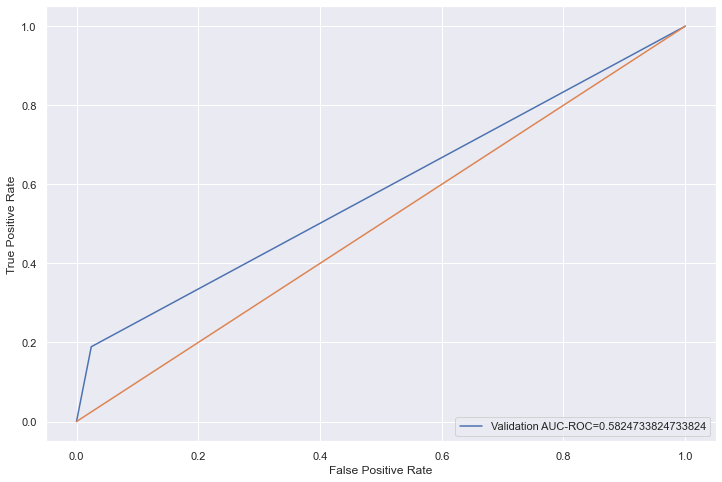

In [67]:
# AUC-ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_test,y_pred) 
auc = roc_auc_score(y_test,y_pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [68]:
# counting of dependent features
y_train.value_counts()

0.0    2984
1.0     481
Name: Switched, dtype: int64

In [69]:
# increasing the 1's and 0's are same count
class_weight=dict({0:1,1:100})

In [70]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [71]:
# confusion matrix
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1464   21]
 [ 205   17]]
0.8676039835969537
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1485
         1.0       0.45      0.08      0.13       222

    accuracy                           0.87      1707
   macro avg       0.66      0.53      0.53      1707
weighted avg       0.82      0.87      0.82      1707



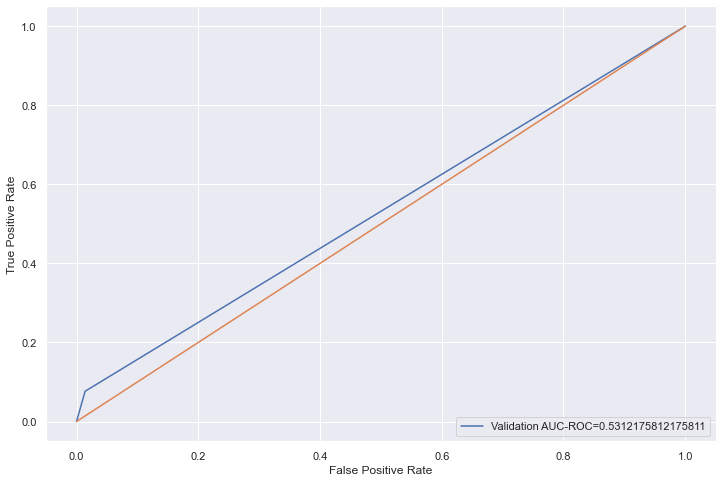

In [72]:
# AUC-ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_test,y_pred) 
auc = roc_auc_score(y_test,y_pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

#### Under Sampling

In [73]:
from collections import Counter
Counter(y_train)

Counter({0.0: 2984, 1.0: 481})

In [74]:
# decreasing the 0's and 1's are in same value
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
X_train_ns,y_train_ns=under_sampler.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 2984, 1.0: 481})
The number of classes after fit Counter({0.0: 481, 1.0: 481})


In [75]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [76]:
#confusion matrix
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[950 535]
 [ 44 178]]
0.6608084358523726
              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77      1485
         1.0       0.25      0.80      0.38       222

    accuracy                           0.66      1707
   macro avg       0.60      0.72      0.57      1707
weighted avg       0.86      0.66      0.72      1707



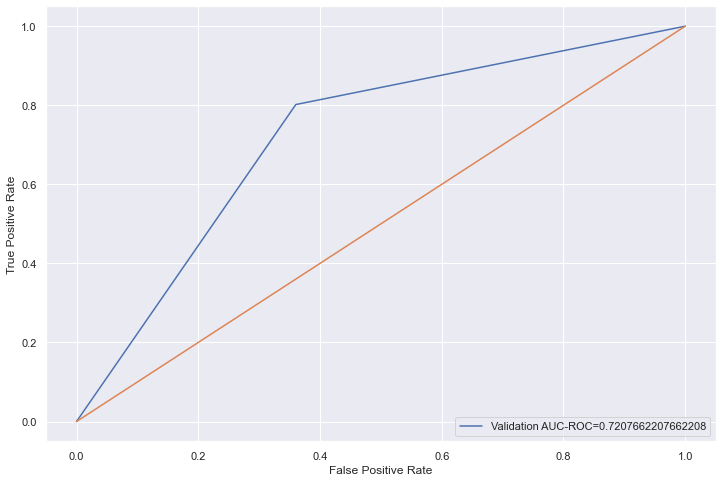

In [77]:
# AUC-ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_test,y_pred) 
auc = roc_auc_score(y_test,y_pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### Over Sampling

In [78]:
from imblearn.over_sampling import RandomOverSampler

In [79]:
# over sampling the 1's upto 0's count
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 2984, 1.0: 481})
The number of classes after fit Counter({0.0: 2984, 1.0: 2238})


In [80]:
# RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [81]:
#Confusion Matrix
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1450   35]
 [ 170   52]]
0.8799062683069713
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93      1485
         1.0       0.60      0.23      0.34       222

    accuracy                           0.88      1707
   macro avg       0.75      0.61      0.64      1707
weighted avg       0.86      0.88      0.86      1707



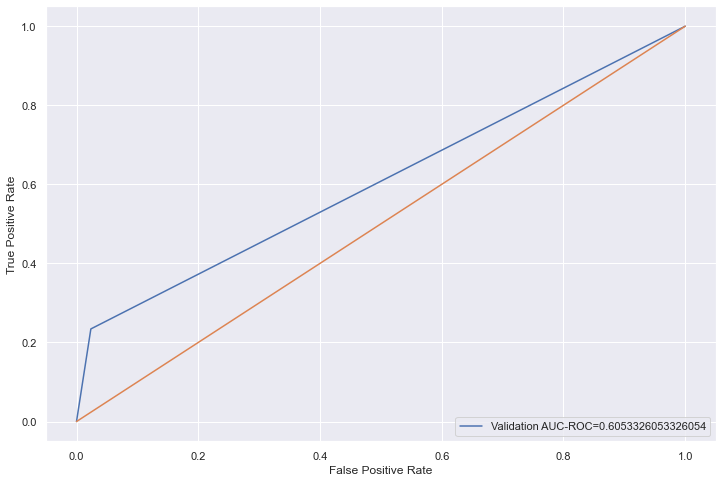

In [82]:
# AUC-ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_test,y_pred) 
auc = roc_auc_score(y_test,y_pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### SMOTETomek

In [83]:
from imblearn.combine import SMOTETomek

In [84]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 2984, 1.0: 481})
The number of classes after fit Counter({0.0: 2965, 1.0: 2219})


In [85]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [86]:
# Confusion Matrix
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1412   73]
 [ 146   76]]
0.8717047451669596
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      1485
         1.0       0.51      0.34      0.41       222

    accuracy                           0.87      1707
   macro avg       0.71      0.65      0.67      1707
weighted avg       0.85      0.87      0.86      1707



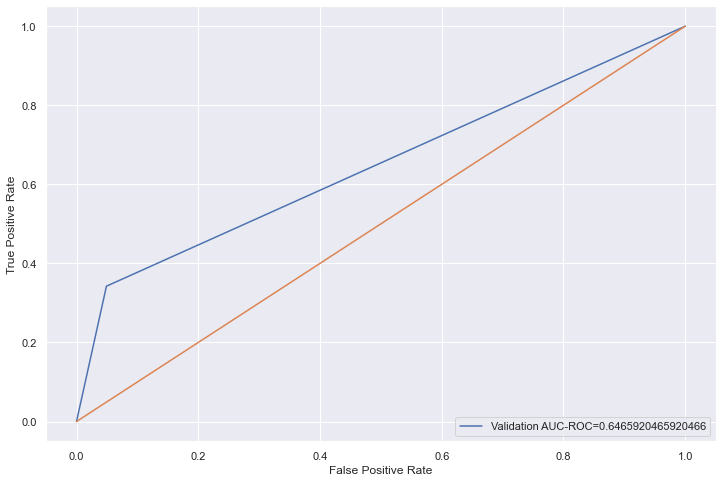

In [87]:
# AUC-ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_test,y_pred) 
auc = roc_auc_score(y_test,y_pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### Ensemble Techniques

In [88]:
from imblearn.ensemble import EasyEnsembleClassifier

In [89]:
easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [90]:
# Confusion Matrix
y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[977 508]
 [ 50 172]]
0.6731107205623902
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78      1485
         1.0       0.25      0.77      0.38       222

    accuracy                           0.67      1707
   macro avg       0.60      0.72      0.58      1707
weighted avg       0.86      0.67      0.73      1707



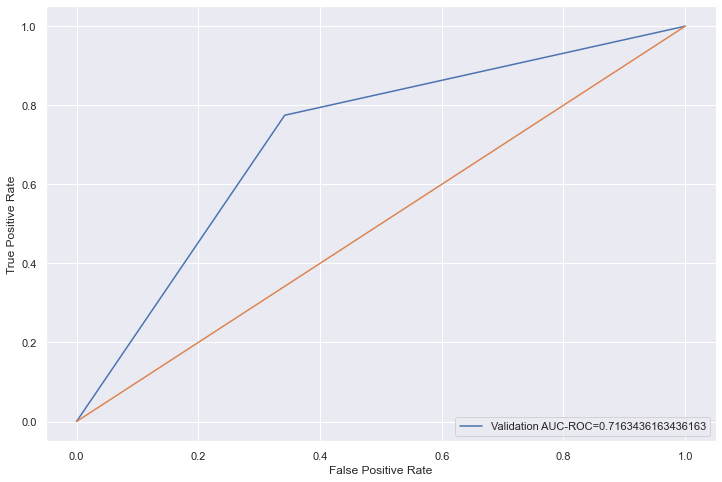

In [91]:
# AUC-ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_test,y_pred) 
auc = roc_auc_score(y_test,y_pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### Conclusion

- It is a Imbalance data set we are not going to choose accuracy score for performance of the model instead we are interested with precision.
- In precision = (TP)/(TP+FP)=(966)/(966+14)=95% for predicting the positive values which means that out of 100 it will predict 95 positive values.
- Easy Ensemble Classifier was given 95% precision and it also has Auc-Roc curve more means 72%, we can choose Easy Ensemble Classifier model will give good result.
- Since the predictive positive percentage is more it will reduce loss of business for predicting the churn customers from the Advisors.